<h1>
    Modules and globals variables
</h2>

In [6]:
import os
import numpy as np
from keras.utils import img_to_array, load_img
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tqdm import tqdm
import joblib
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Ścieżki do danych treningowych i testowych
train_path = "../fruits-360/Training"
test_path = "../fruits-360/Test"

saved_train_data_path = "train_data.npy"
saved_test_data_path = "test_data.npy"

saved_train_labels_path = "train_labels.npy"
saved_test_labels_path = "test_labels.npy"

knn_model_path = "./knn_model.joblib"

# Załaduj dane treningowe
train_data = []
train_labels = []

<h1>
    Load Images
</h1>

In [1]:
# Funkcja usuwająca numerację z nazwy klasy
def remove_number(label):
    return ''.join([i for i in label if not i.isdigit()])

def load_data_from_path(path, save_data_path, save_labels_path):
    """
    ==================================================================
    Algorytm wczytujący dane z folderu i zapisujący je do plików .npy
    Funkcja przyjmuje 3 argumenty:
    path - ścieżka do folderu z danymi
    save_data_path - ścieżka do pliku .npy z danymi
    save_labels_path - ścieżka do pliku .npy z etykietami
    ==================================================================
    """
    if os.path.exists(save_data_path) and os.path.exists(save_labels_path):
        # Odczytywanie danych z plików .npy
        data = np.load(save_data_path)
        labels = np.load(save_labels_path)
    else:
        data = []
        labels = []
        total_files = sum([len(files) for _, _, files in os.walk(path)])
        progress_bar = tqdm(total=total_files, unit="img", desc="Global Progress")

        # Iteracja po folderach klas i załadowanie obrazów
        for class_name in os.listdir(path):
            class_path = os.path.join(path, class_name)
            progress_bar.set_postfix_str(f"Current Class: {class_name}")
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                

                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                img = cv2.resize(img, (100, 100))
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img_array = img.flatten()

                # Usuwanie numeracji z nazw klas
                base_label = remove_number(class_name)

                data.append(img_array)
                labels.append(base_label)

                progress_bar.update(1) 

        progress_bar.close() 

        # Zapisywanie plików
        np.save(save_data_path, data)
        np.save(save_labels_path, labels)

    return data, labels

# Dane treningowe
train_data, train_labels = load_data_from_path(train_path, saved_train_data_path, saved_train_labels_path)

# Dane testowe  
test_data, test_labels = load_data_from_path(test_path, saved_test_data_path, saved_test_labels_path)

NameError: name 'train_path' is not defined

In [9]:
# Sprawdzenie czy plik modelu istnieje
if not os.path.exists(knn_model_path):
    print("Trwa podział danych na zbiór treningowy i testowy...")
    X_train, X_test, y_train, y_test = train_test_split(train_data, 
                                                        train_labels, 
                                                        test_size=0.2, 
                                                        random_state=32)

    # Inicjalizacja i trenowanie modelu k-NN
    knn = KNeighborsClassifier(n_neighbors=3)

    print("Trwa trenowanie modelu k-NN...")
    knn.fit(X_train, y_train)

    print("Trwa predykcja na zbiorze testowym...")
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print("Dokładność modelu k-NN: {:.2%}".format(accuracy))

    print("Testowanie na danych testowych...")
    test_accuracy = accuracy_score(test_labels, knn.predict(test_data))

    print("Dokładność modelu k-NN na danych testowych: {:.2%}".format(test_accuracy))

    # Zapisanie modelu do pliku
    joblib.dump(knn, knn_model_path)
else:
    # Wczytanie istniejącego modelu z pliku
    knn = joblib.load(knn_model_path)
    print("Wczytano istniejący model k-NN z pliku.")

Trwa podział danych na zbiór treningowy i testowy...
Trwa trenowanie modelu k-NN...
Trwa predykcja na zbiorze testowym...
Dokładność modelu k-NN: 99.96%
Testowanie na danych testowych...
Dokładność modelu k-NN na danych testowych: 91.25%


['./knn_model.joblib']

<h1>
    Wizualizacje
</h1>

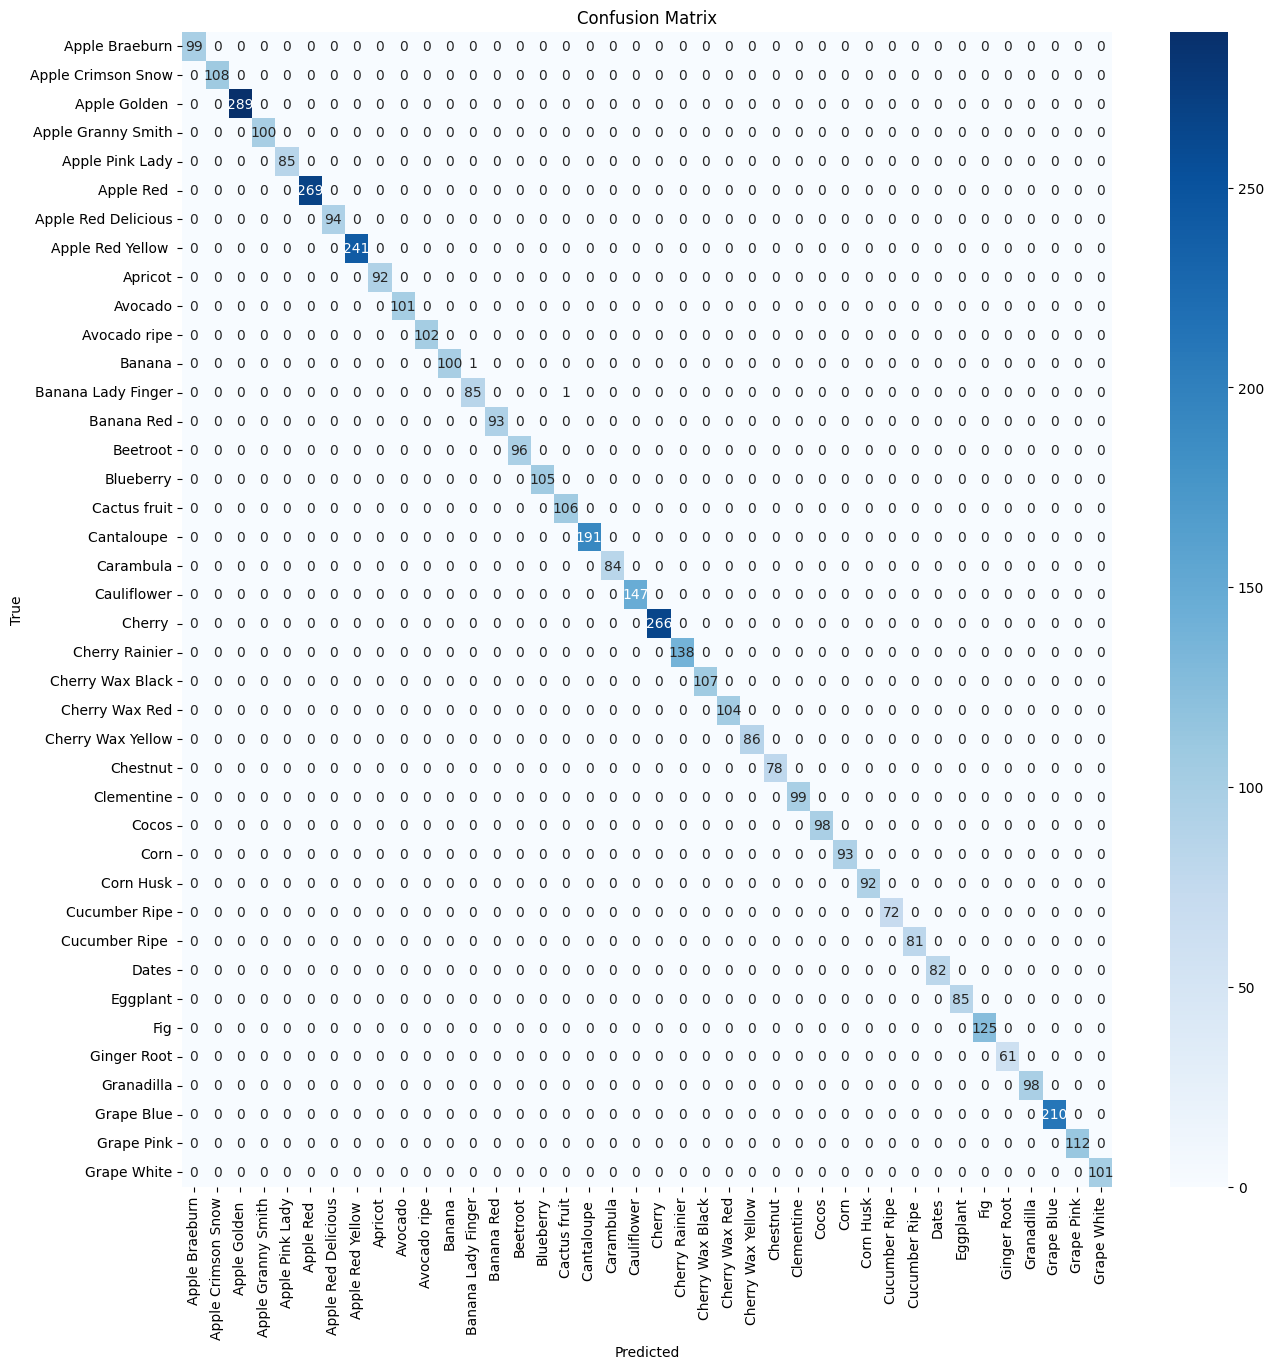

In [11]:
# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy pomyłek
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(train_labels), yticklabels=np.unique(train_labels))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
# Raport klasyfikacji
classification_rep = classification_report(y_test, y_pred)

# Wizualizacja raportu klasyfikacji
print("Classification Report:")
print(classification_rep)

Classification Report:
                     precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00        99
 Apple Crimson Snow       1.00      1.00      1.00       108
      Apple Golden        1.00      1.00      1.00       289
 Apple Granny Smith       1.00      1.00      1.00       100
    Apple Pink Lady       1.00      1.00      1.00        85
         Apple Red        1.00      1.00      1.00       269
Apple Red Delicious       1.00      1.00      1.00        94
  Apple Red Yellow        1.00      1.00      1.00       241
            Apricot       1.00      1.00      1.00        92
            Avocado       1.00      1.00      1.00       101
       Avocado ripe       1.00      1.00      1.00       102
             Banana       1.00      0.99      1.00       101
 Banana Lady Finger       0.99      0.99      0.99        86
         Banana Red       1.00      1.00      1.00        93
           Beetroot       1.00      1.00      1.00        96


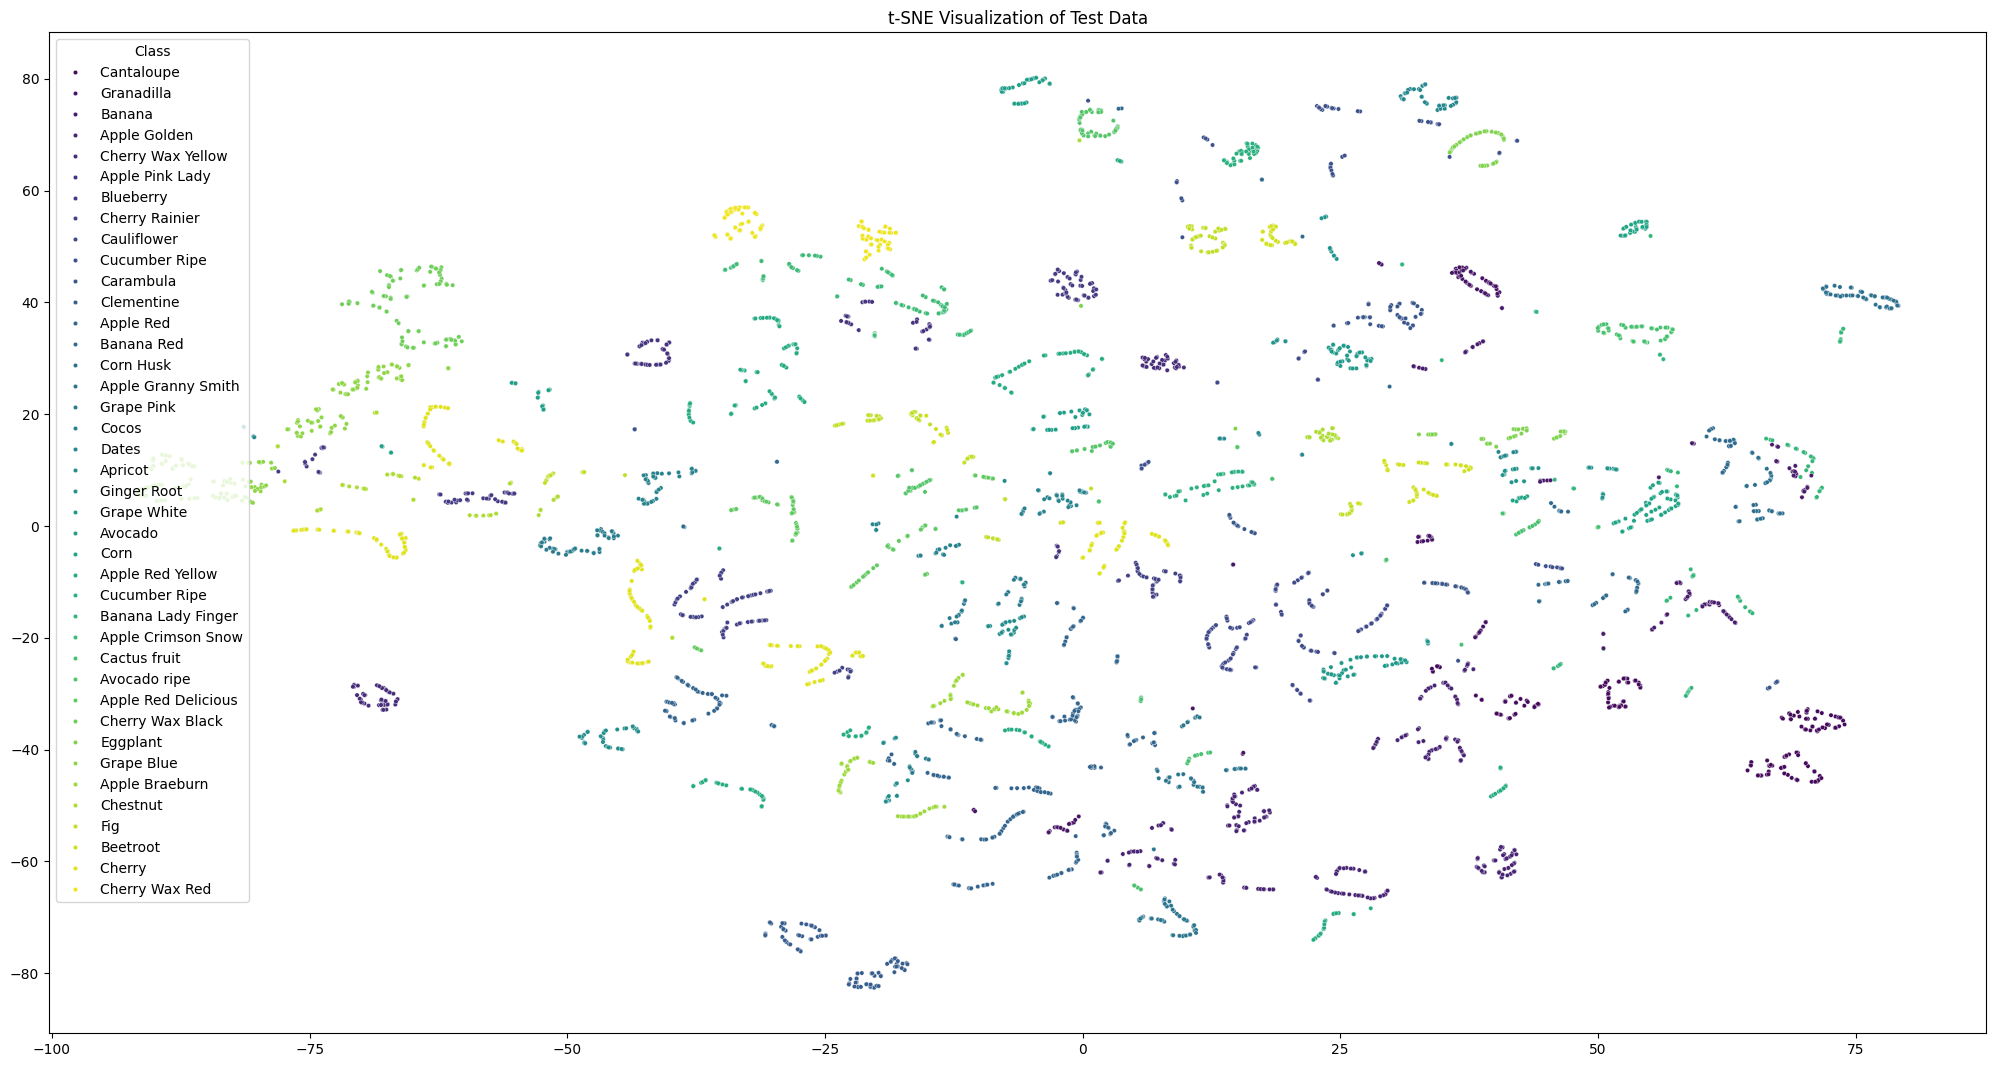

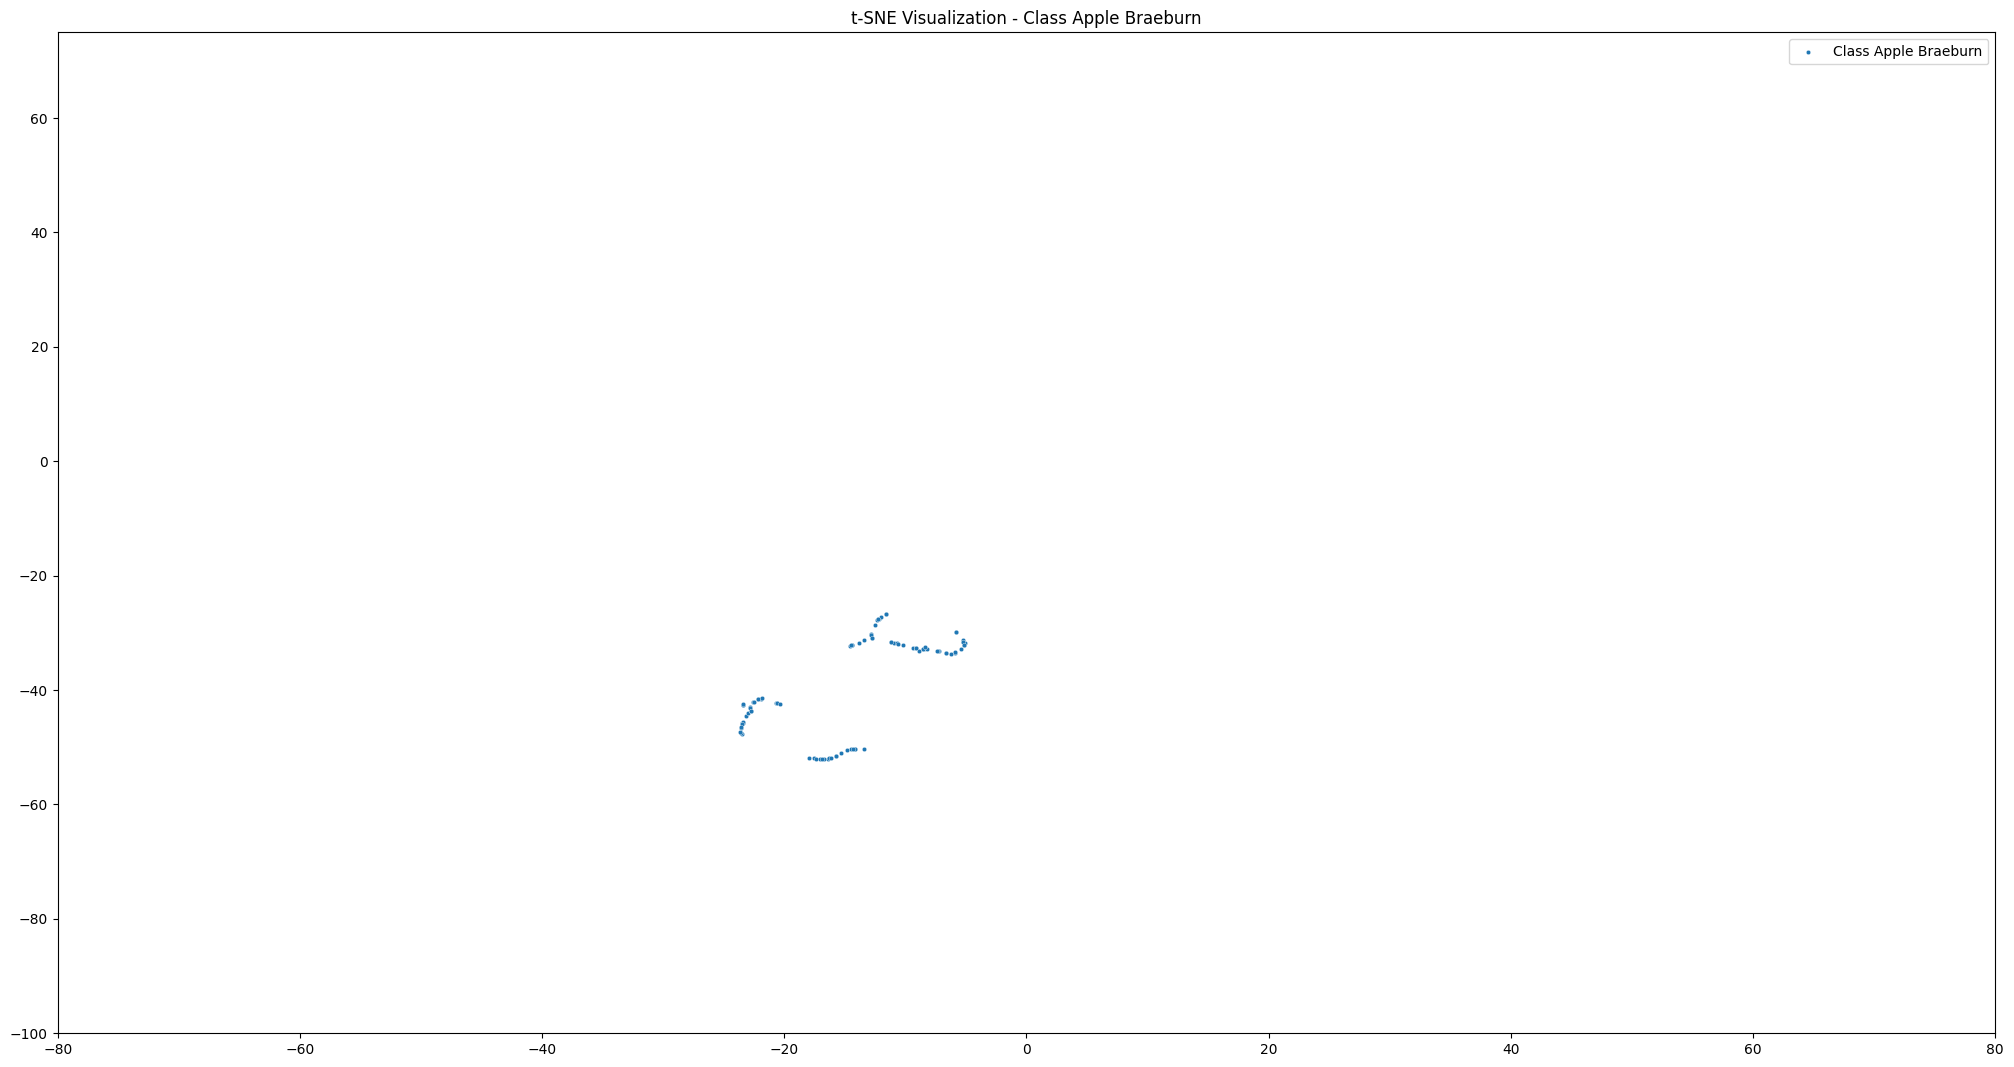

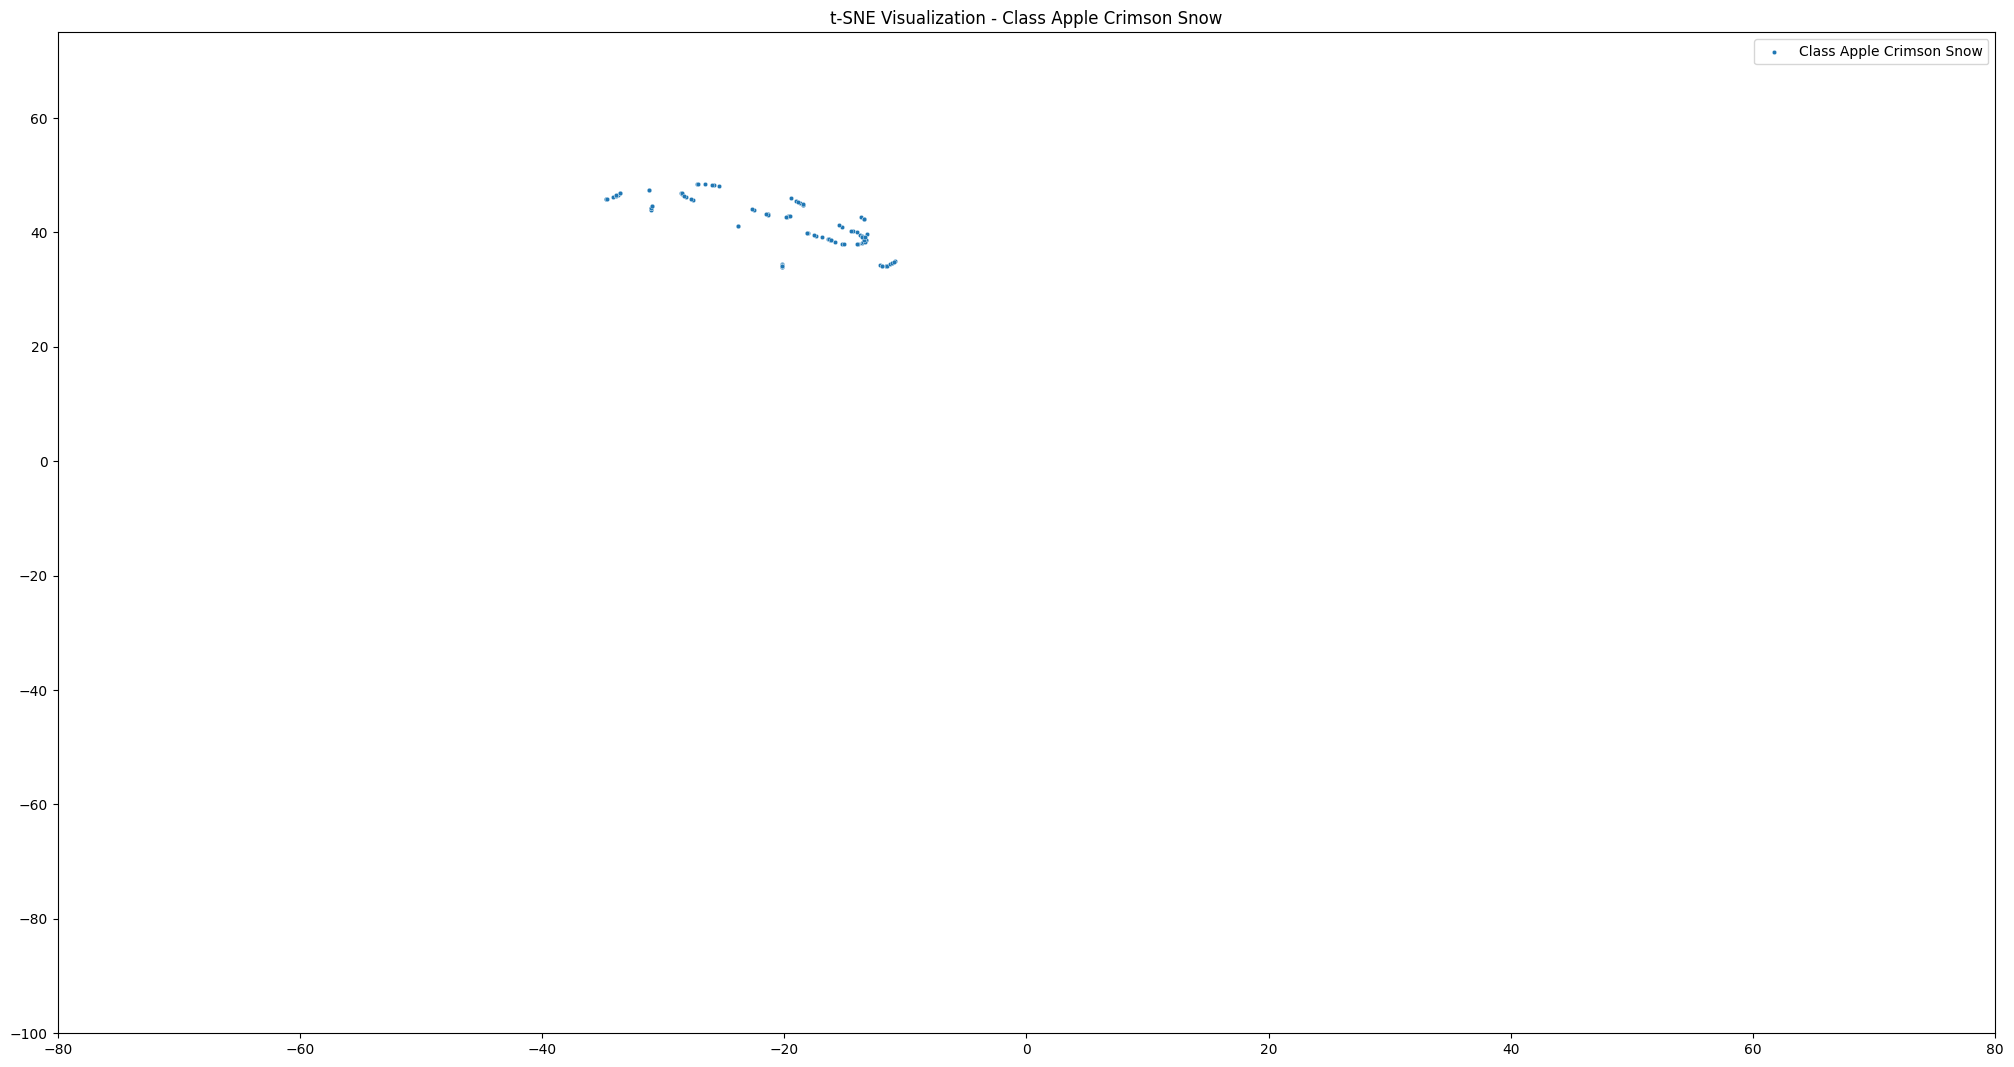

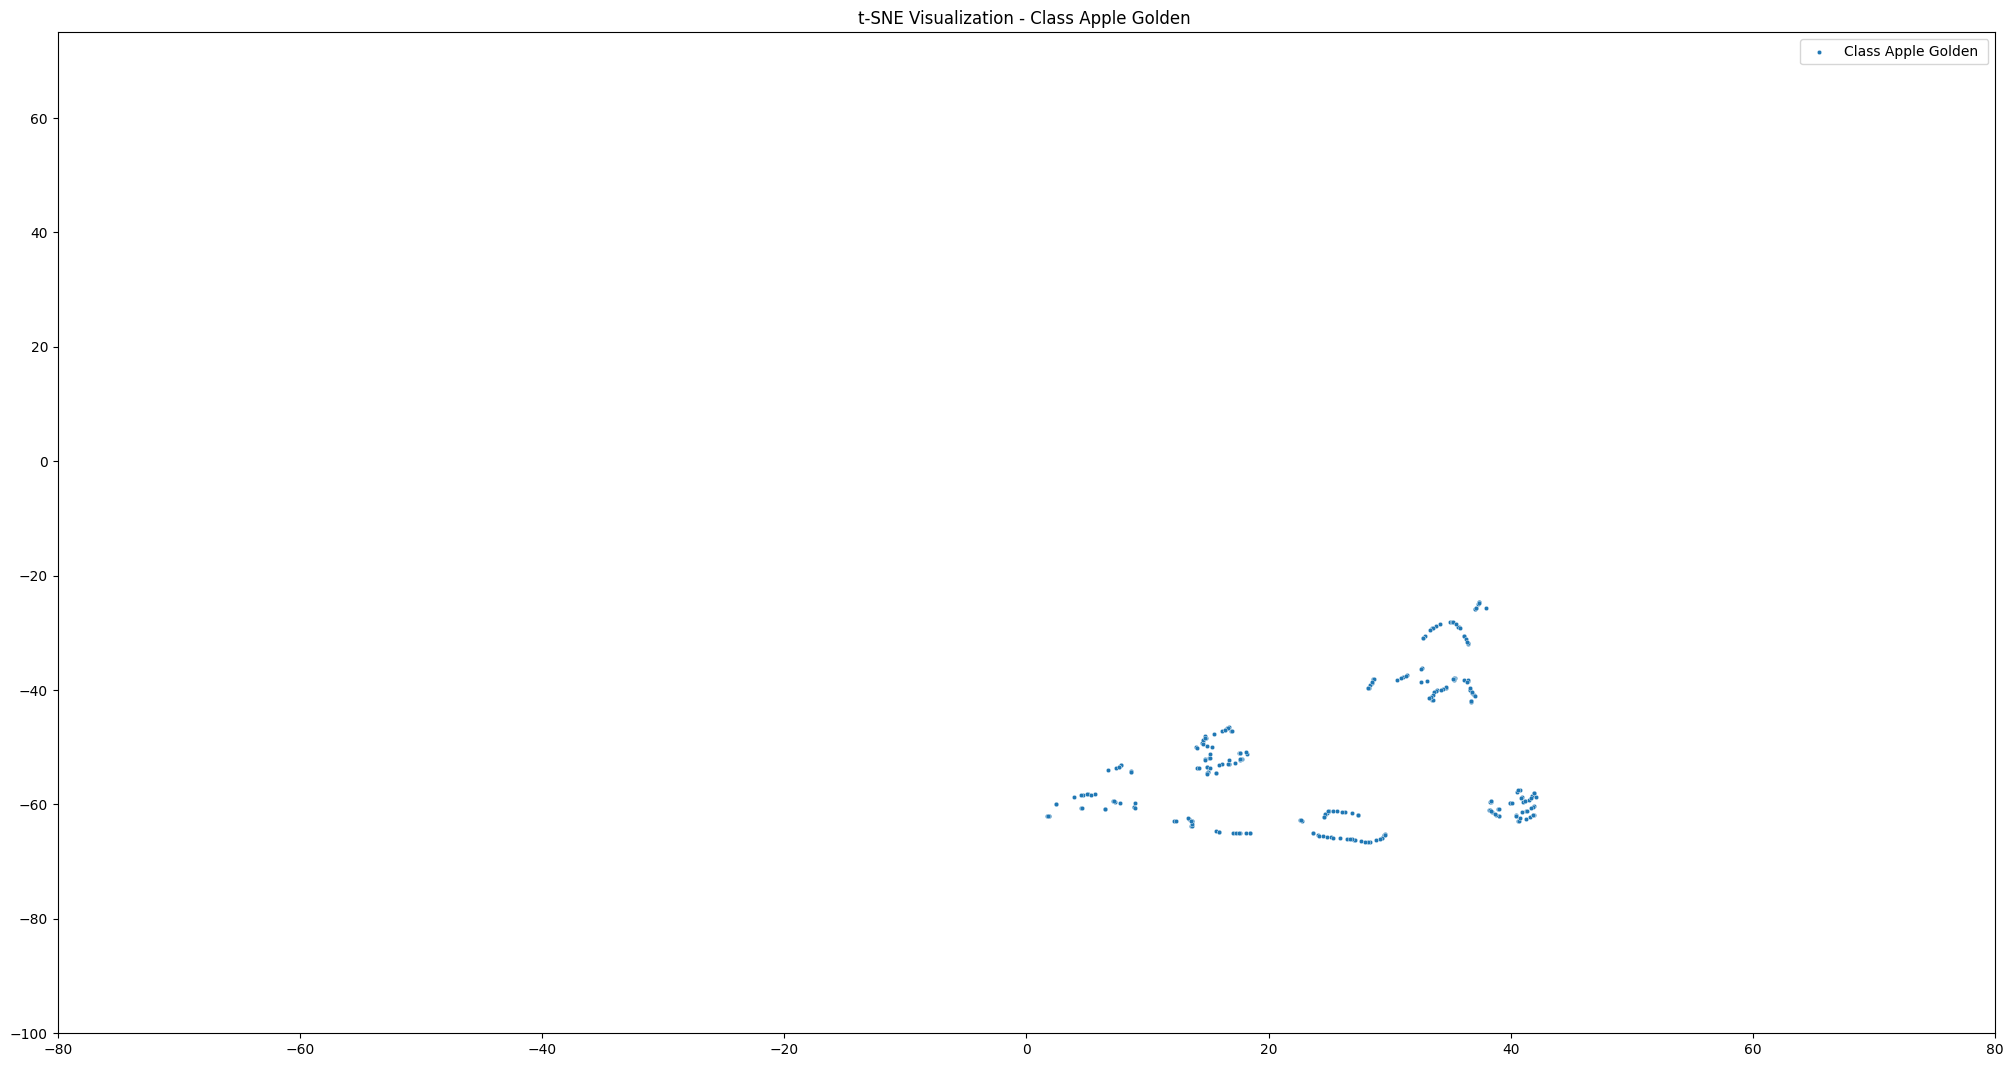

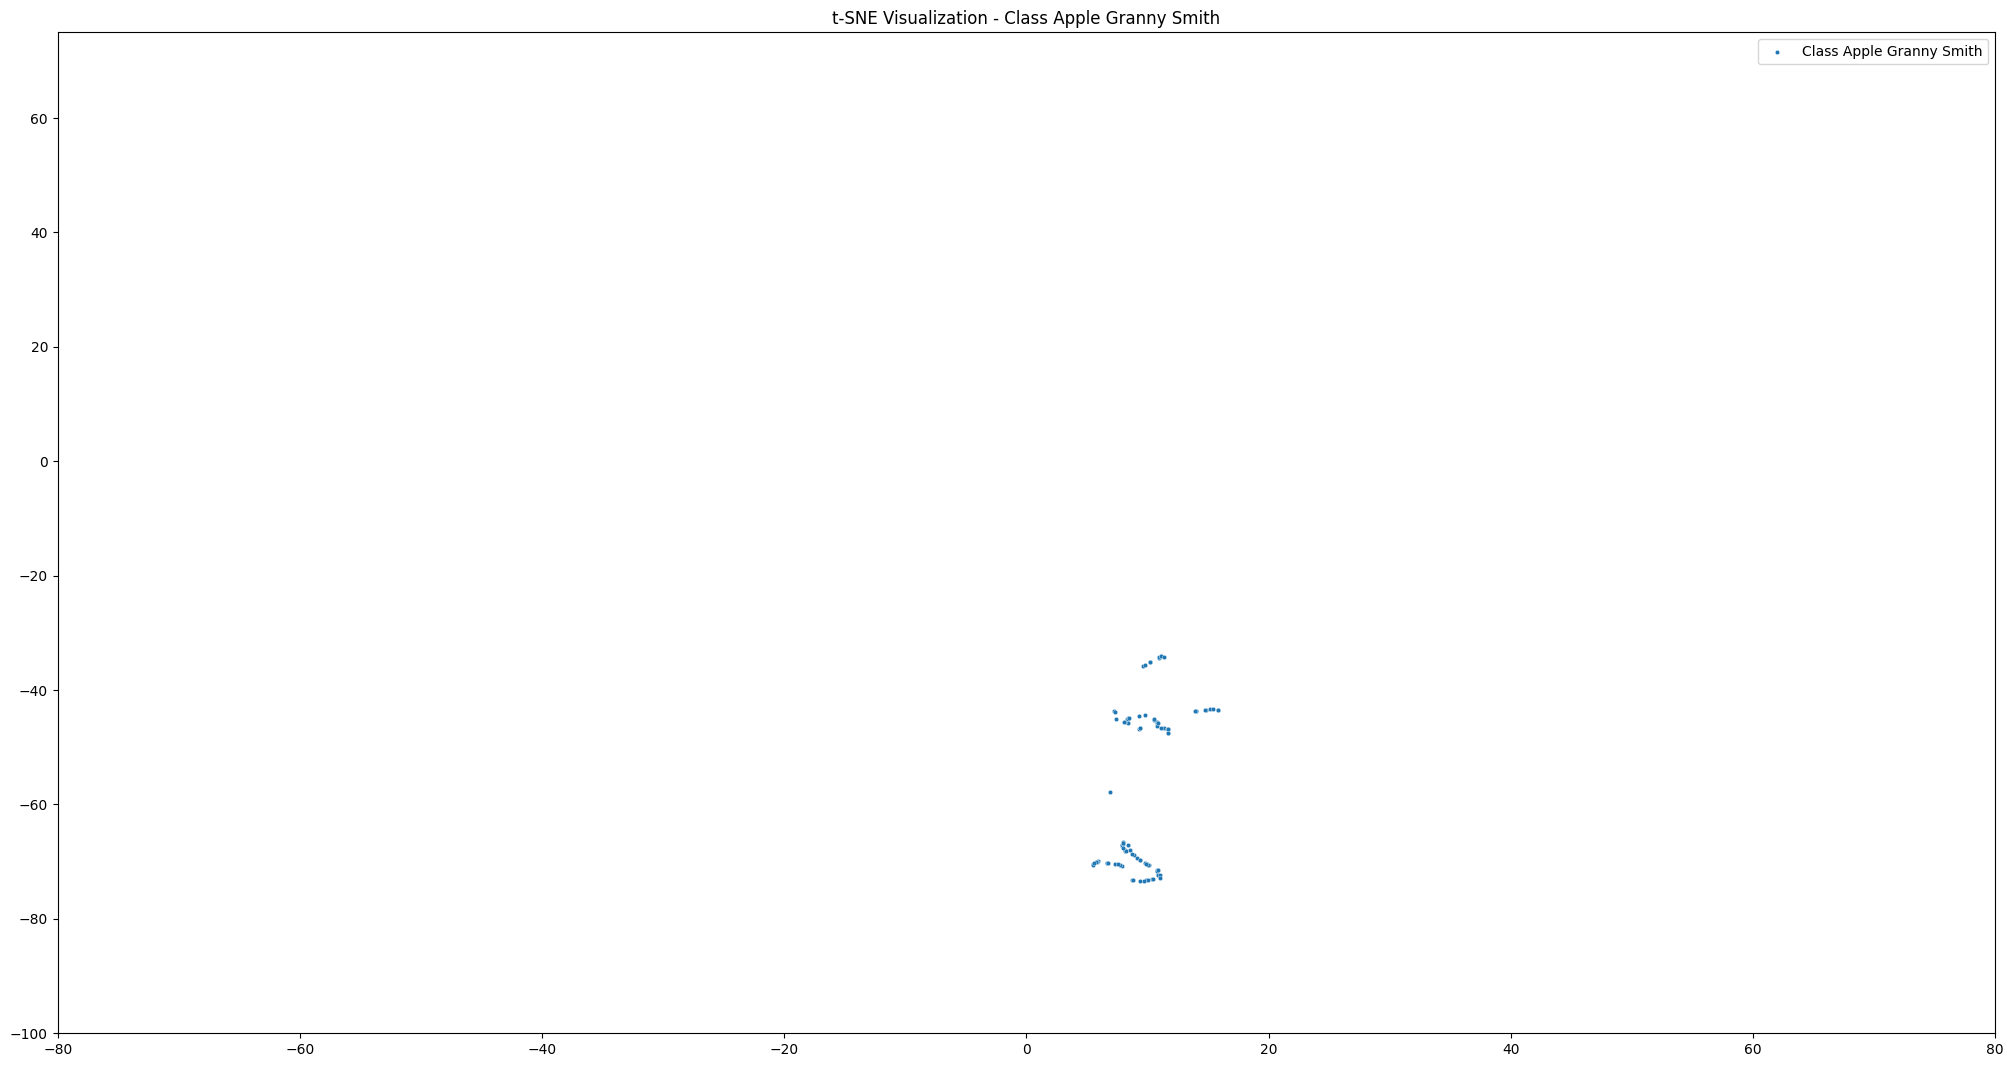

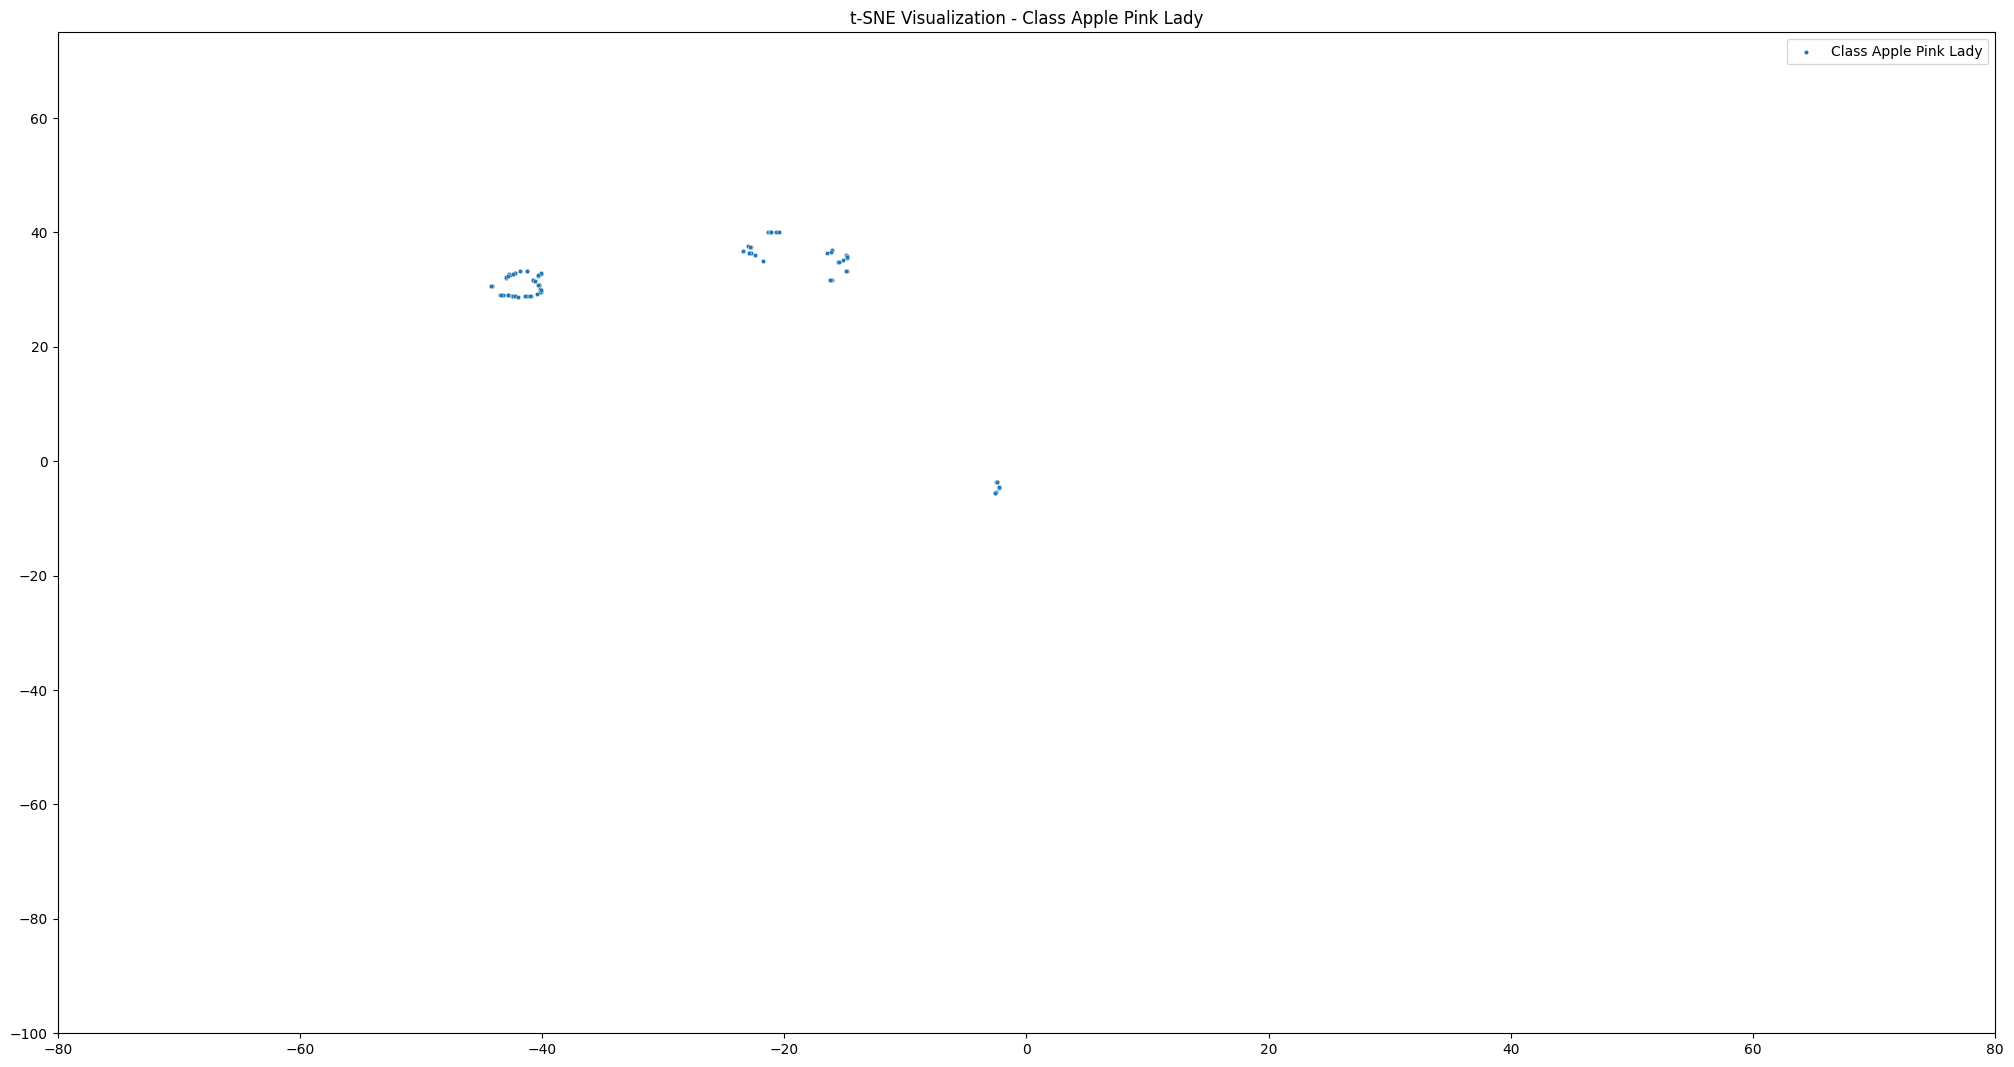

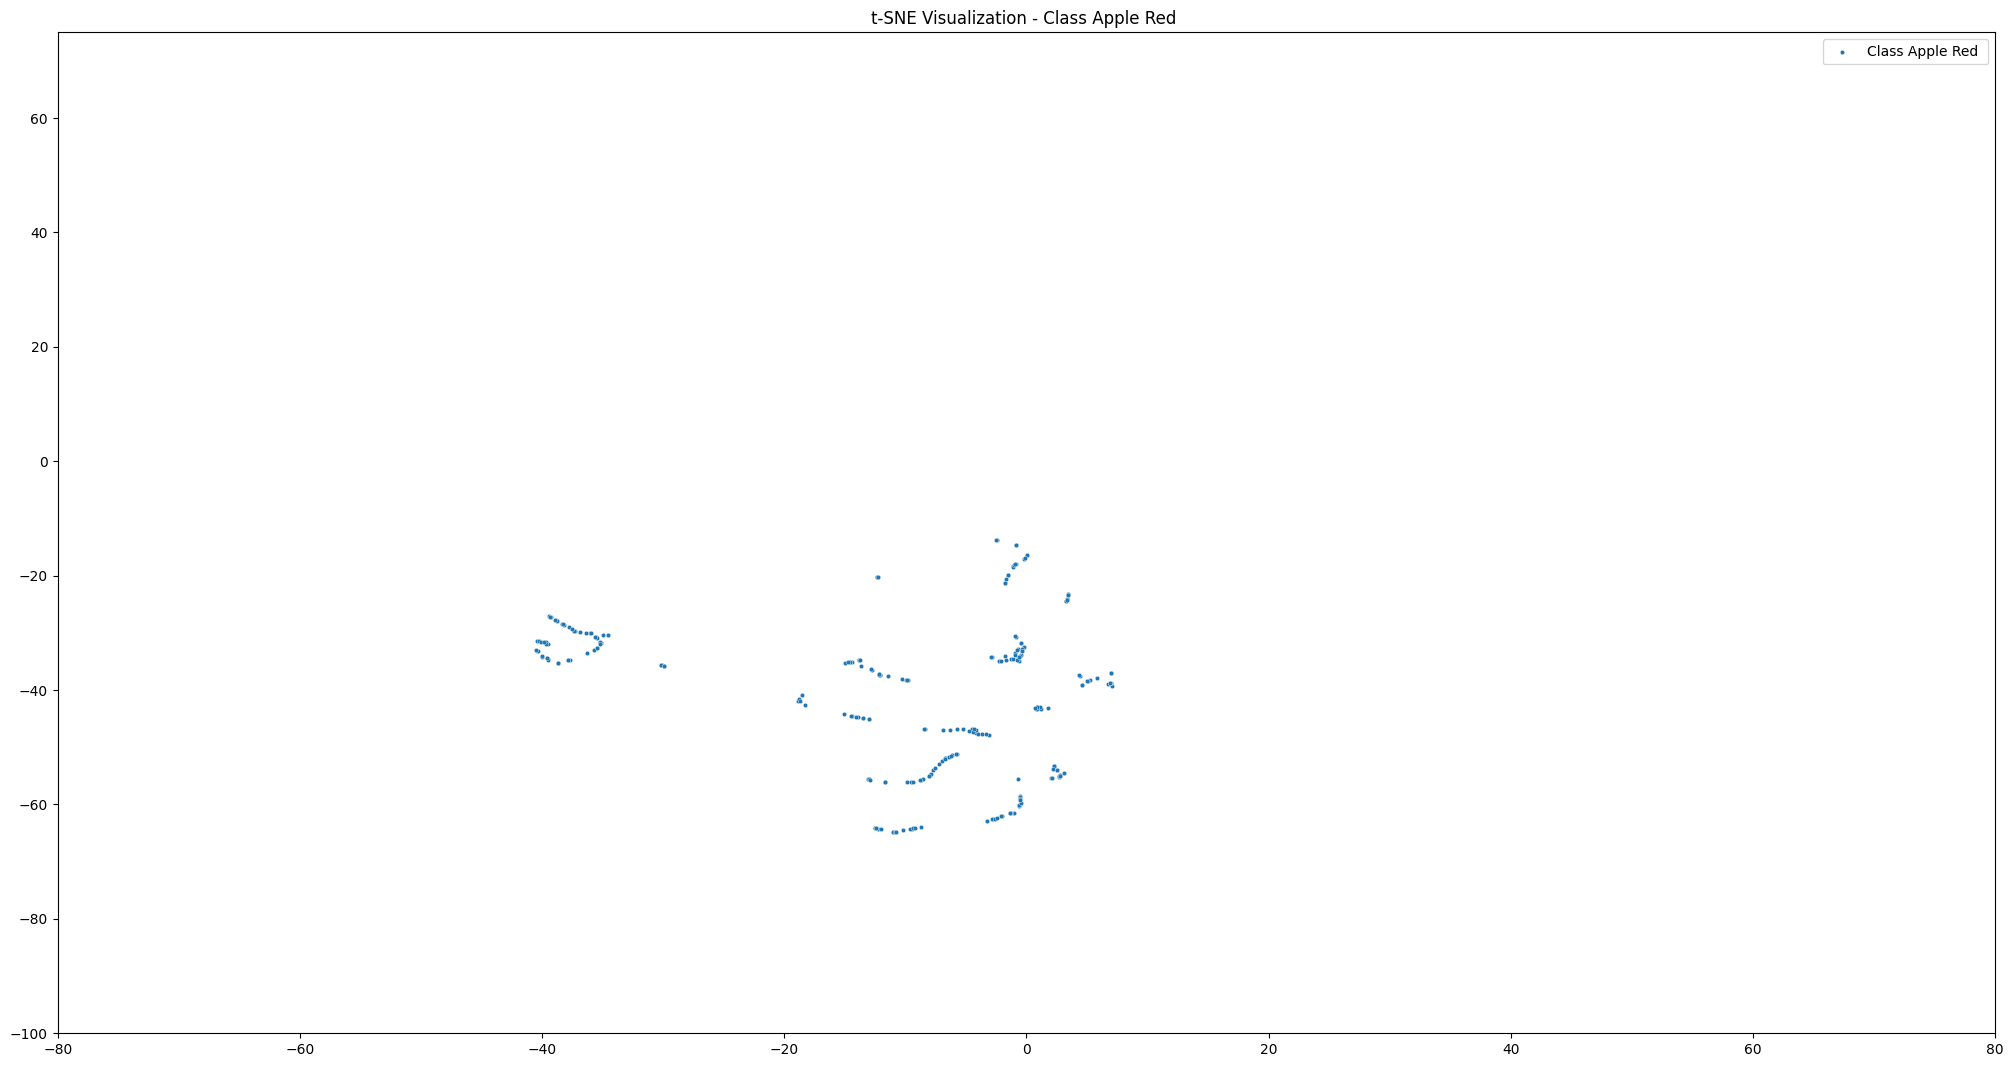

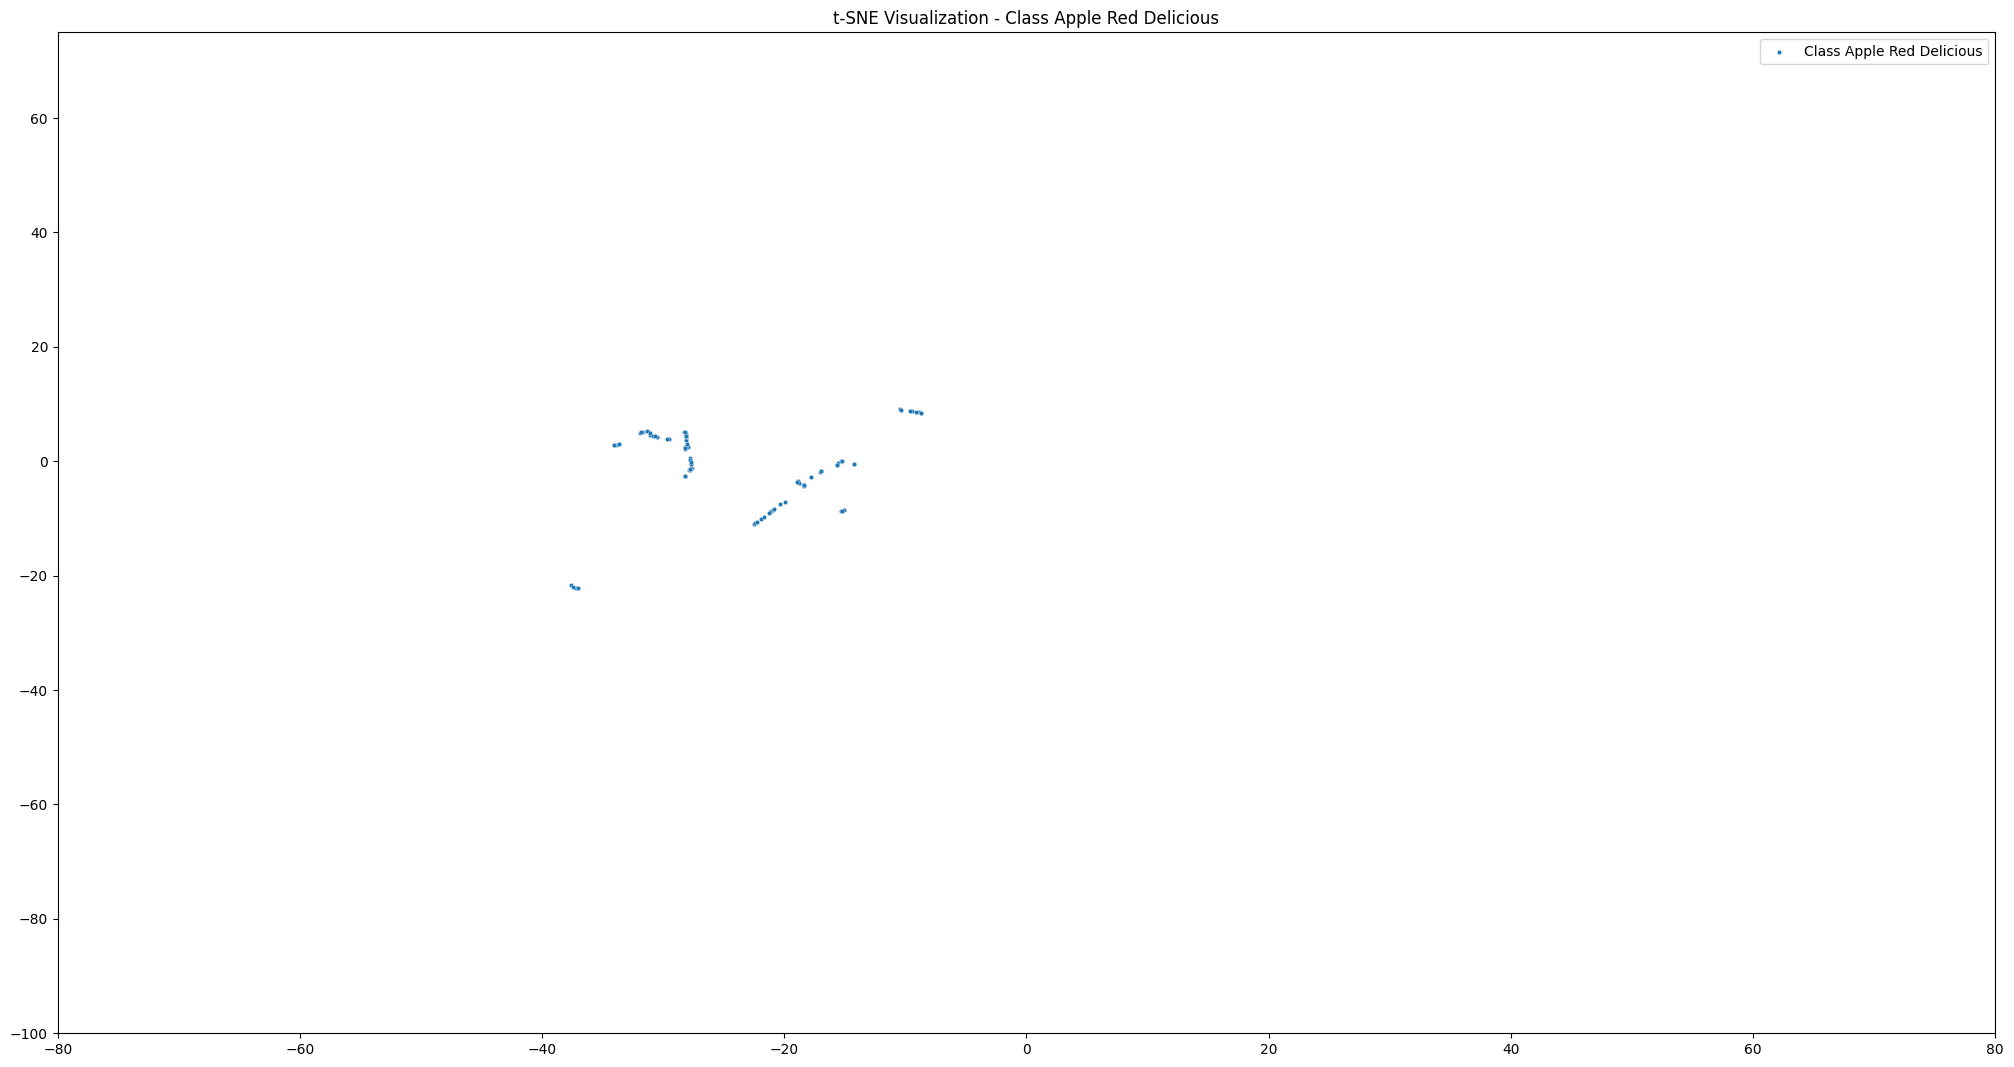

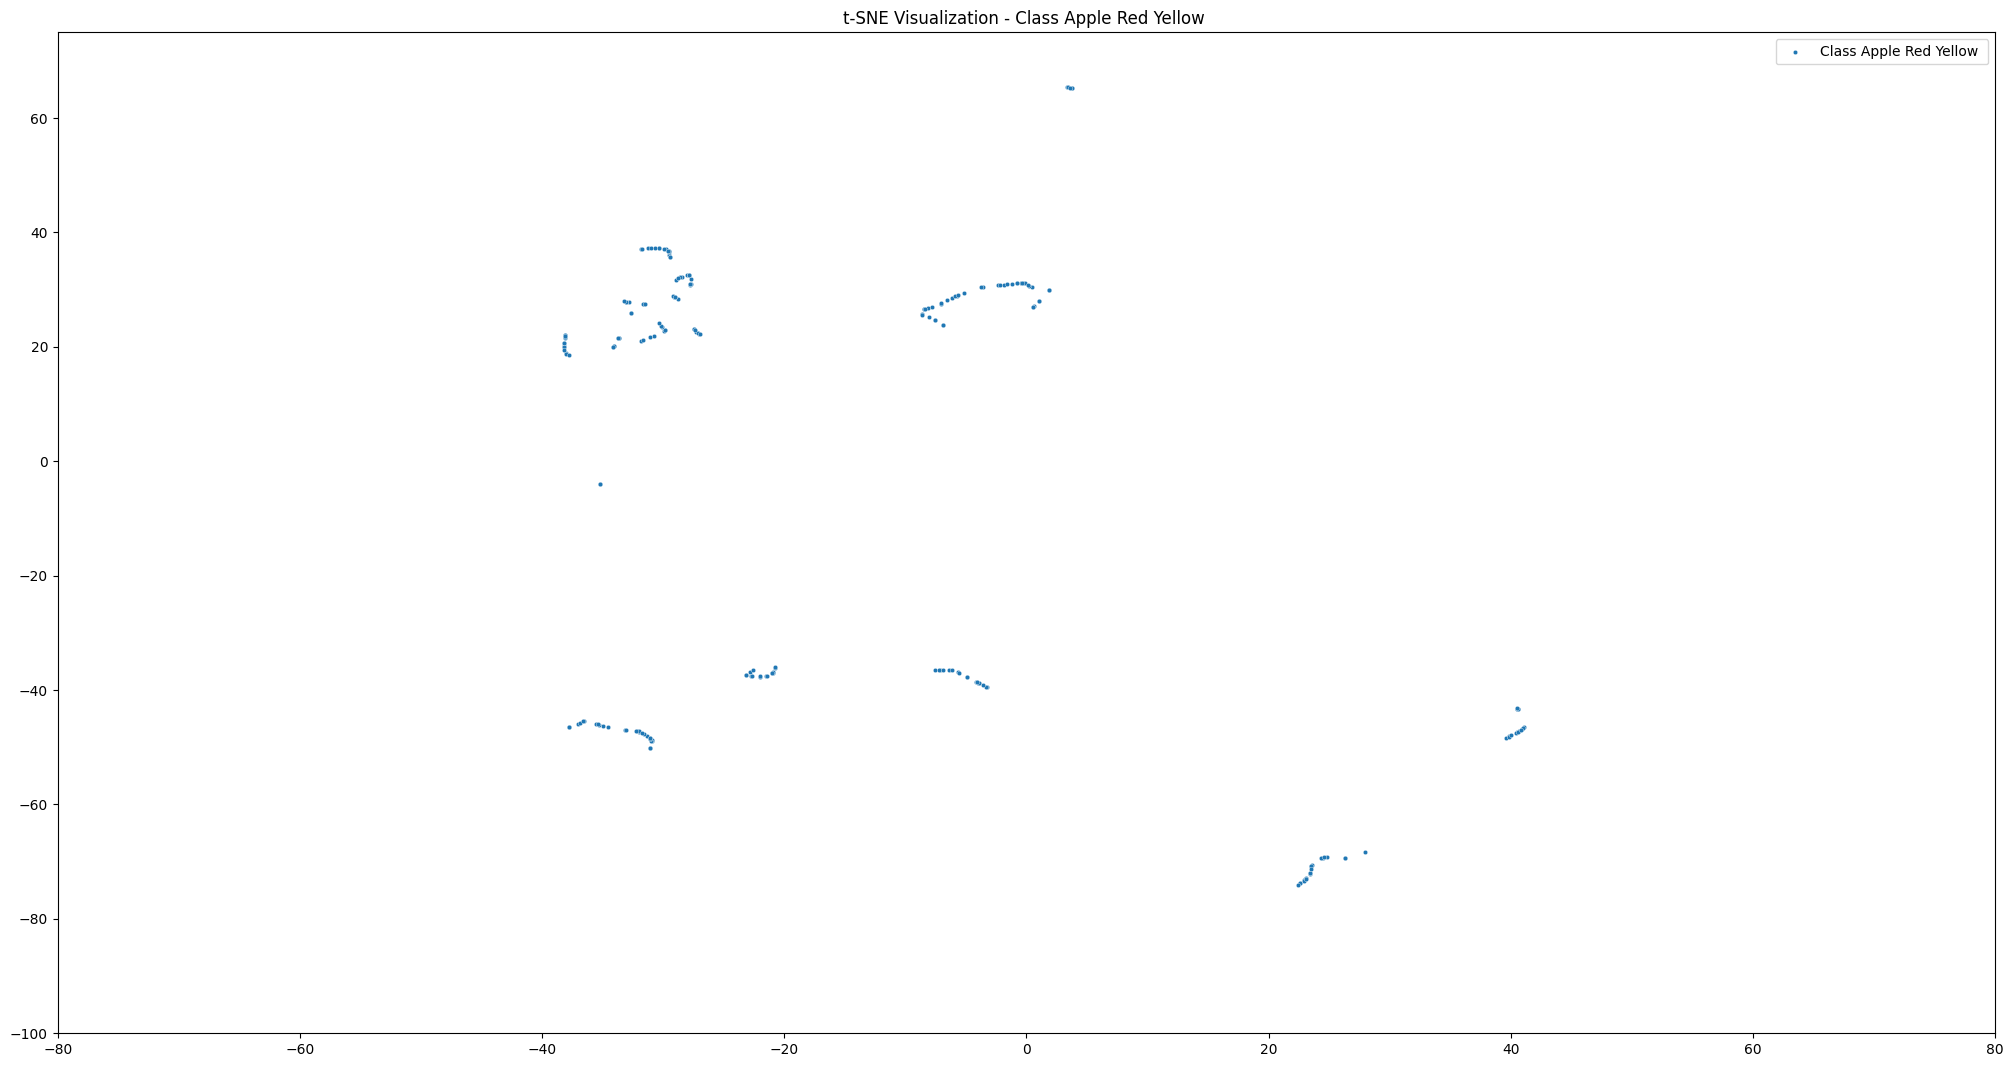

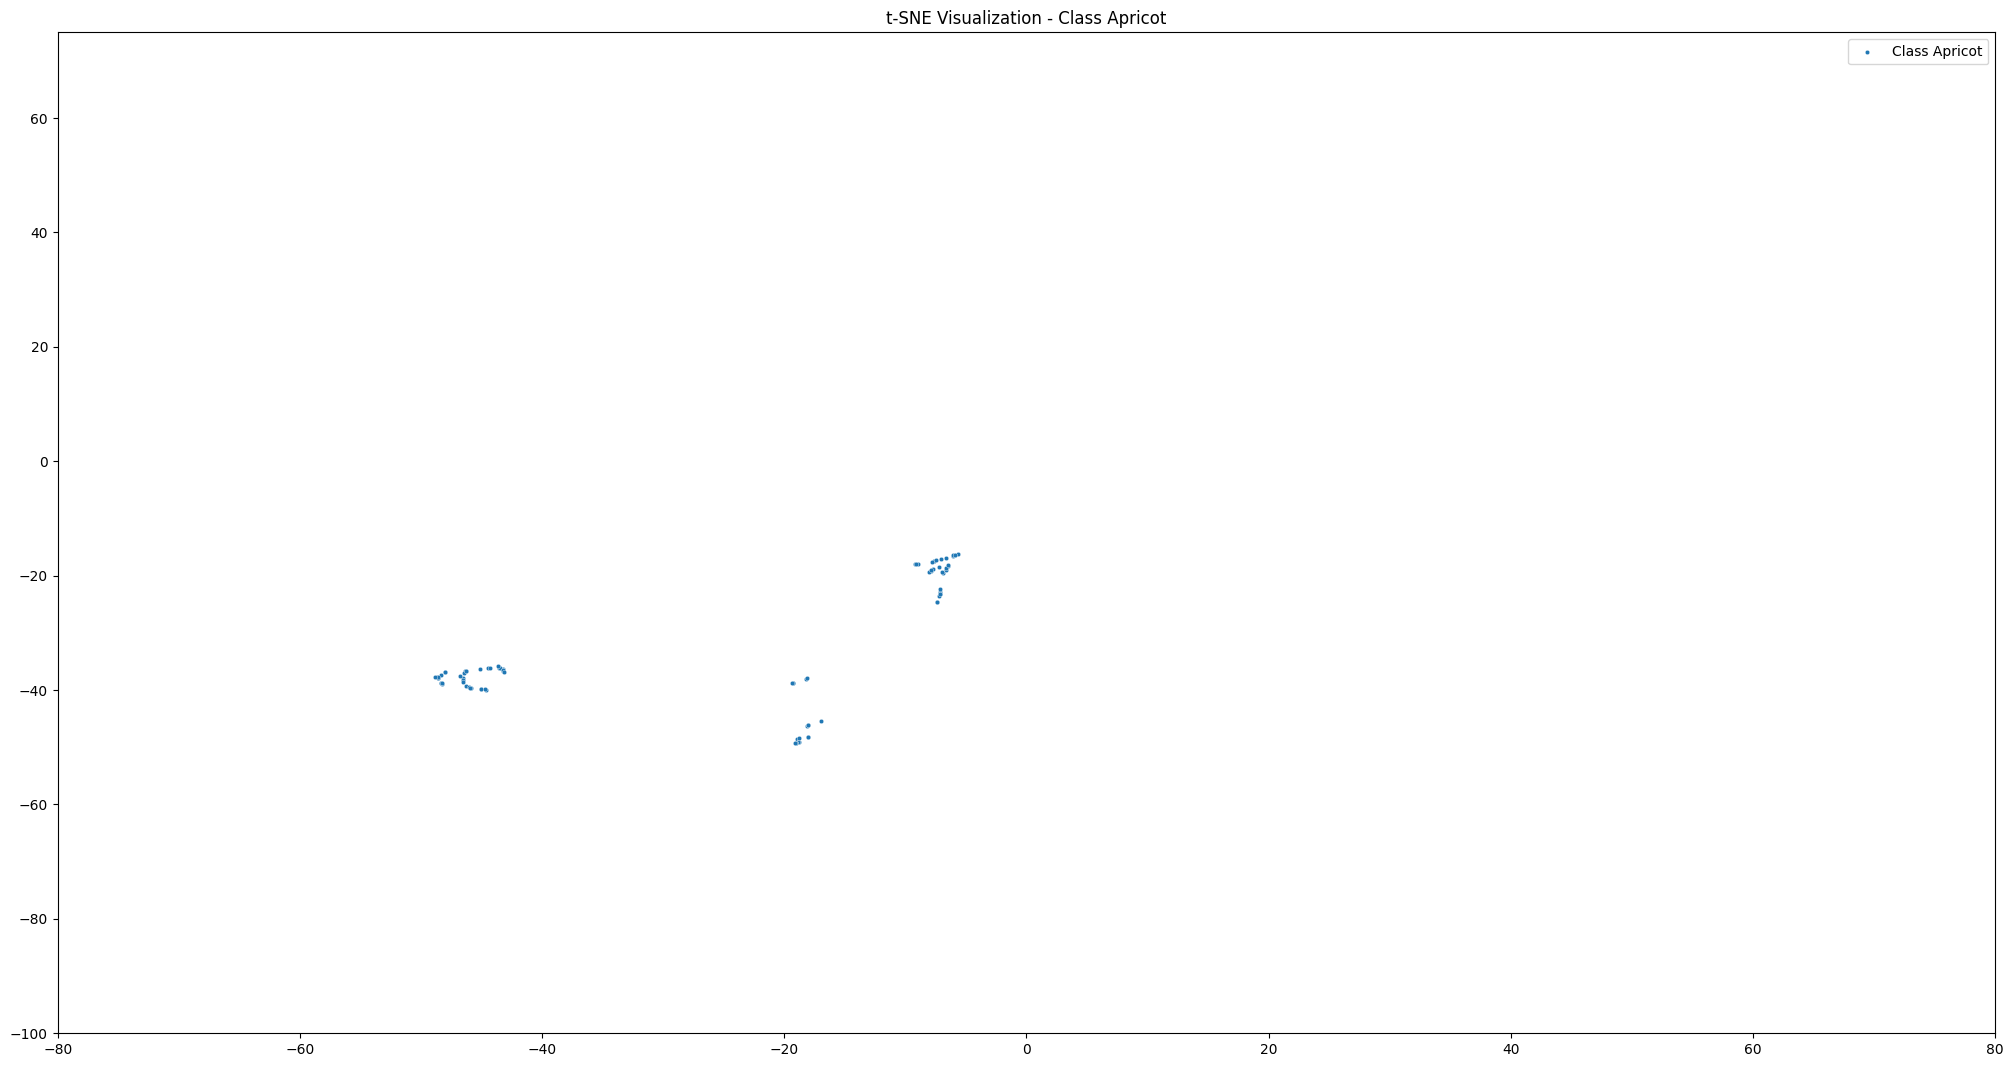

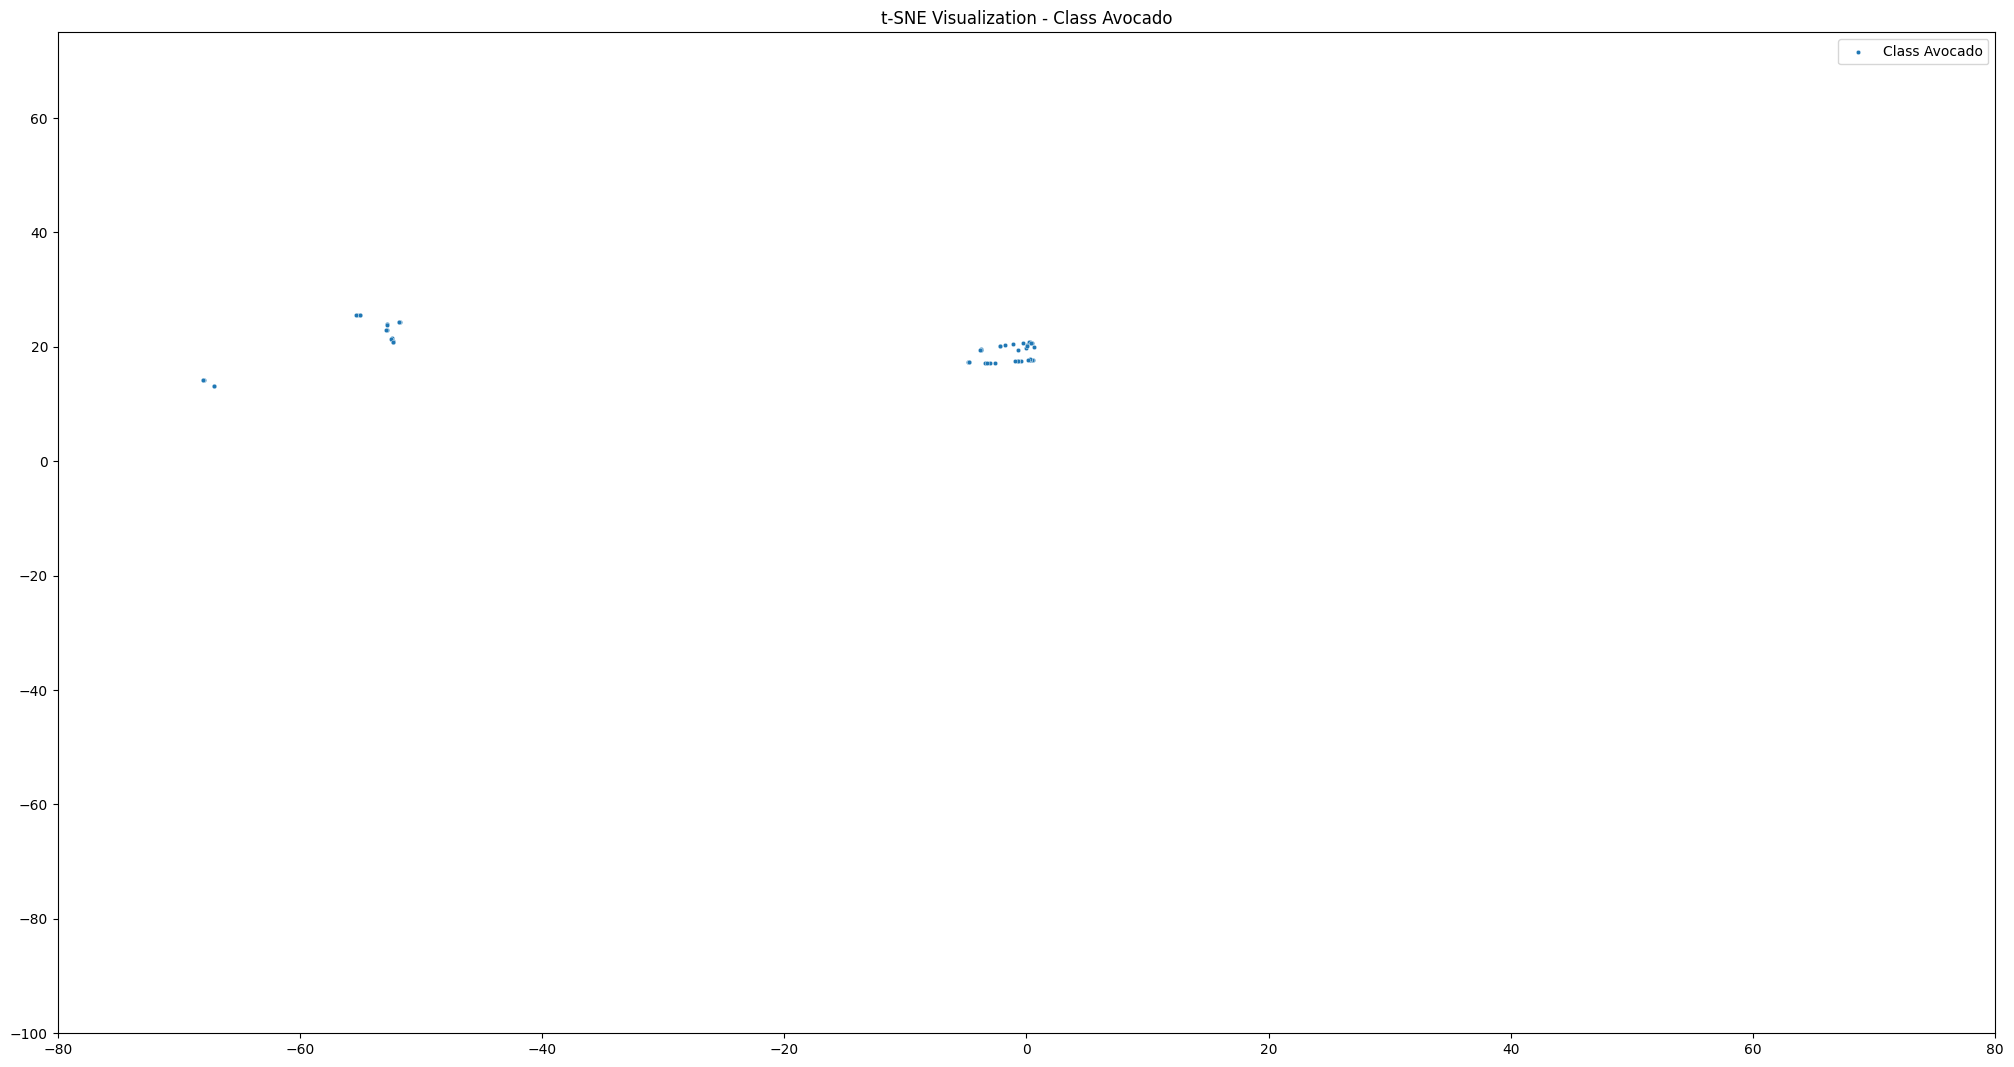

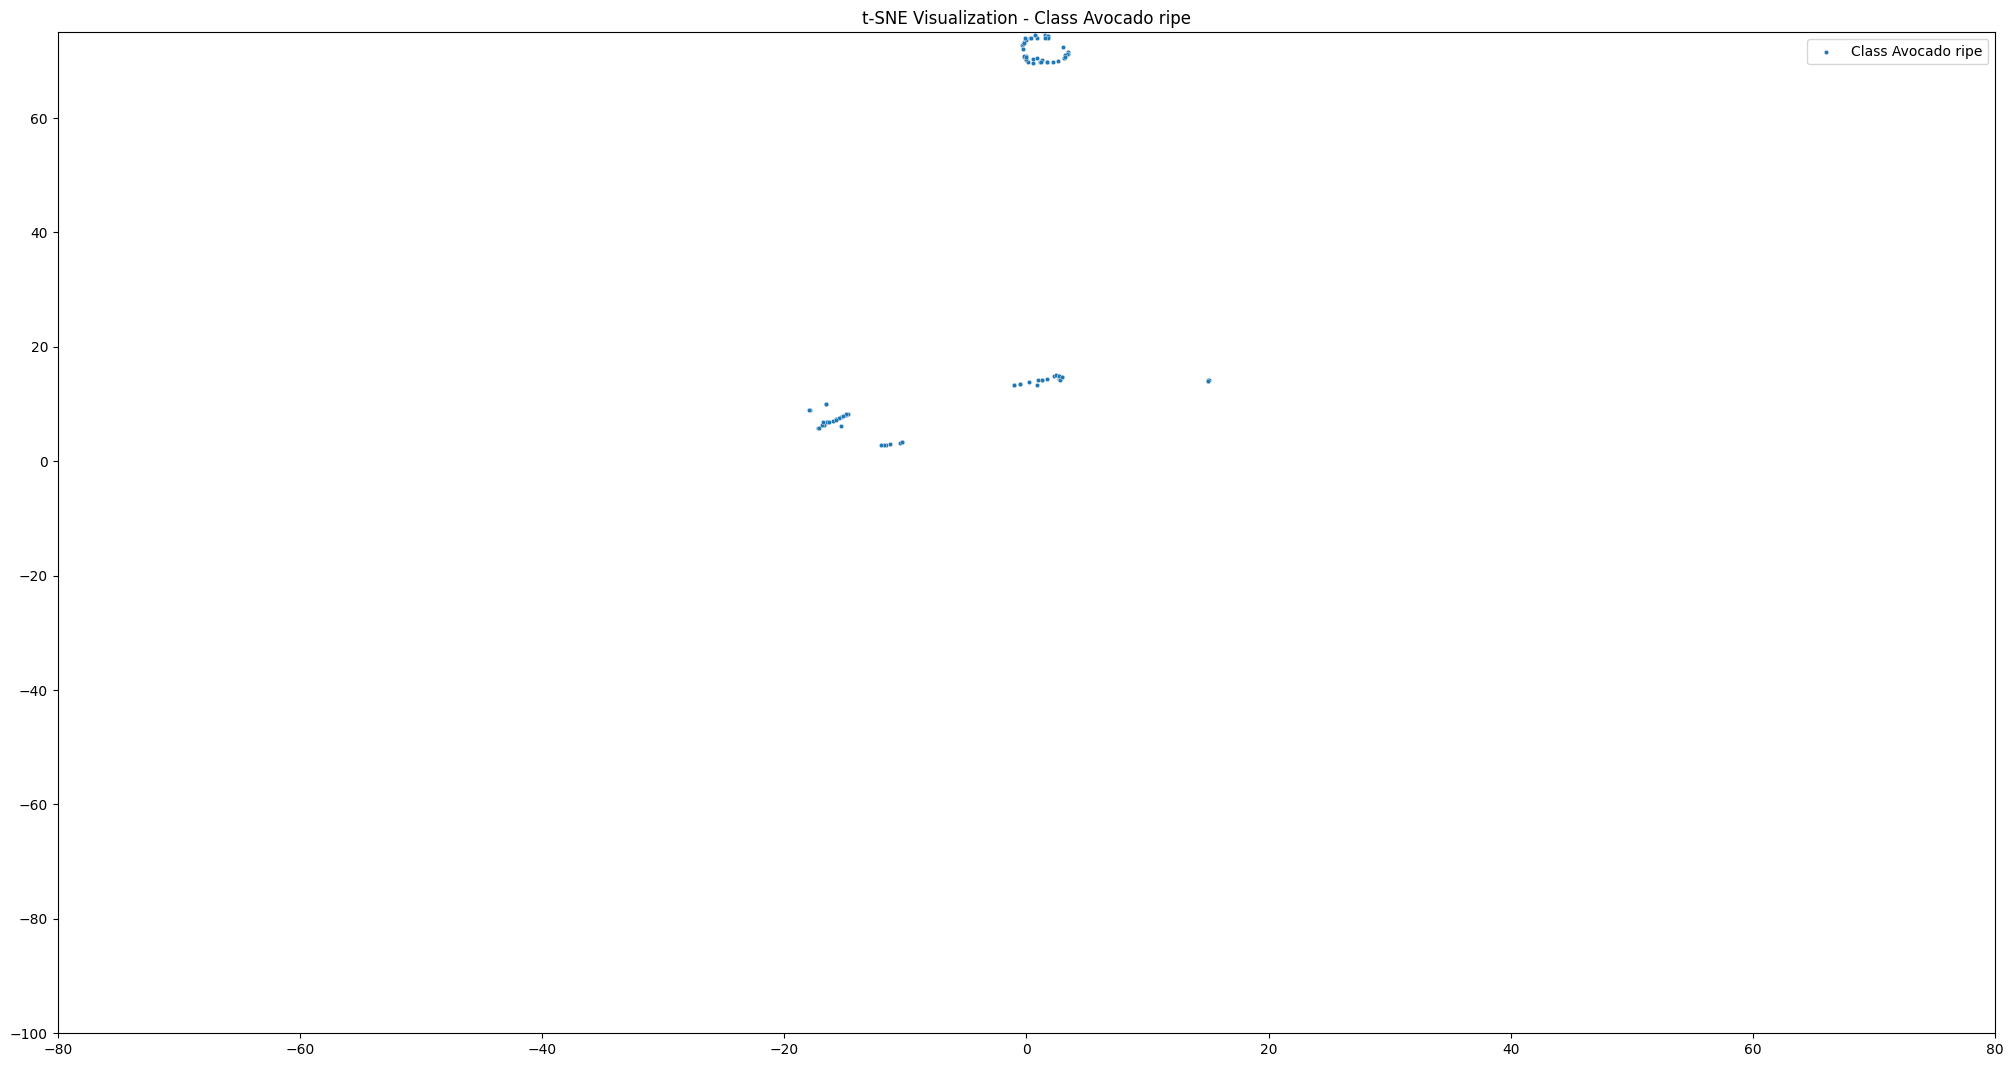

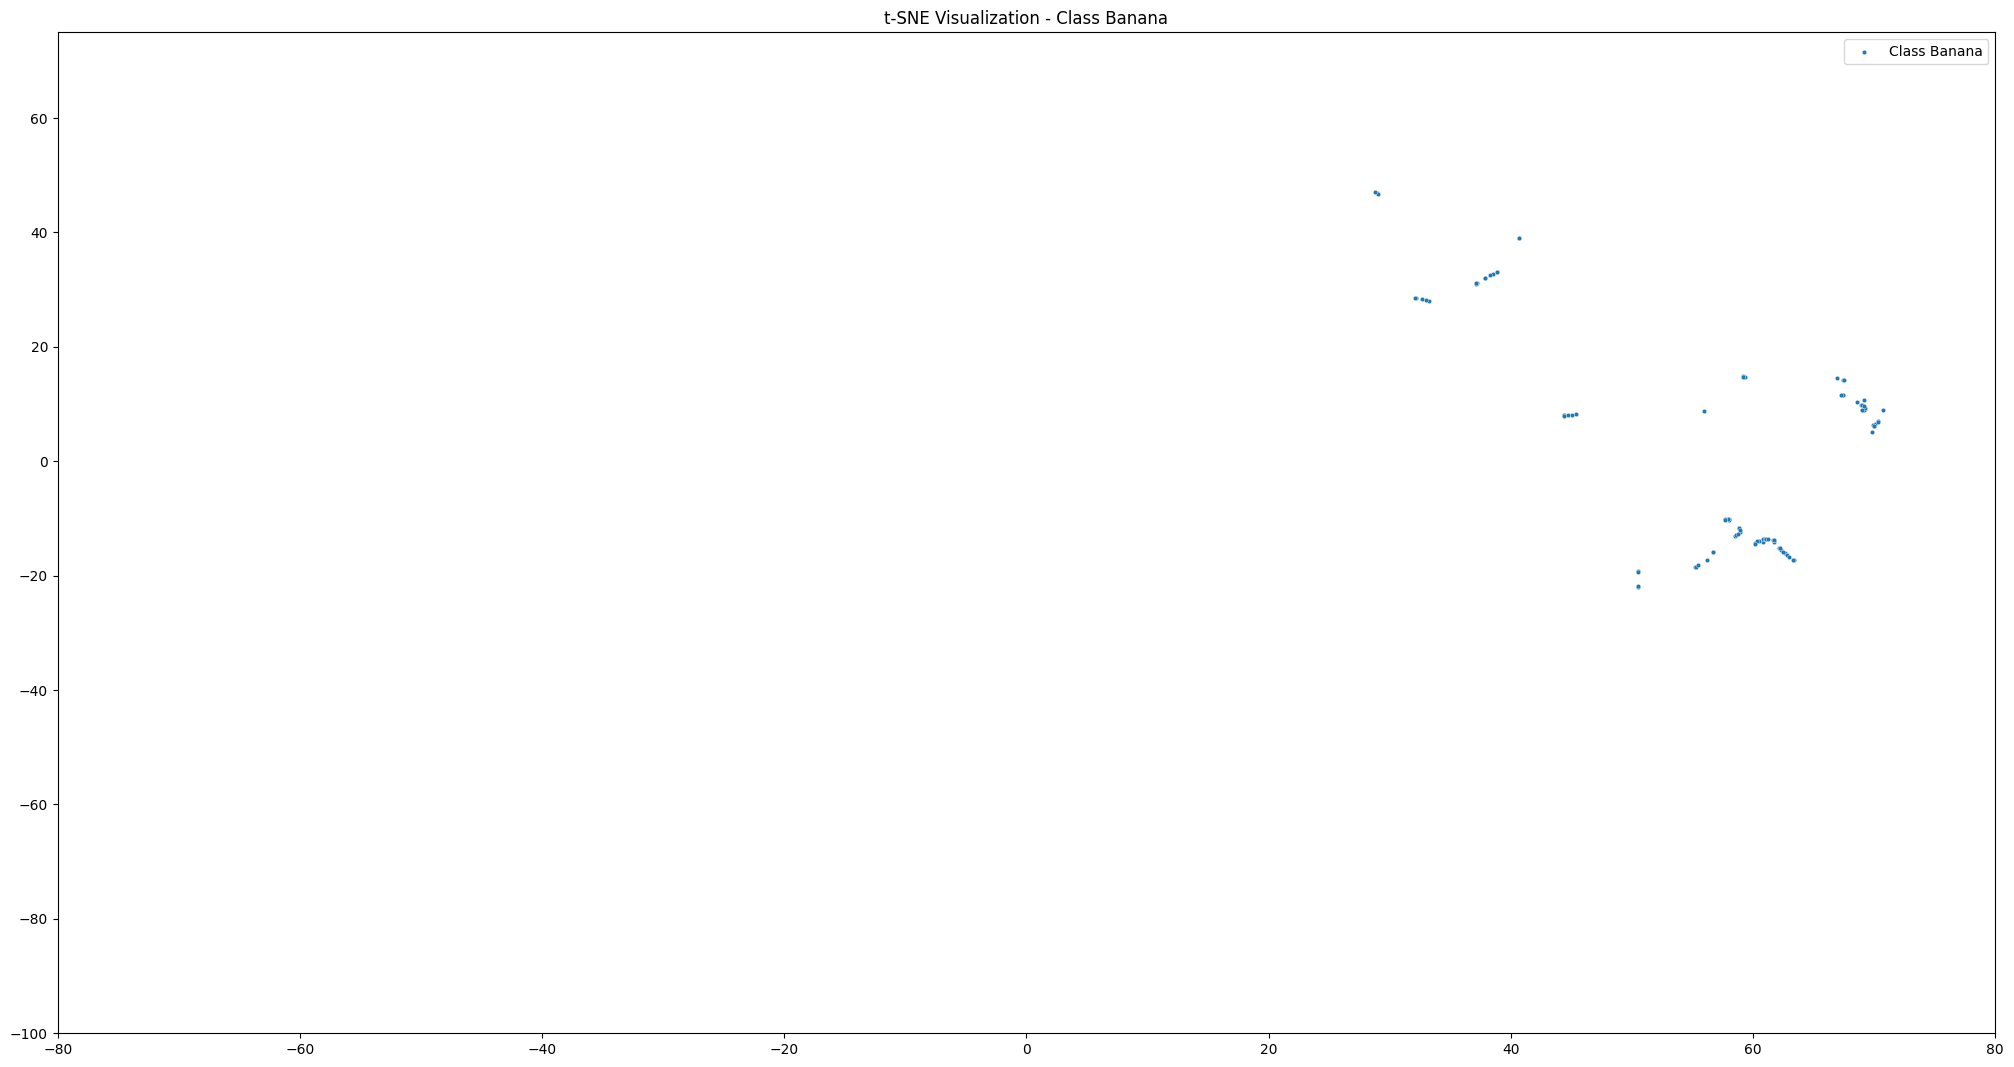

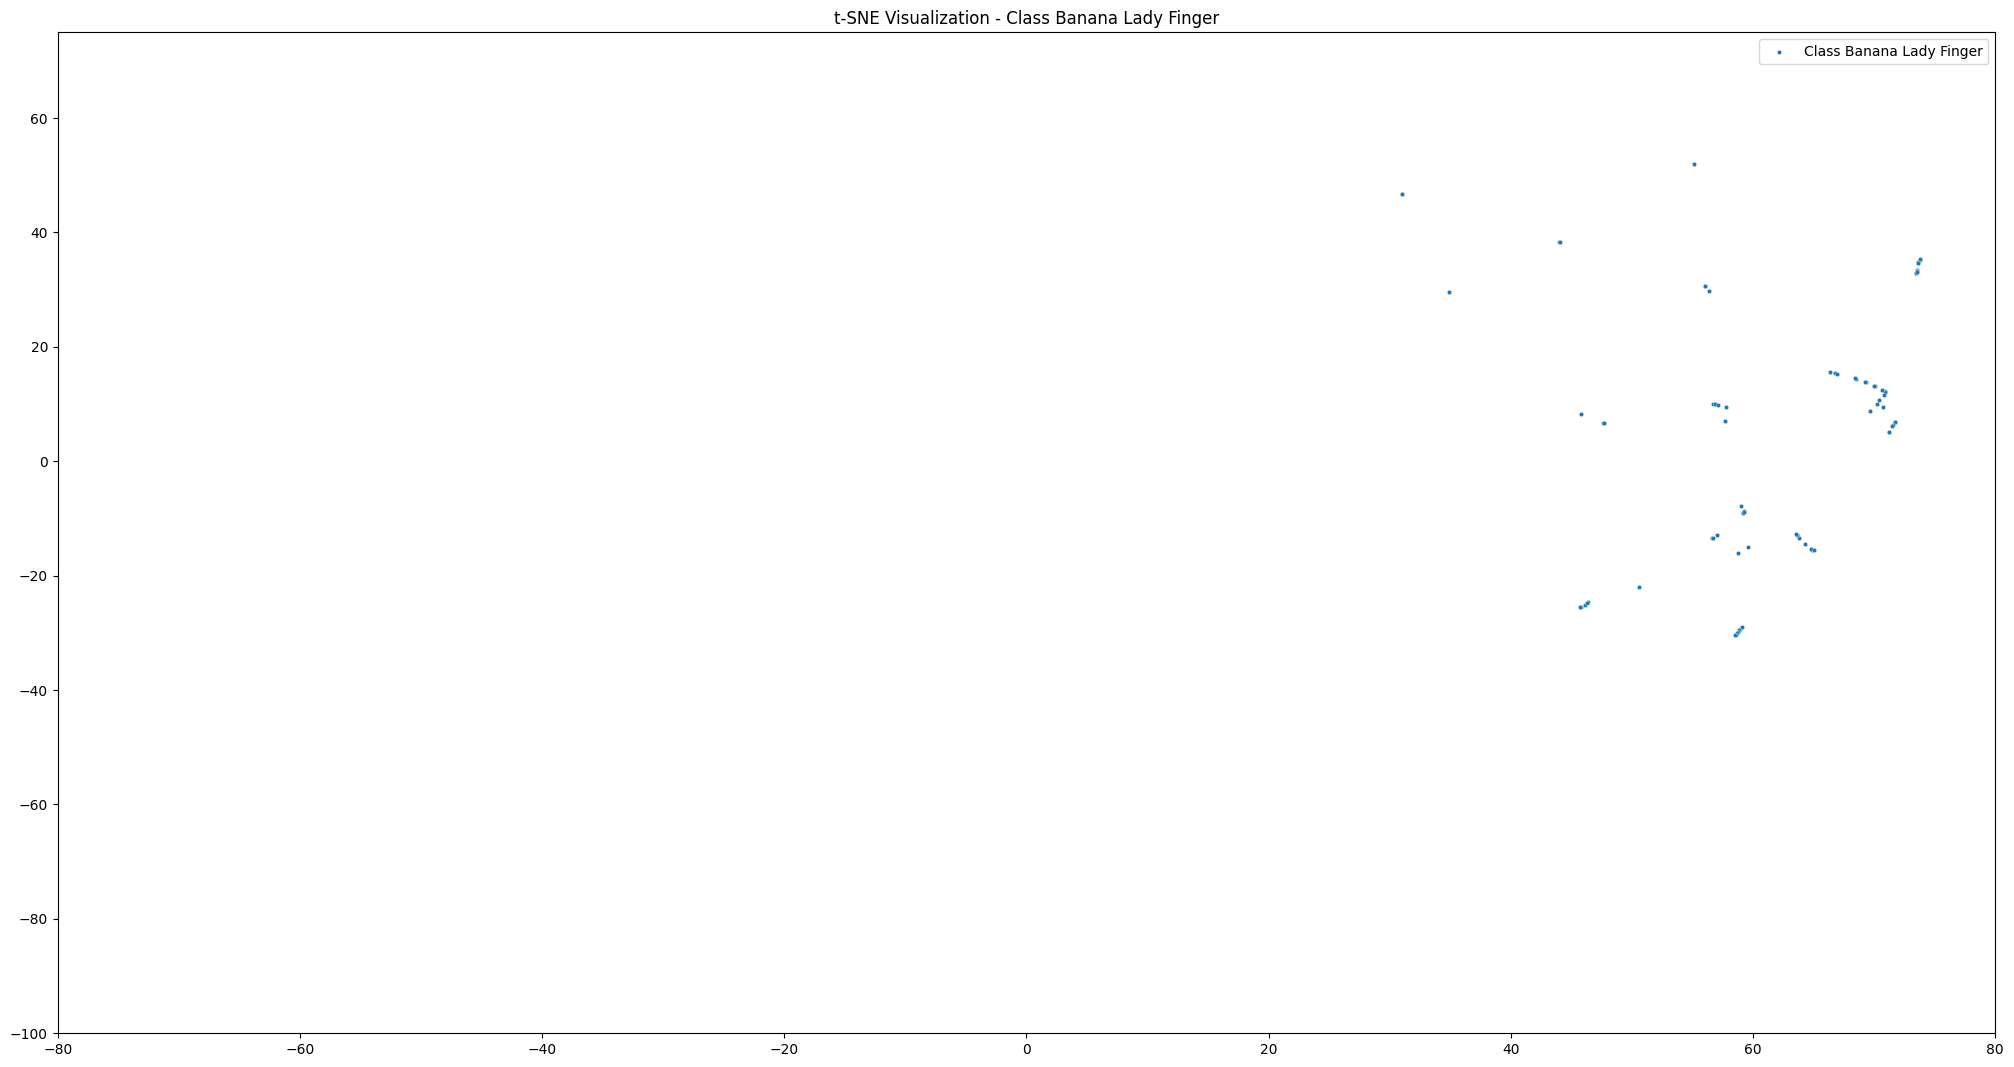

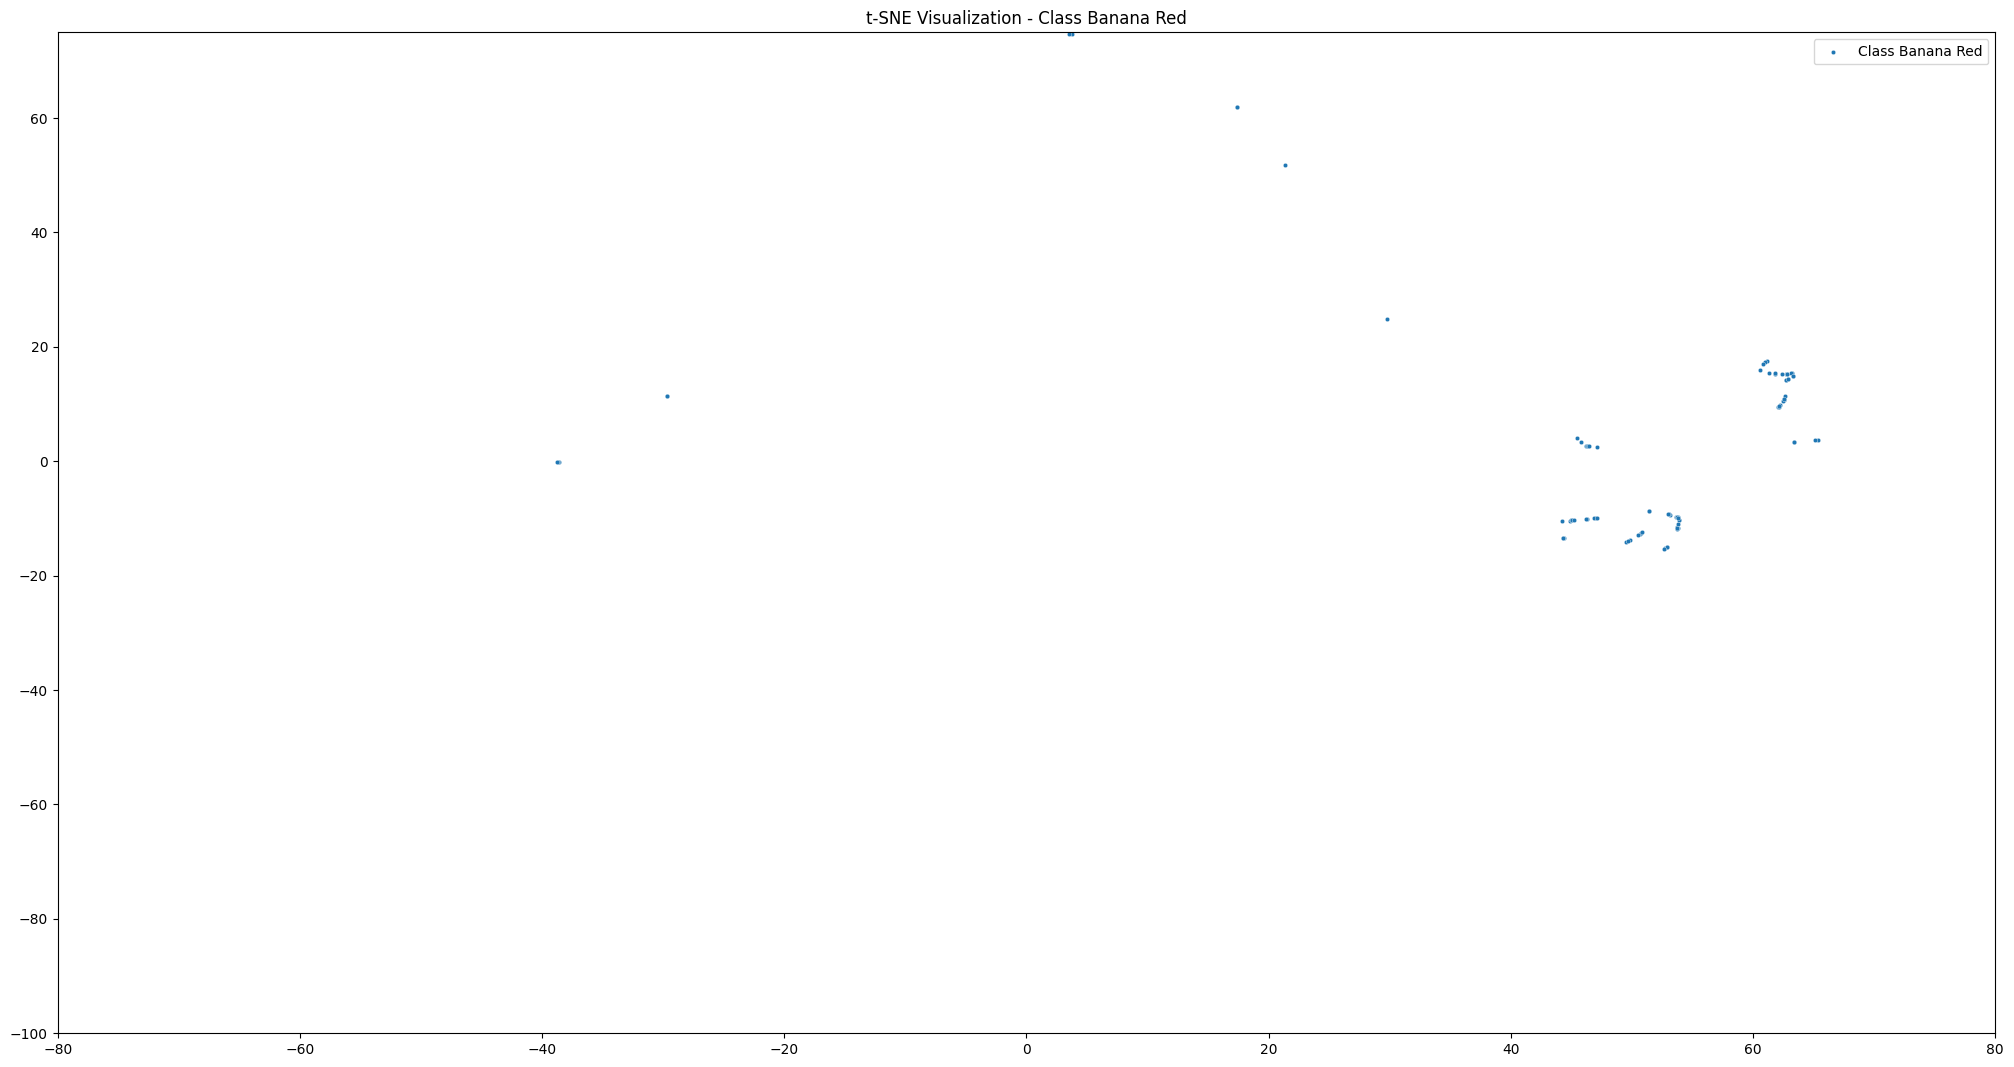

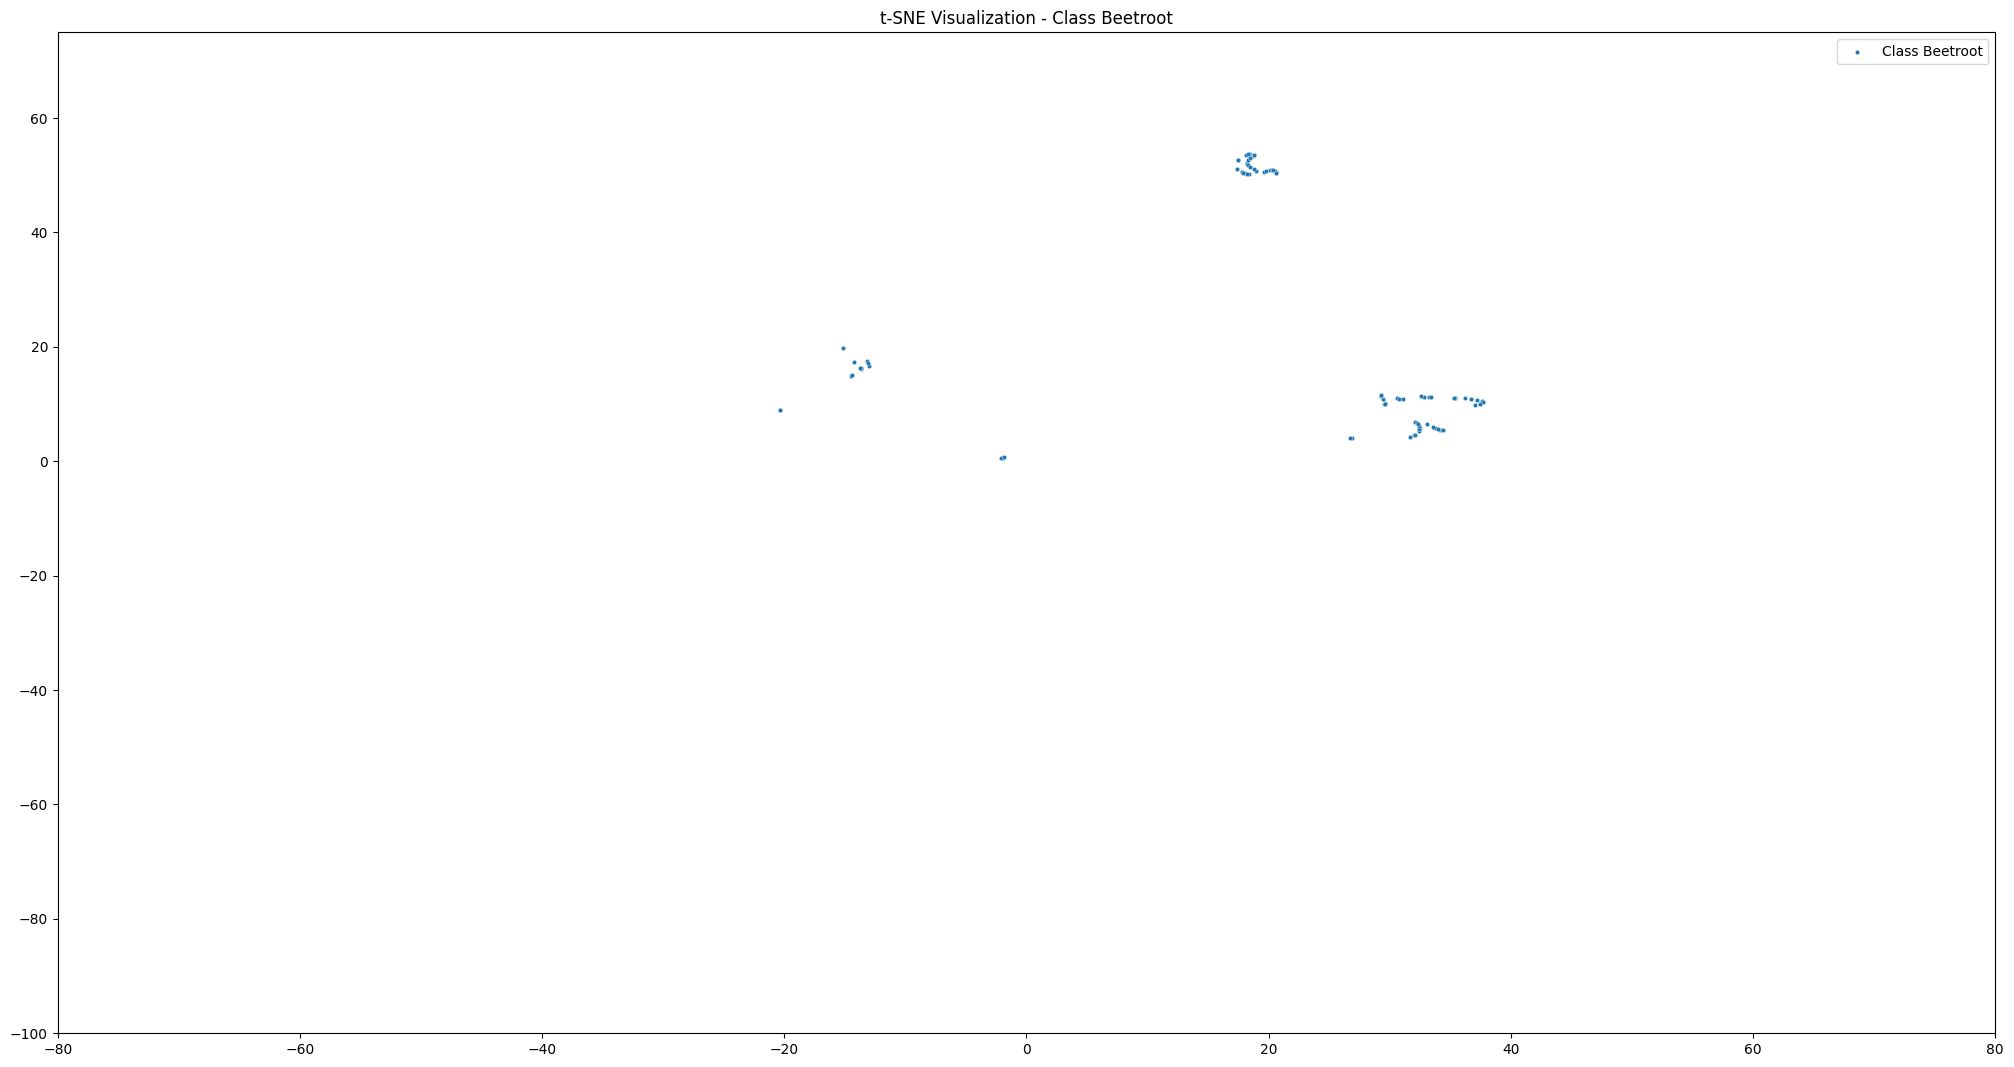

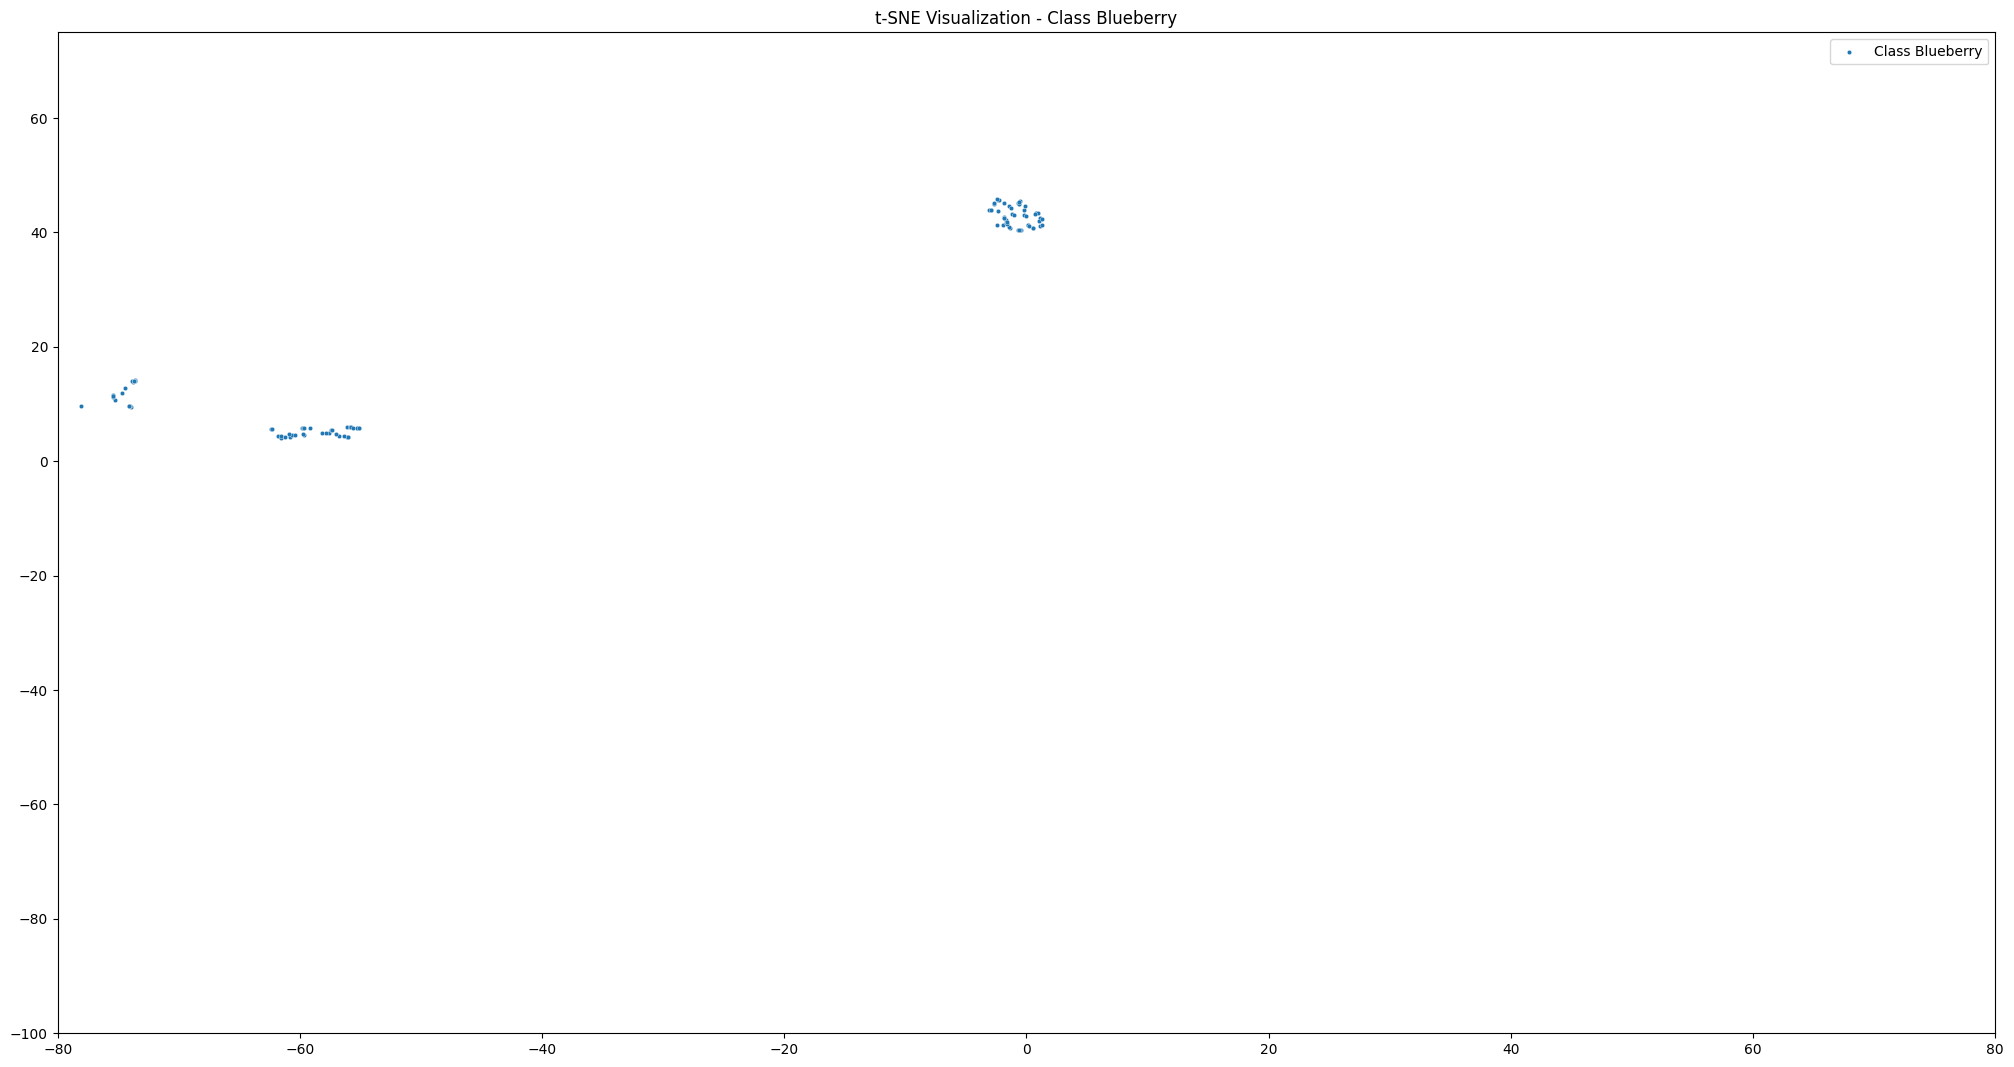

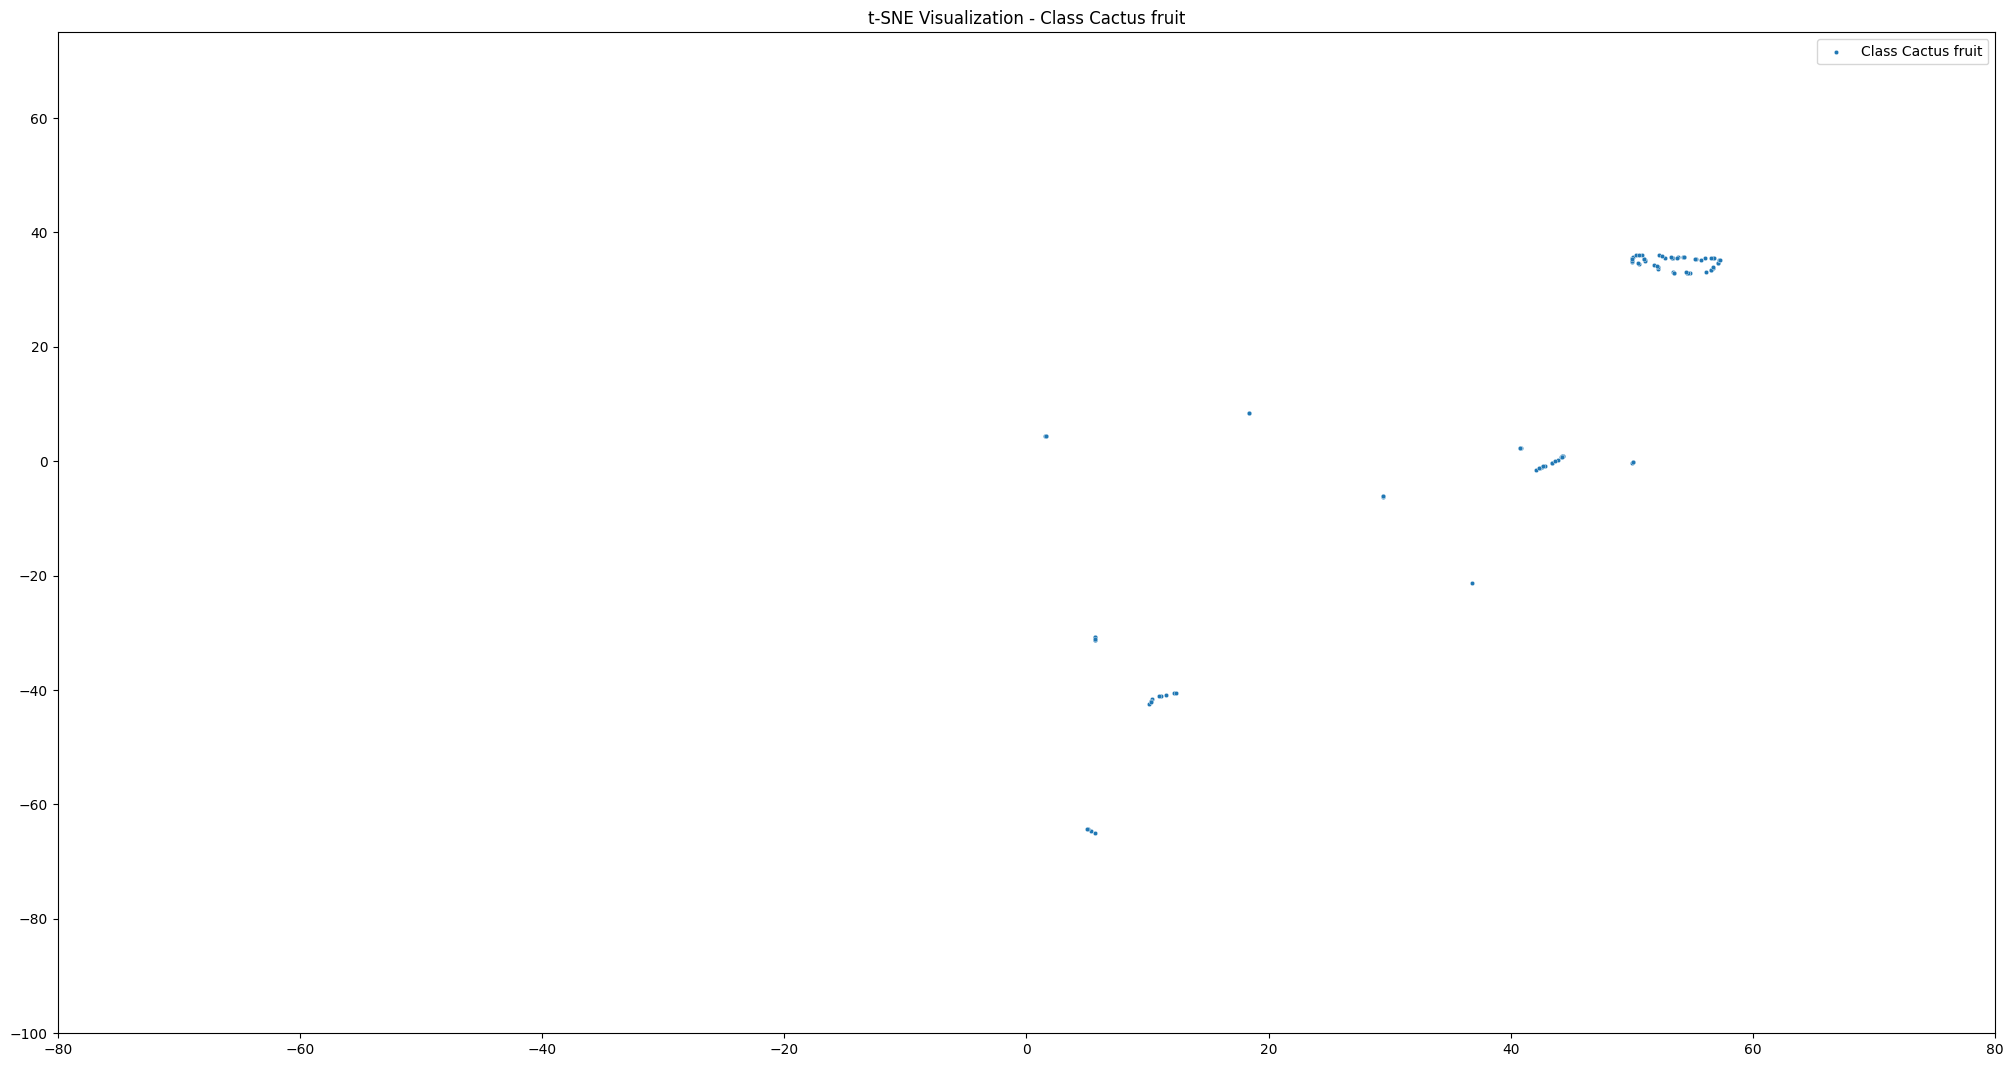

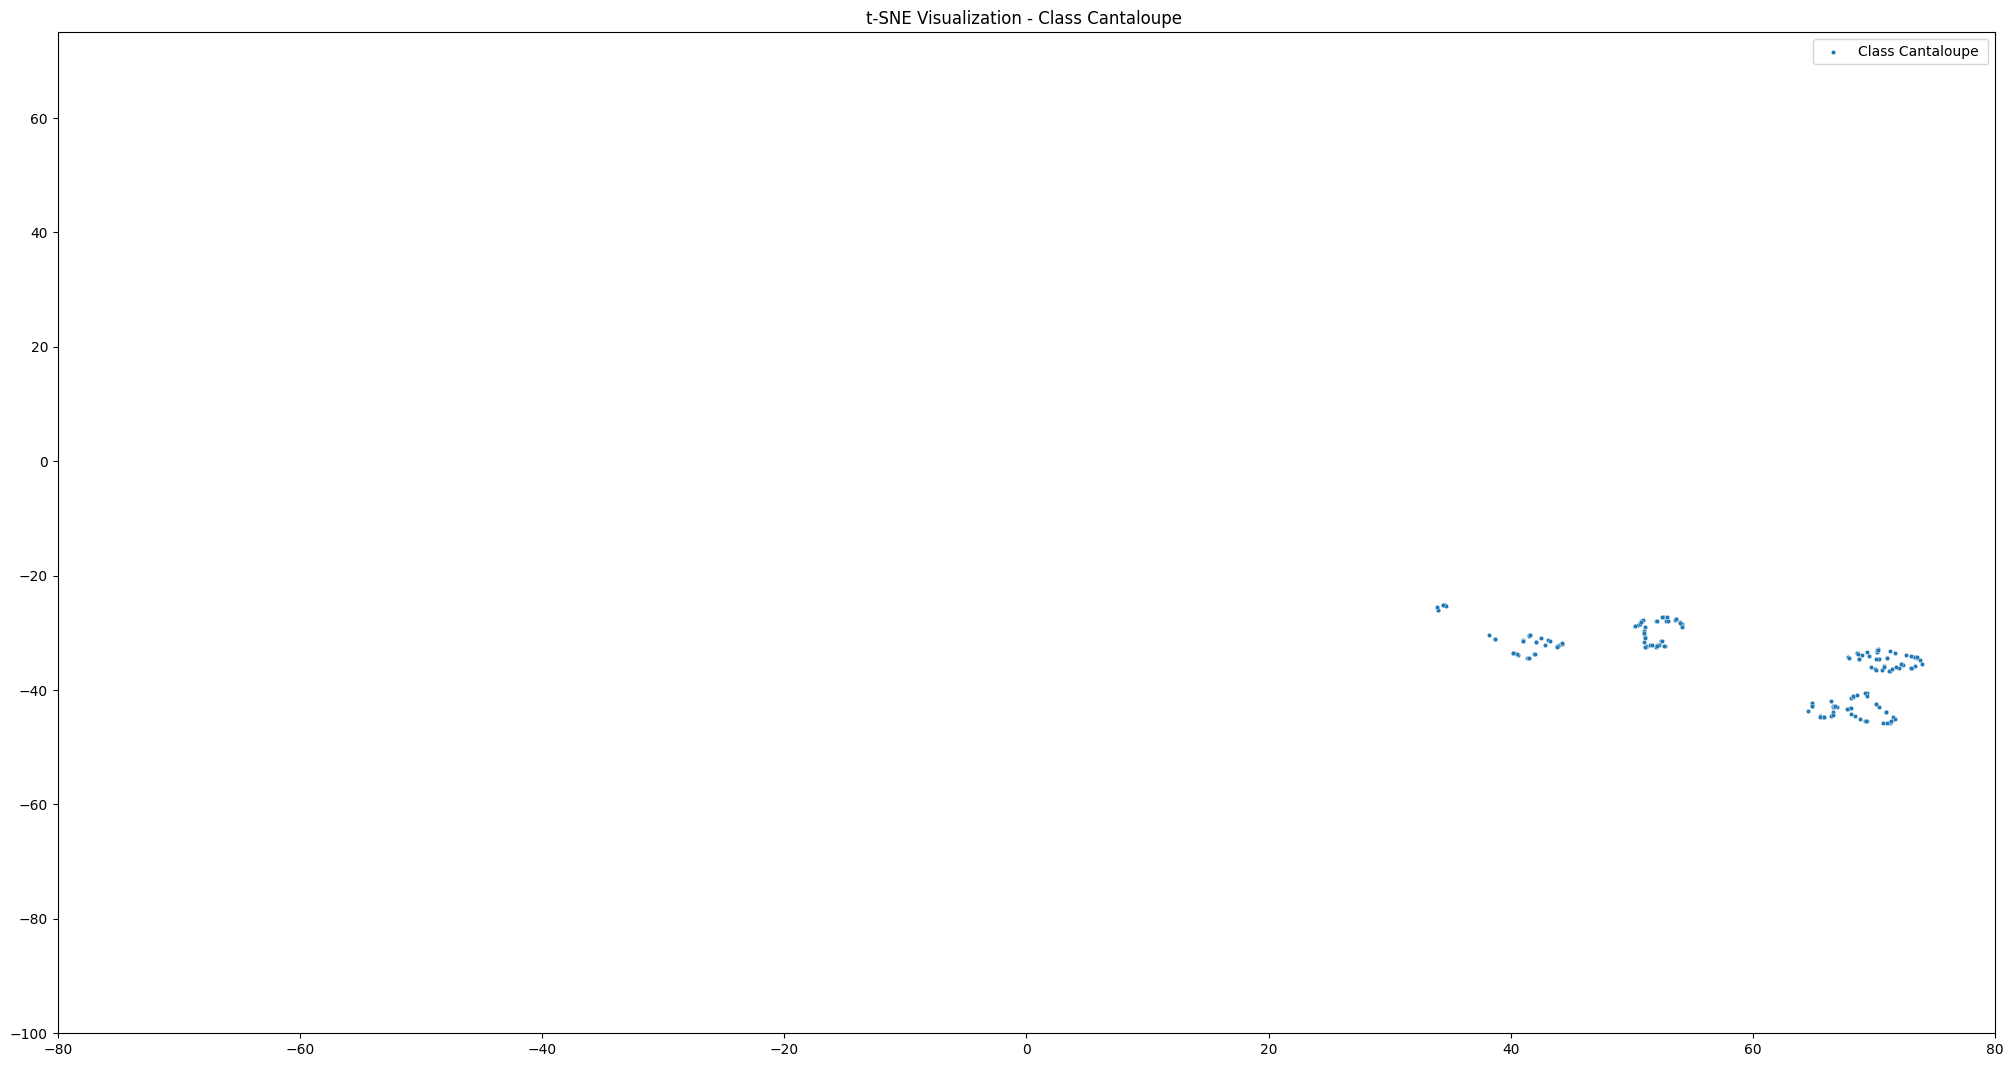

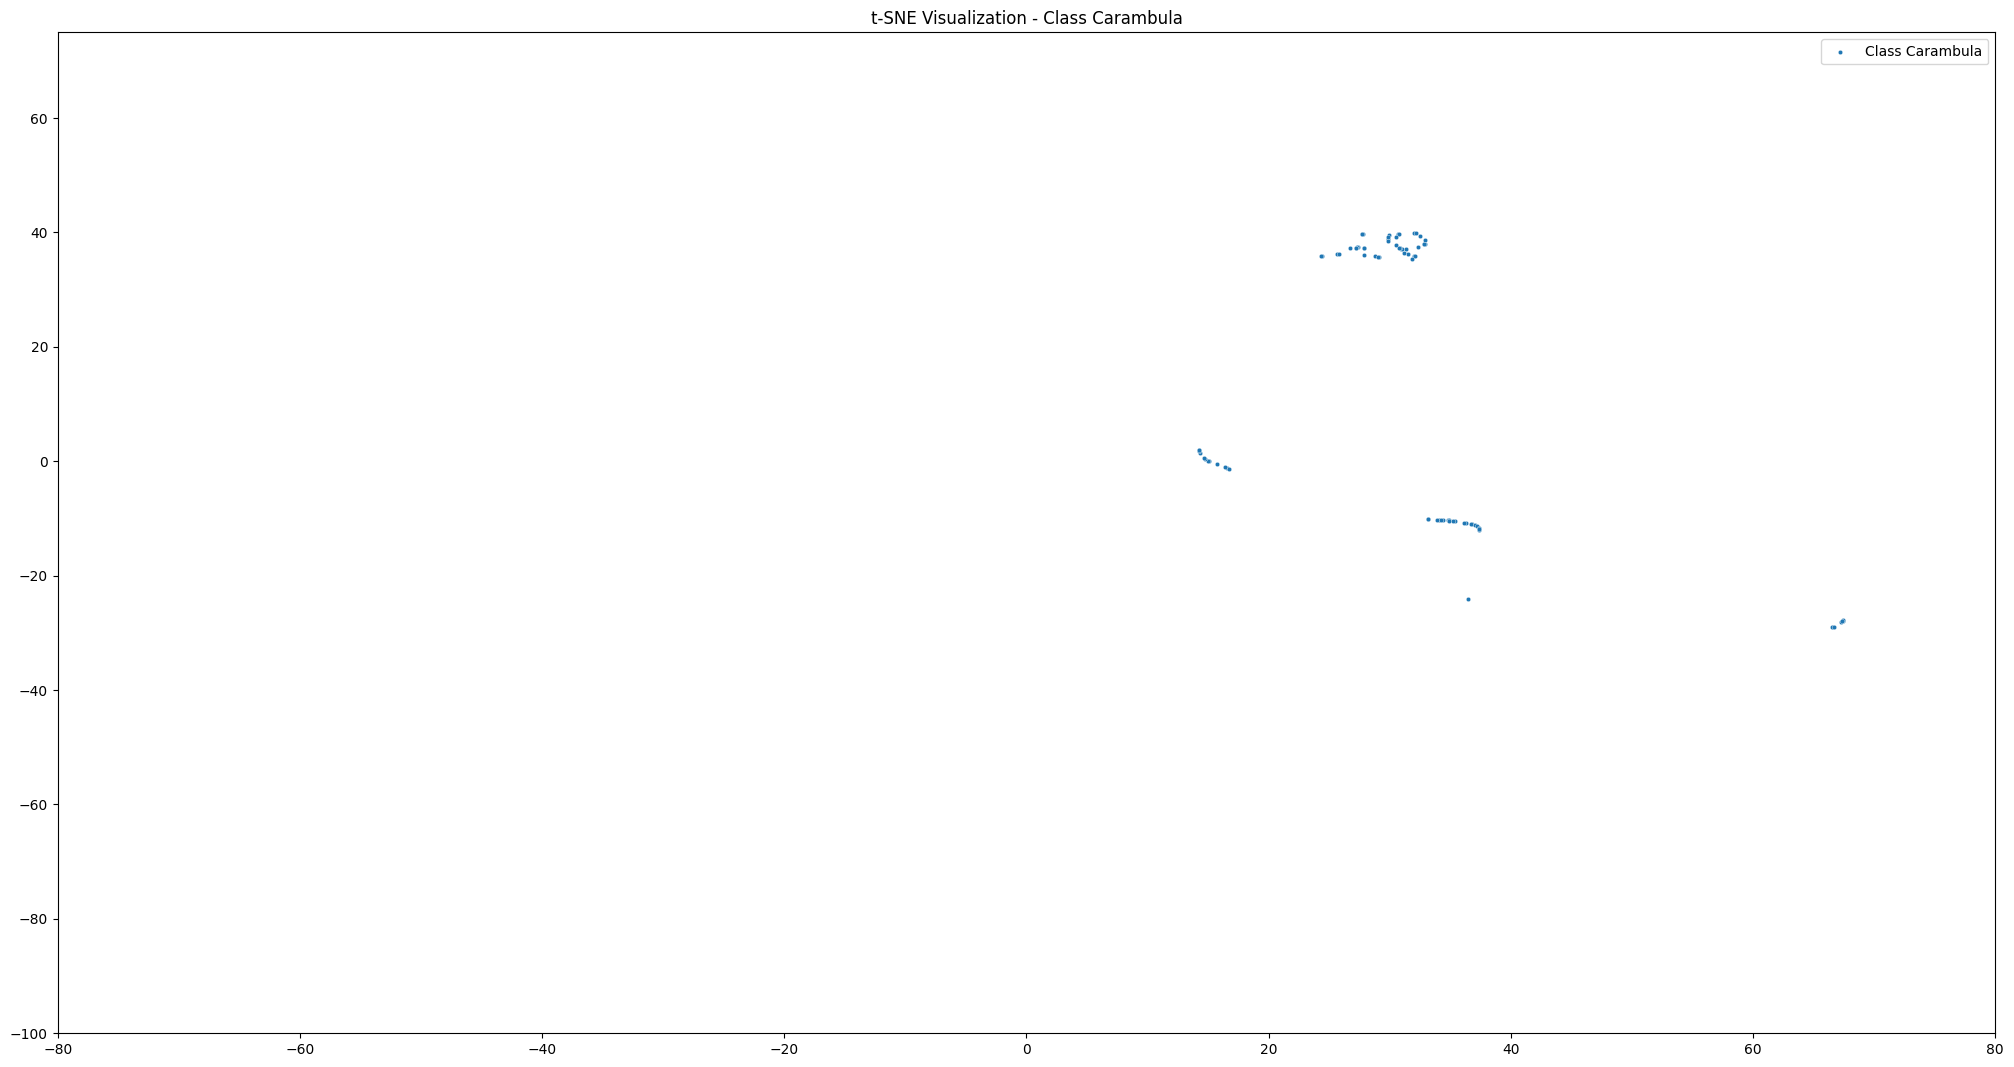

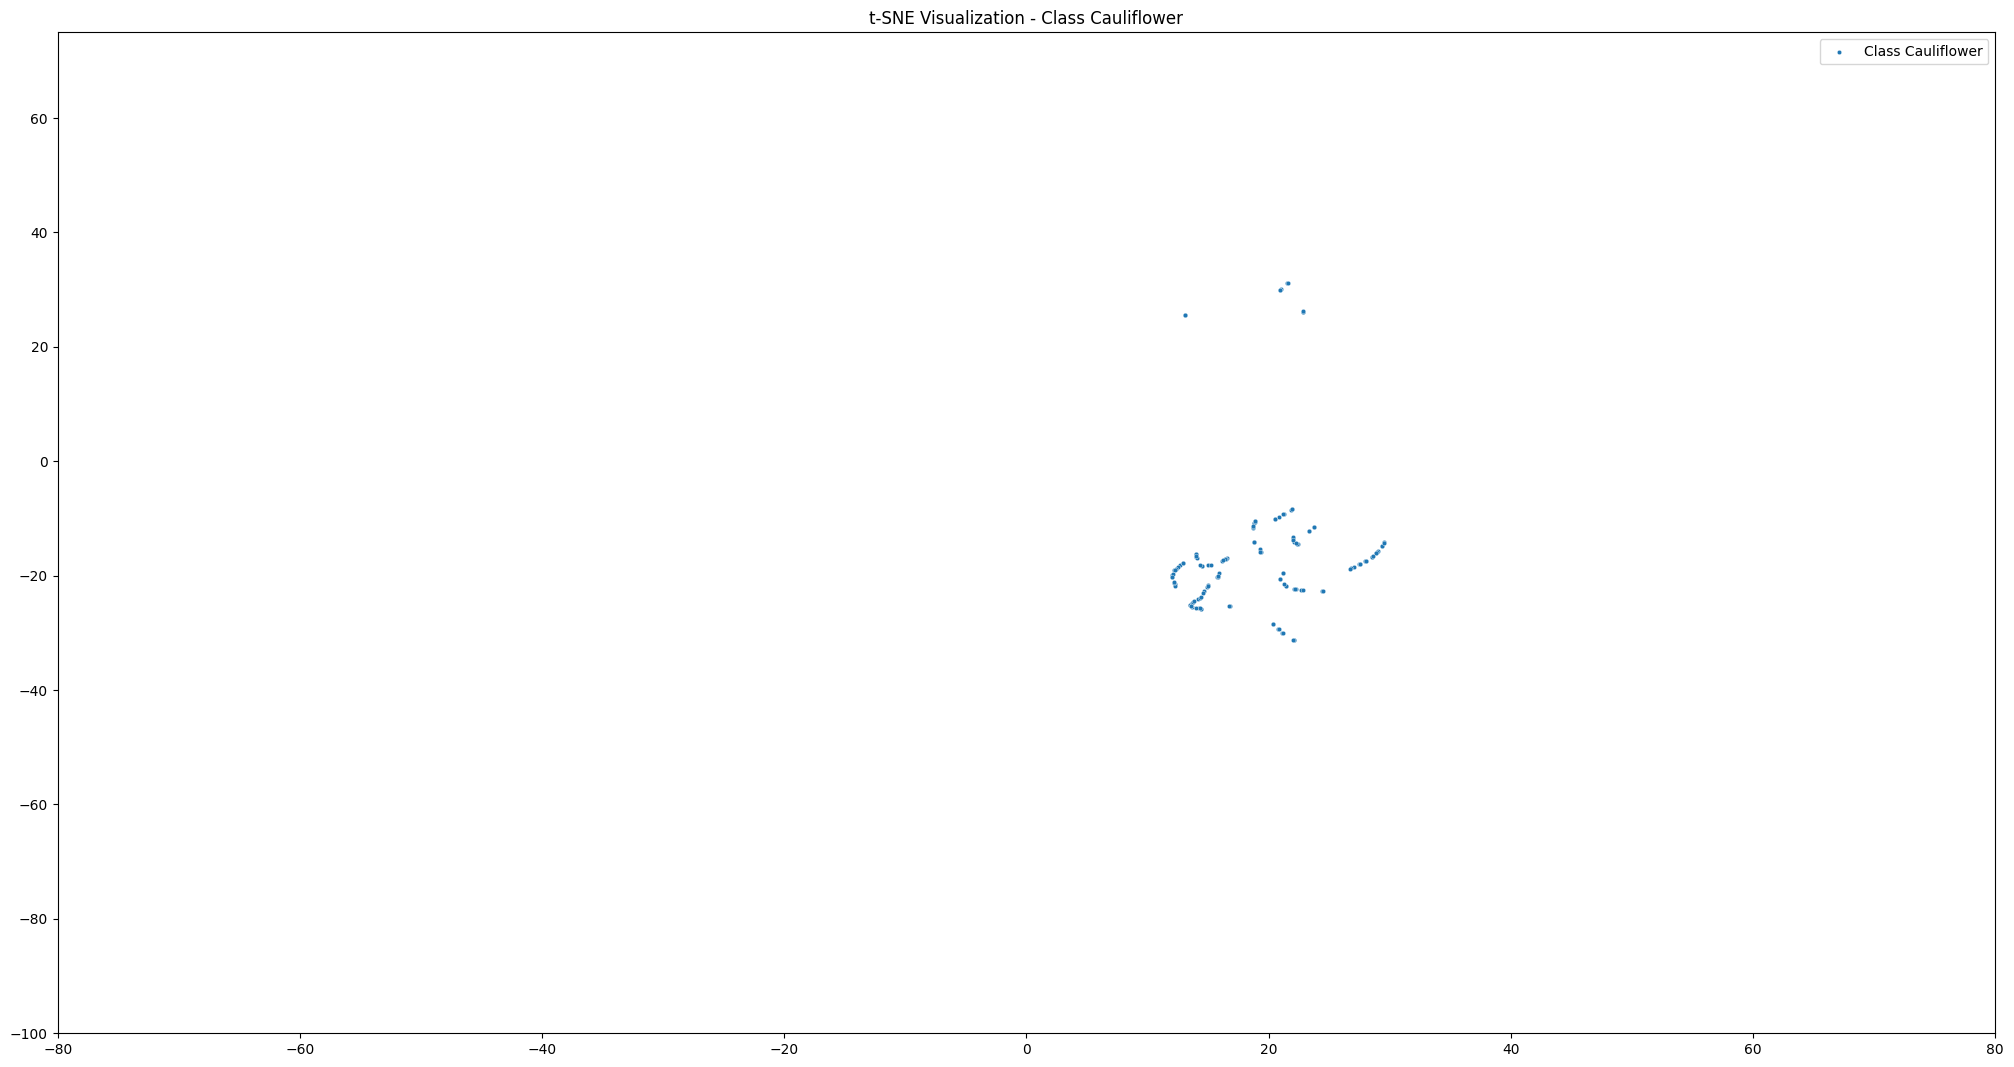

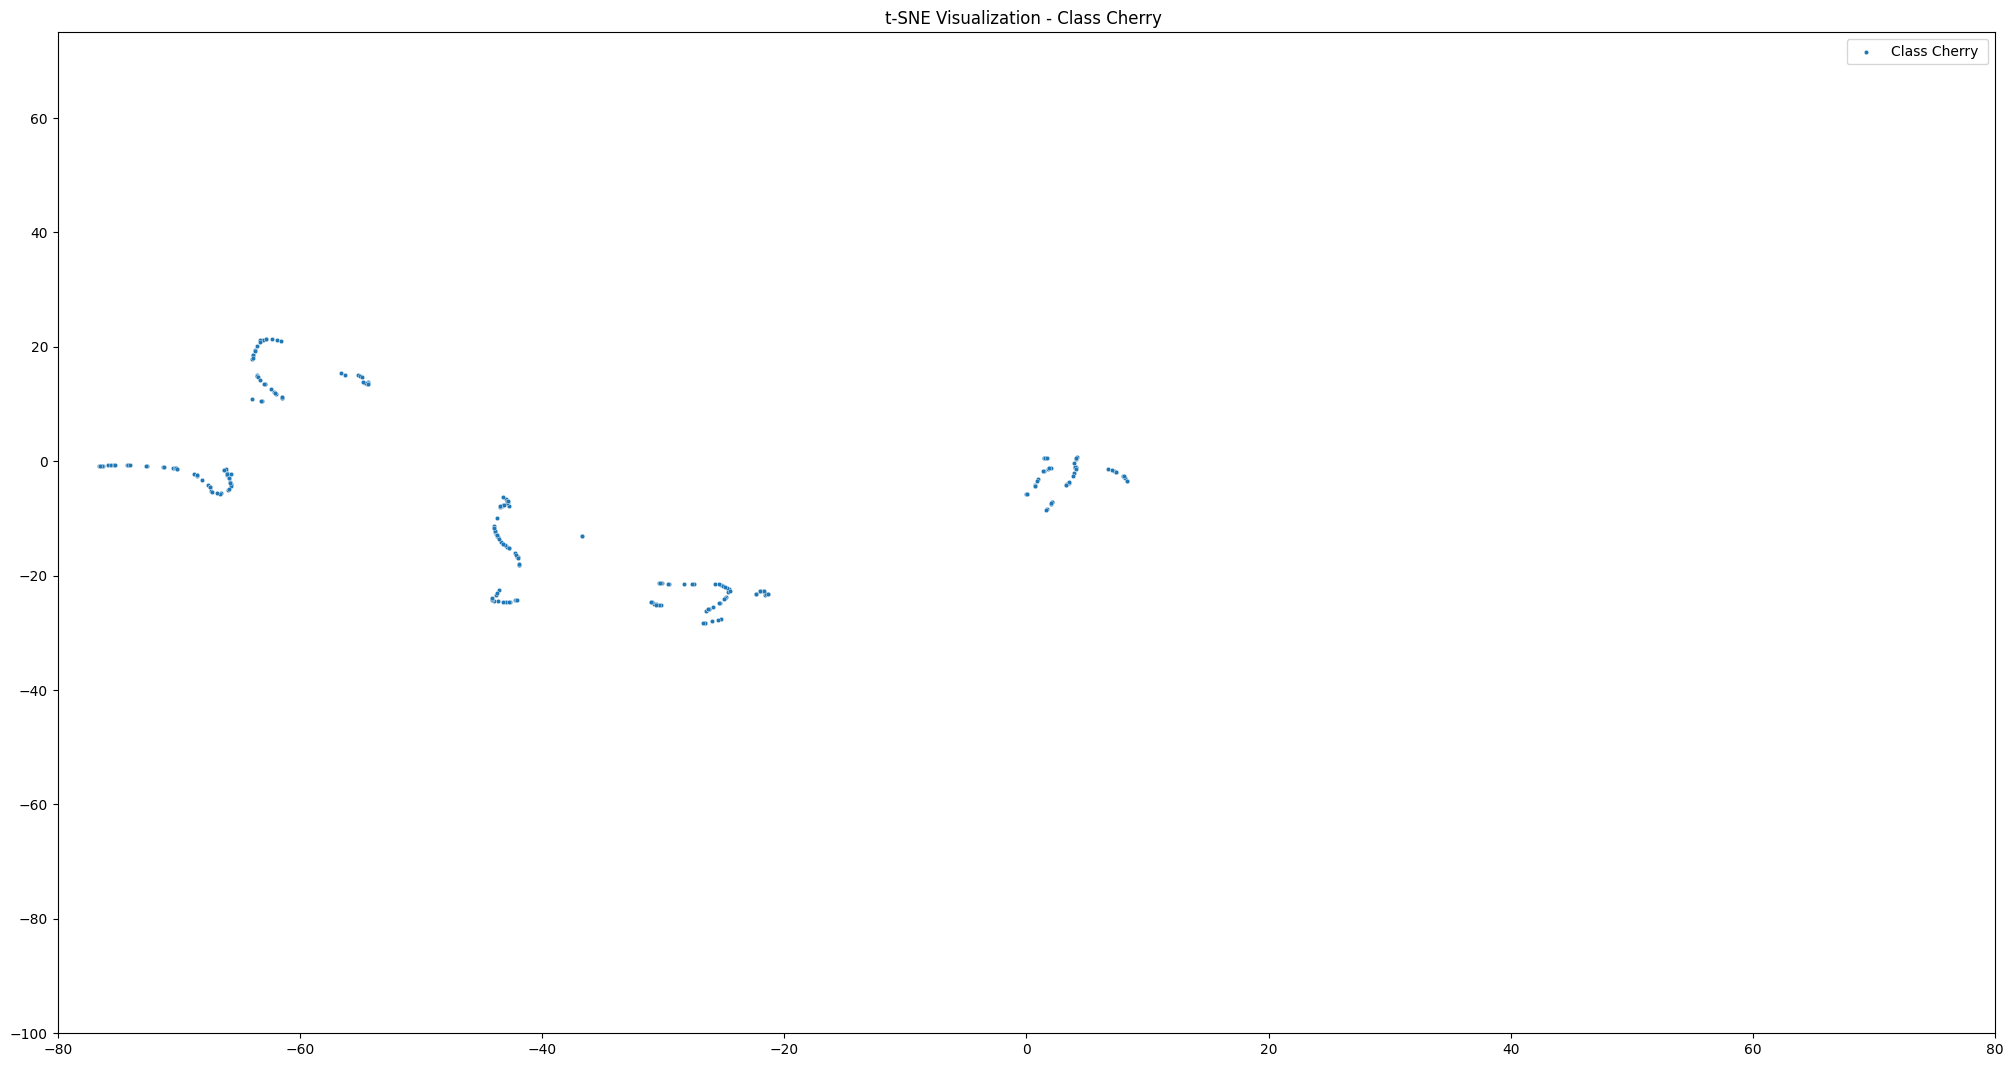

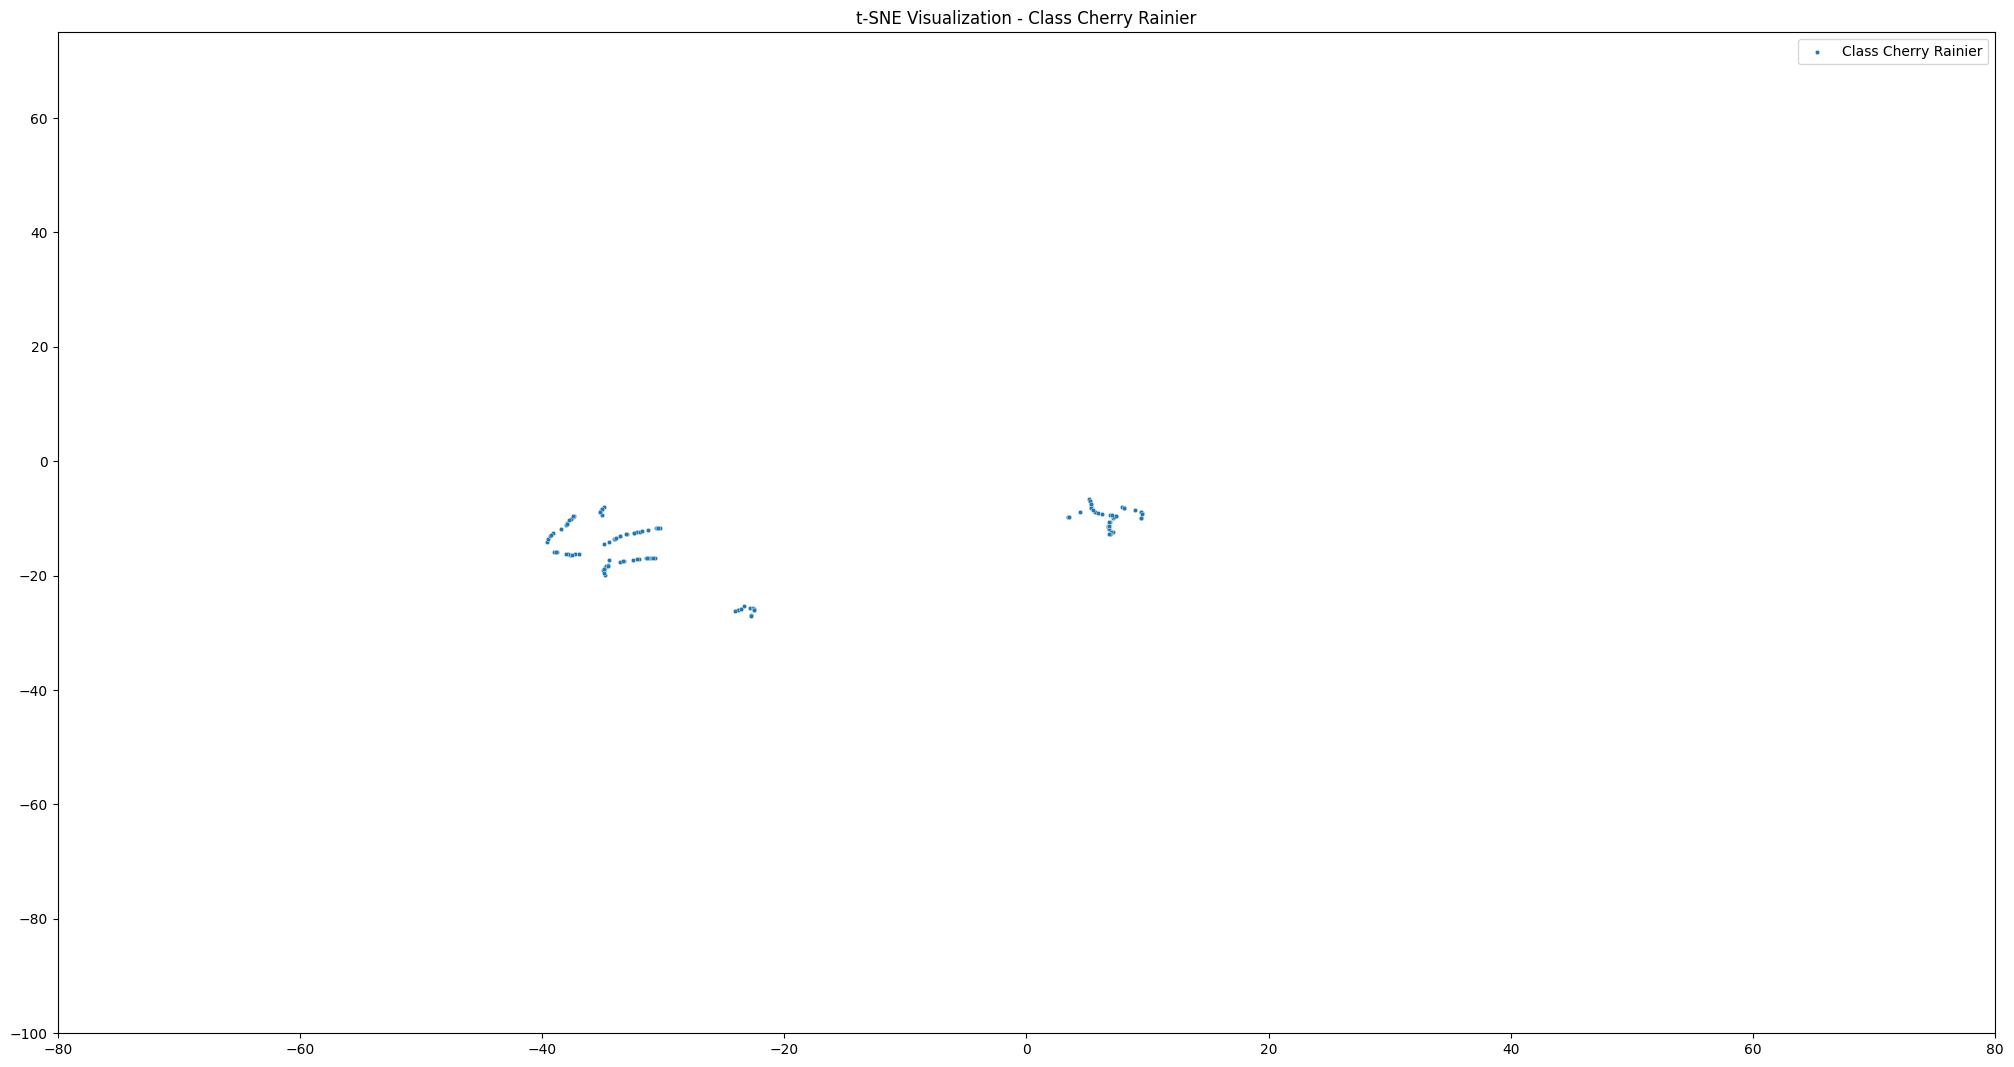

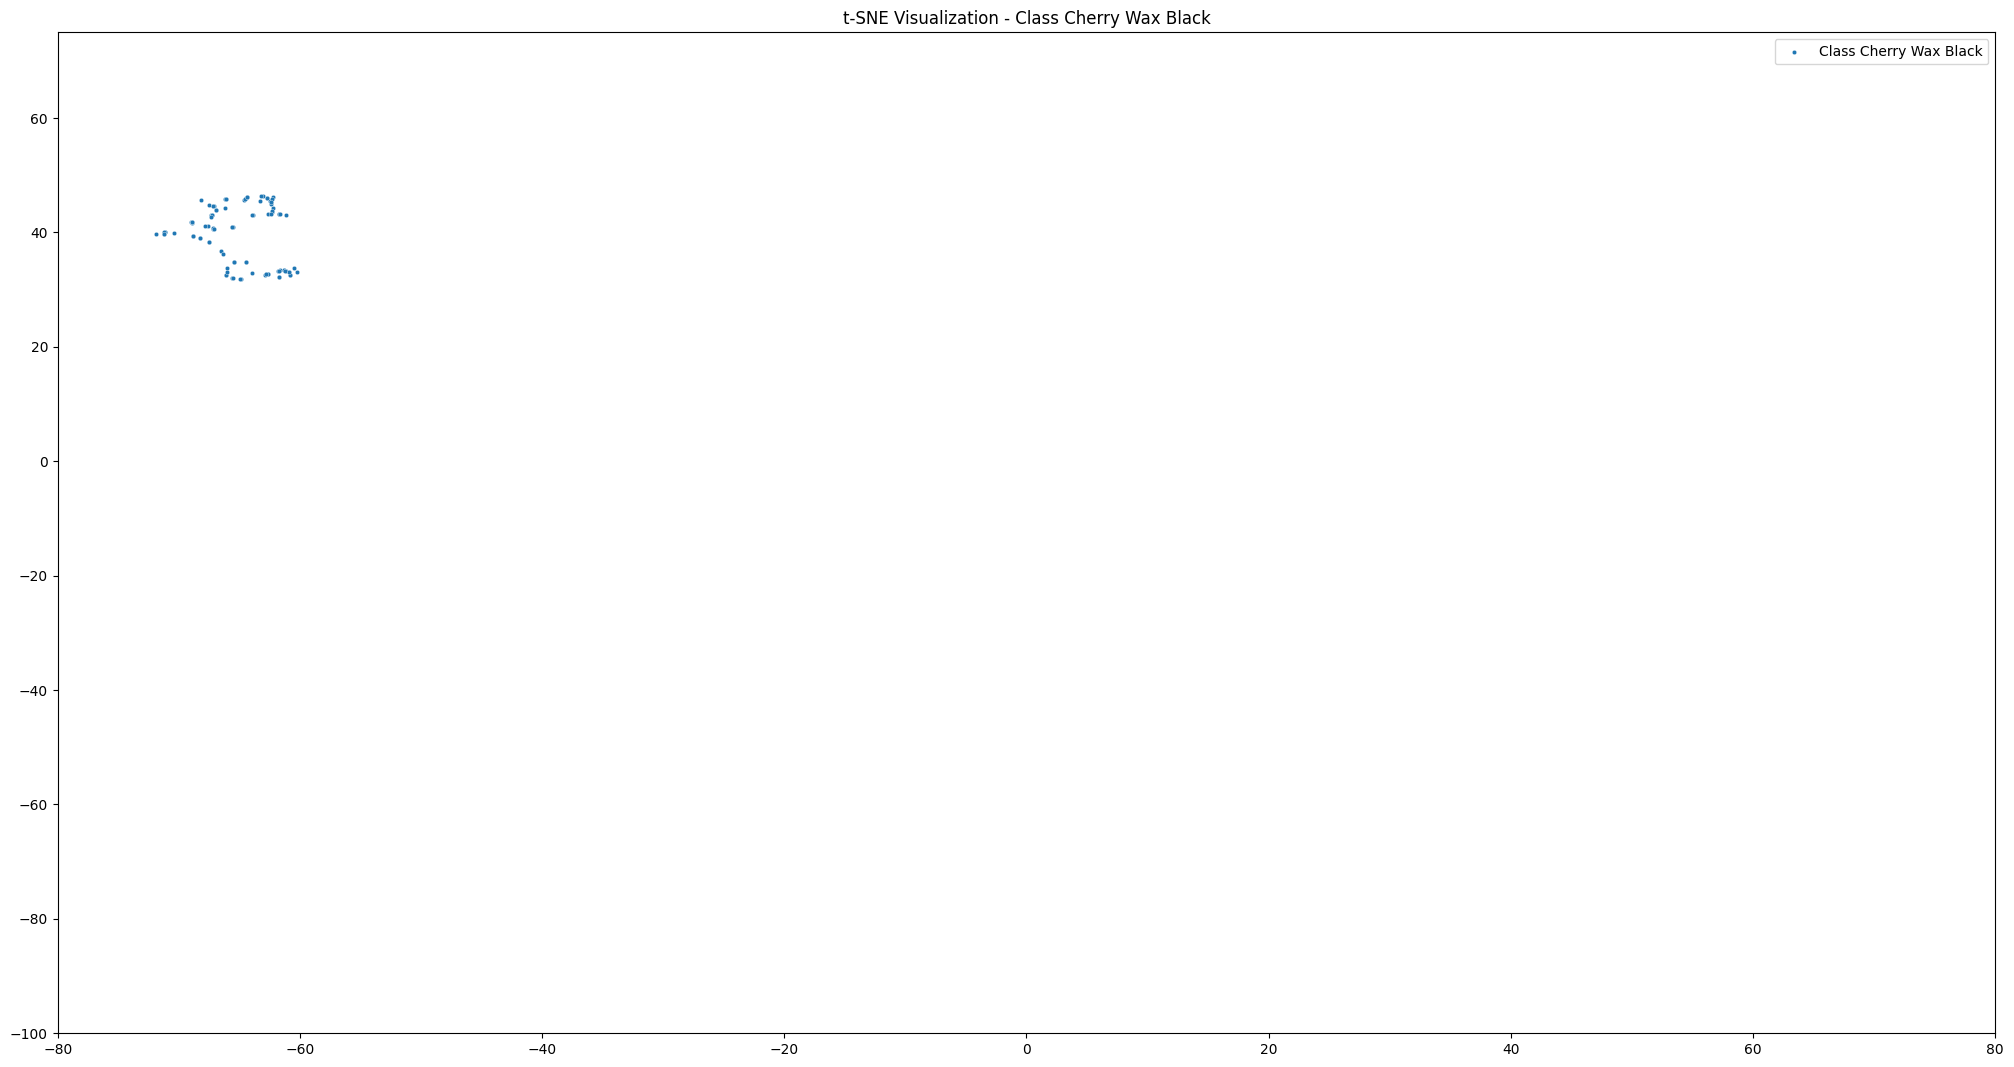

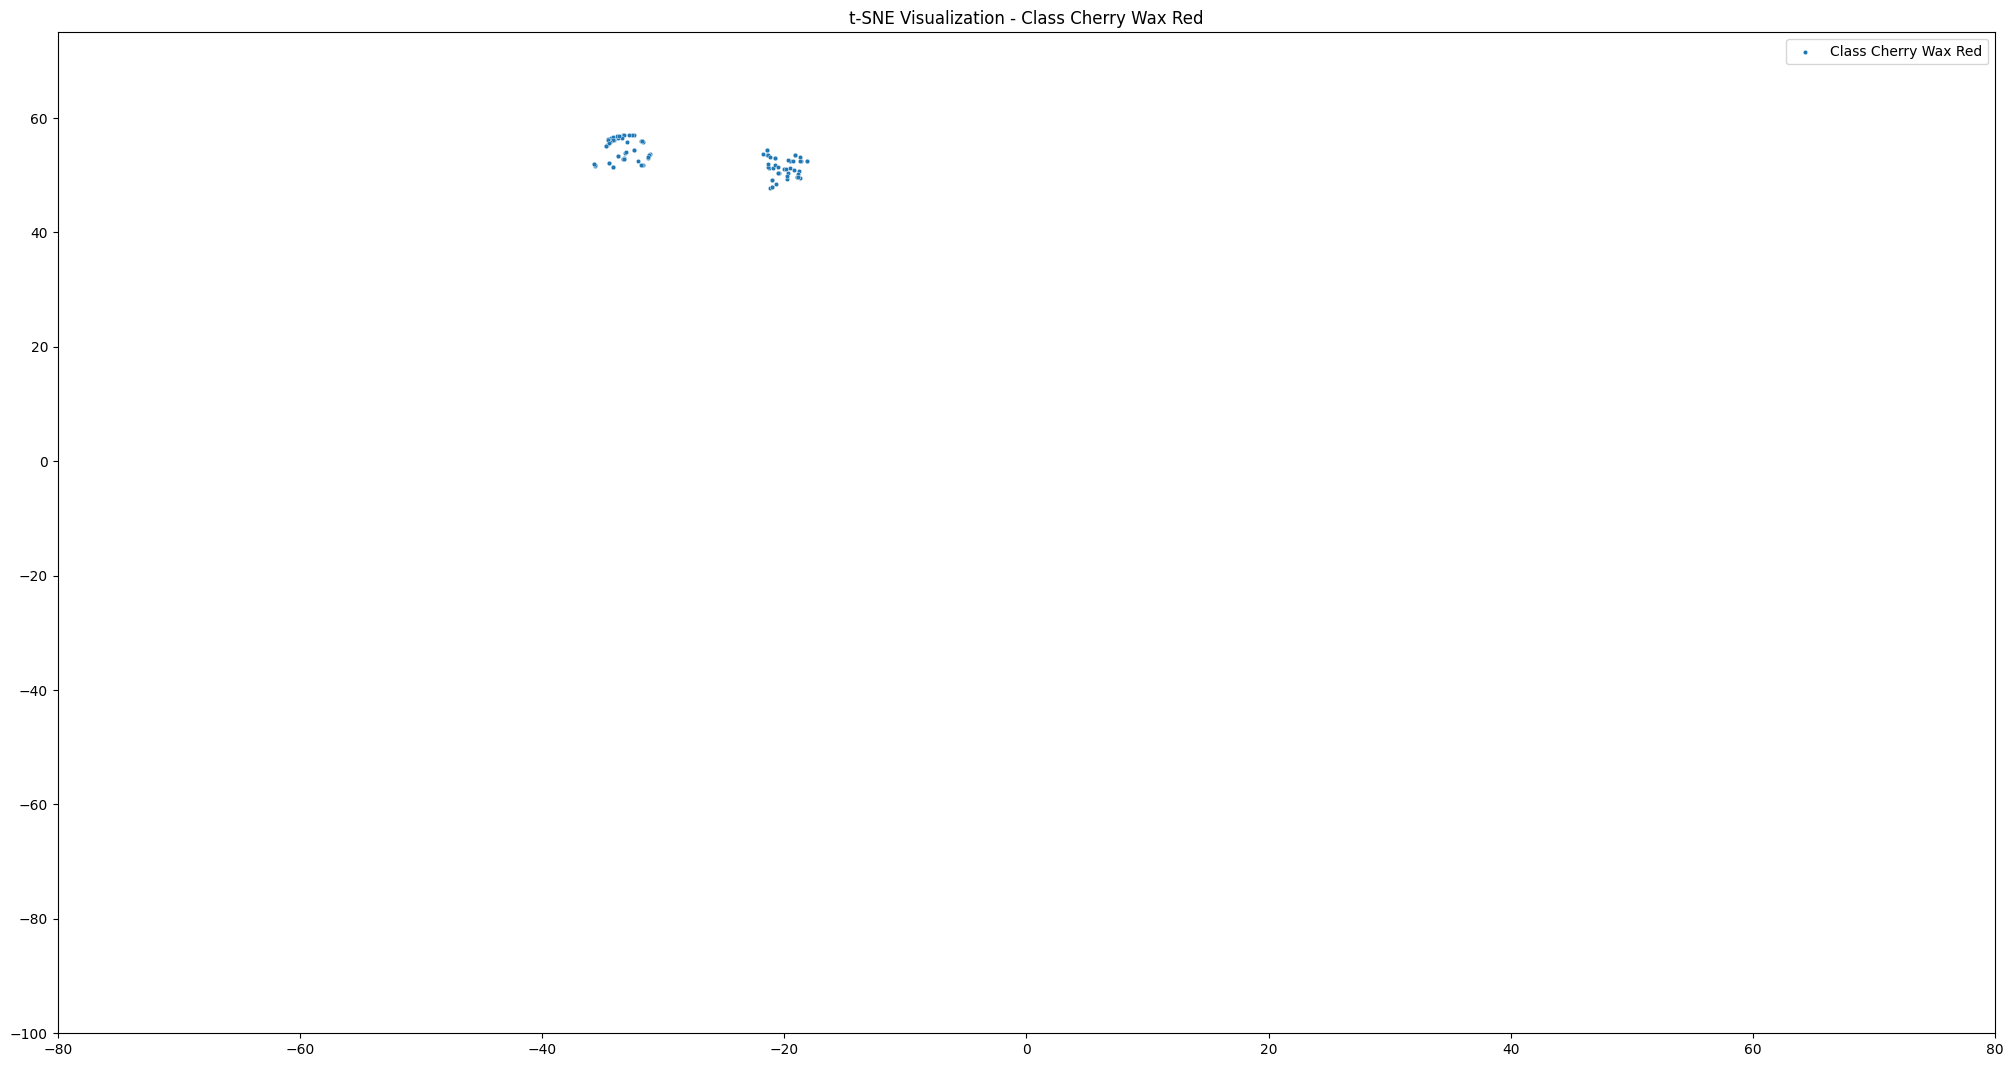

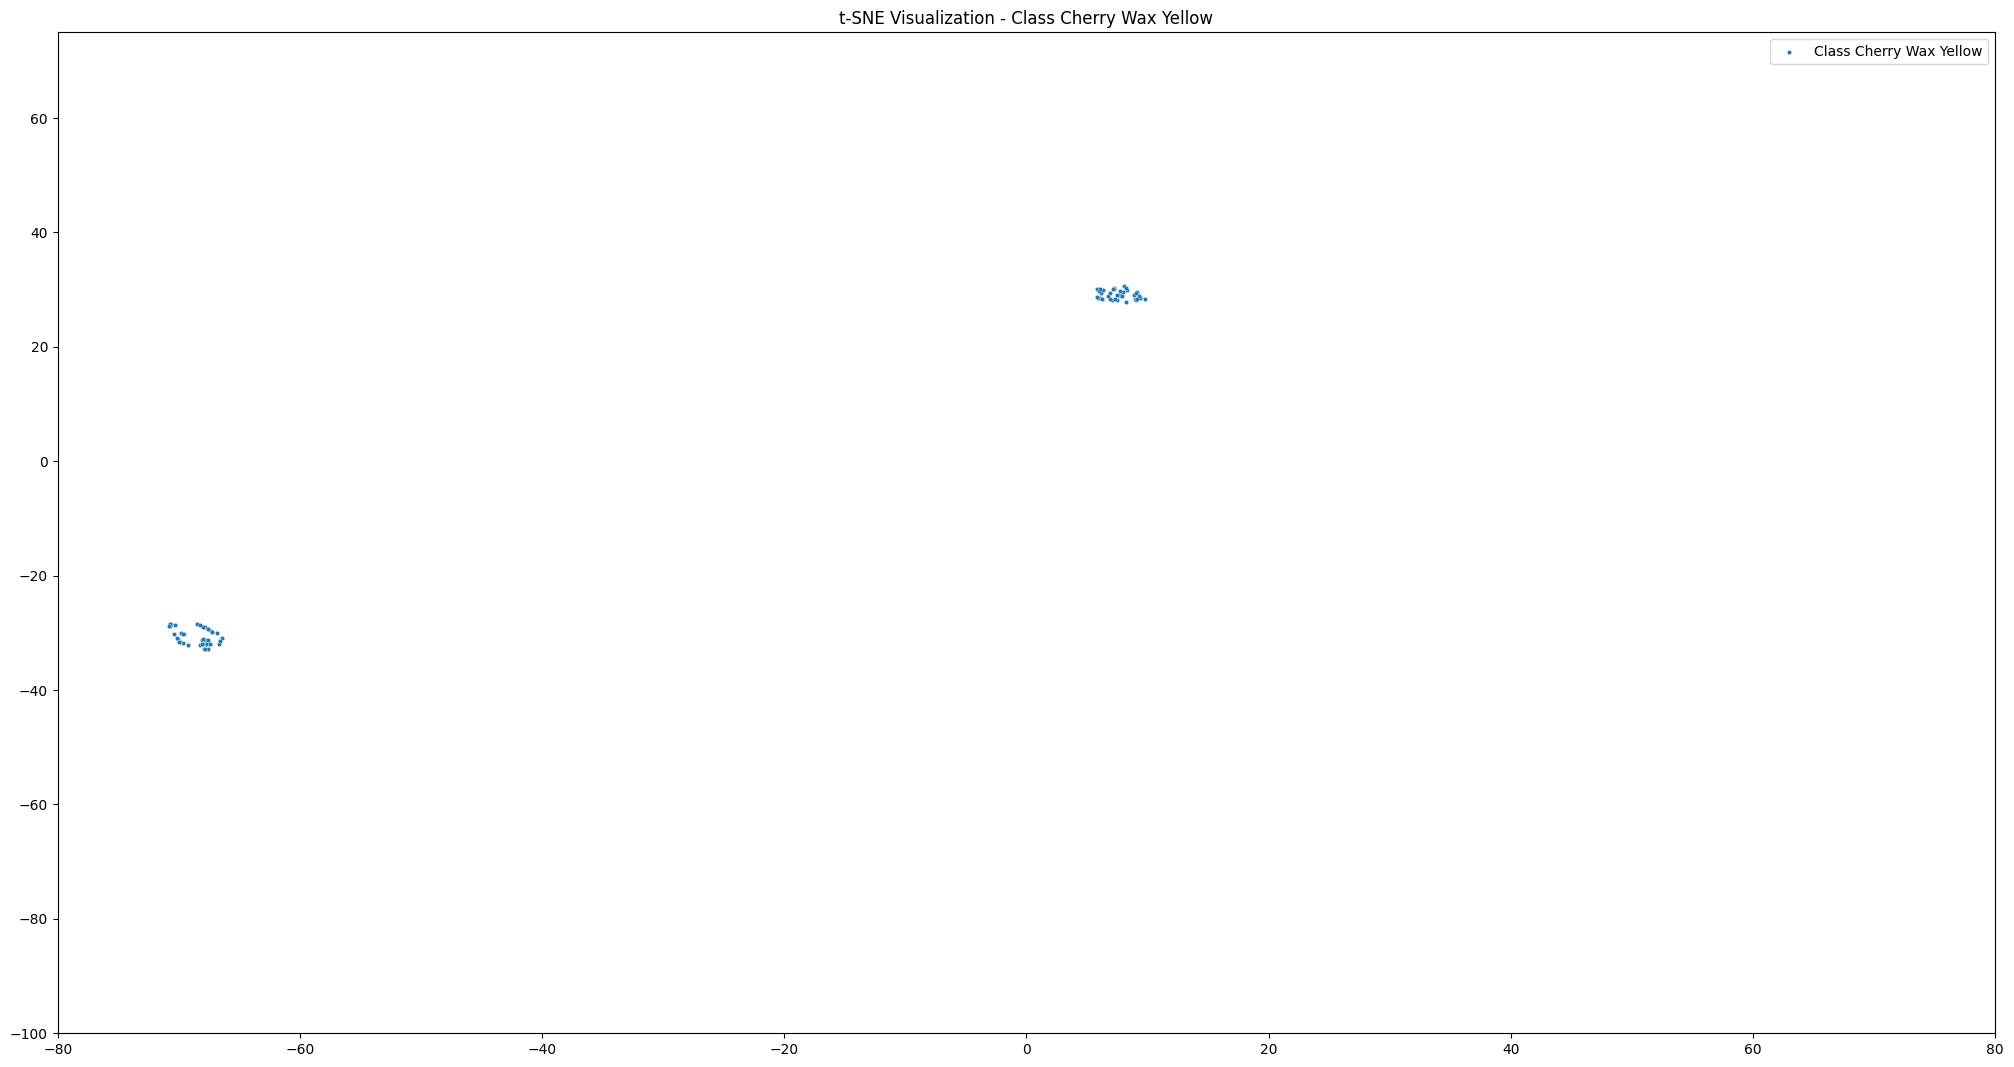

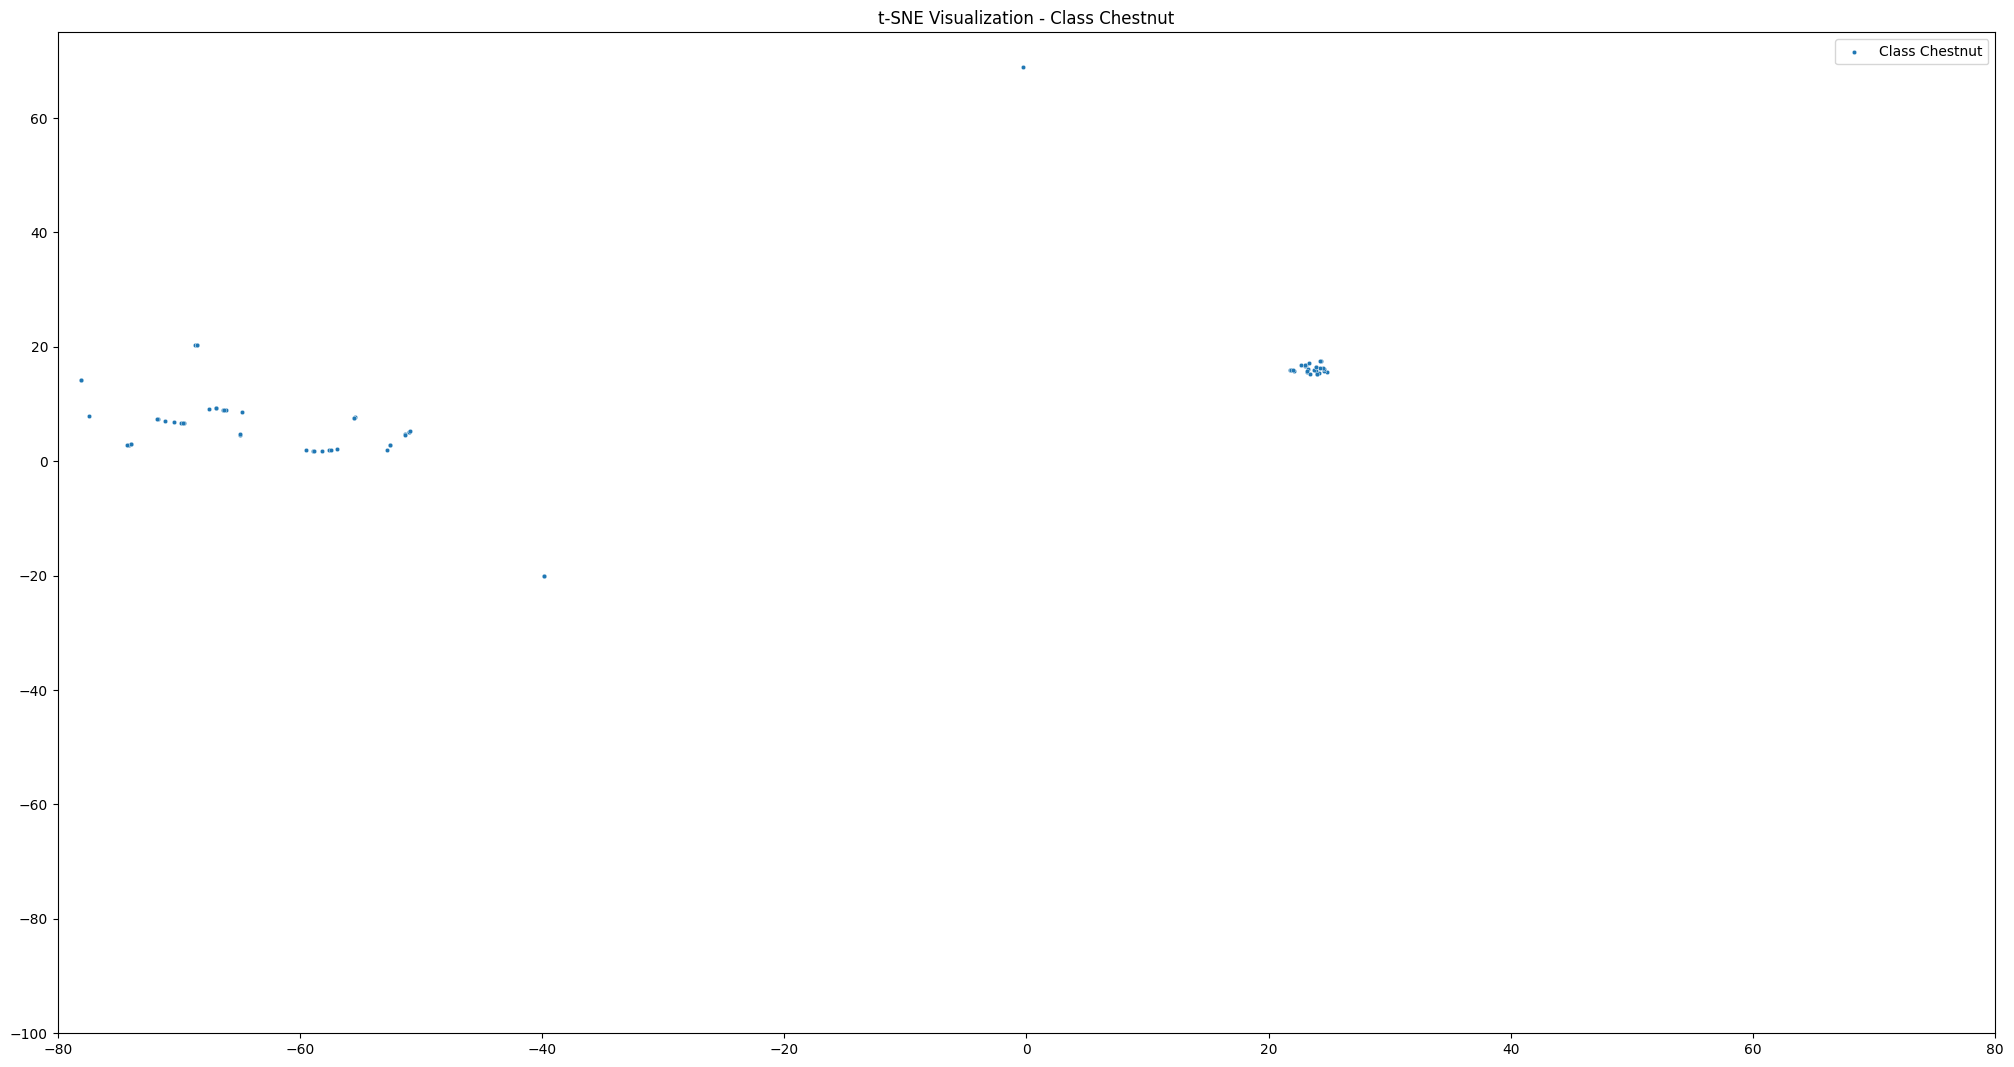

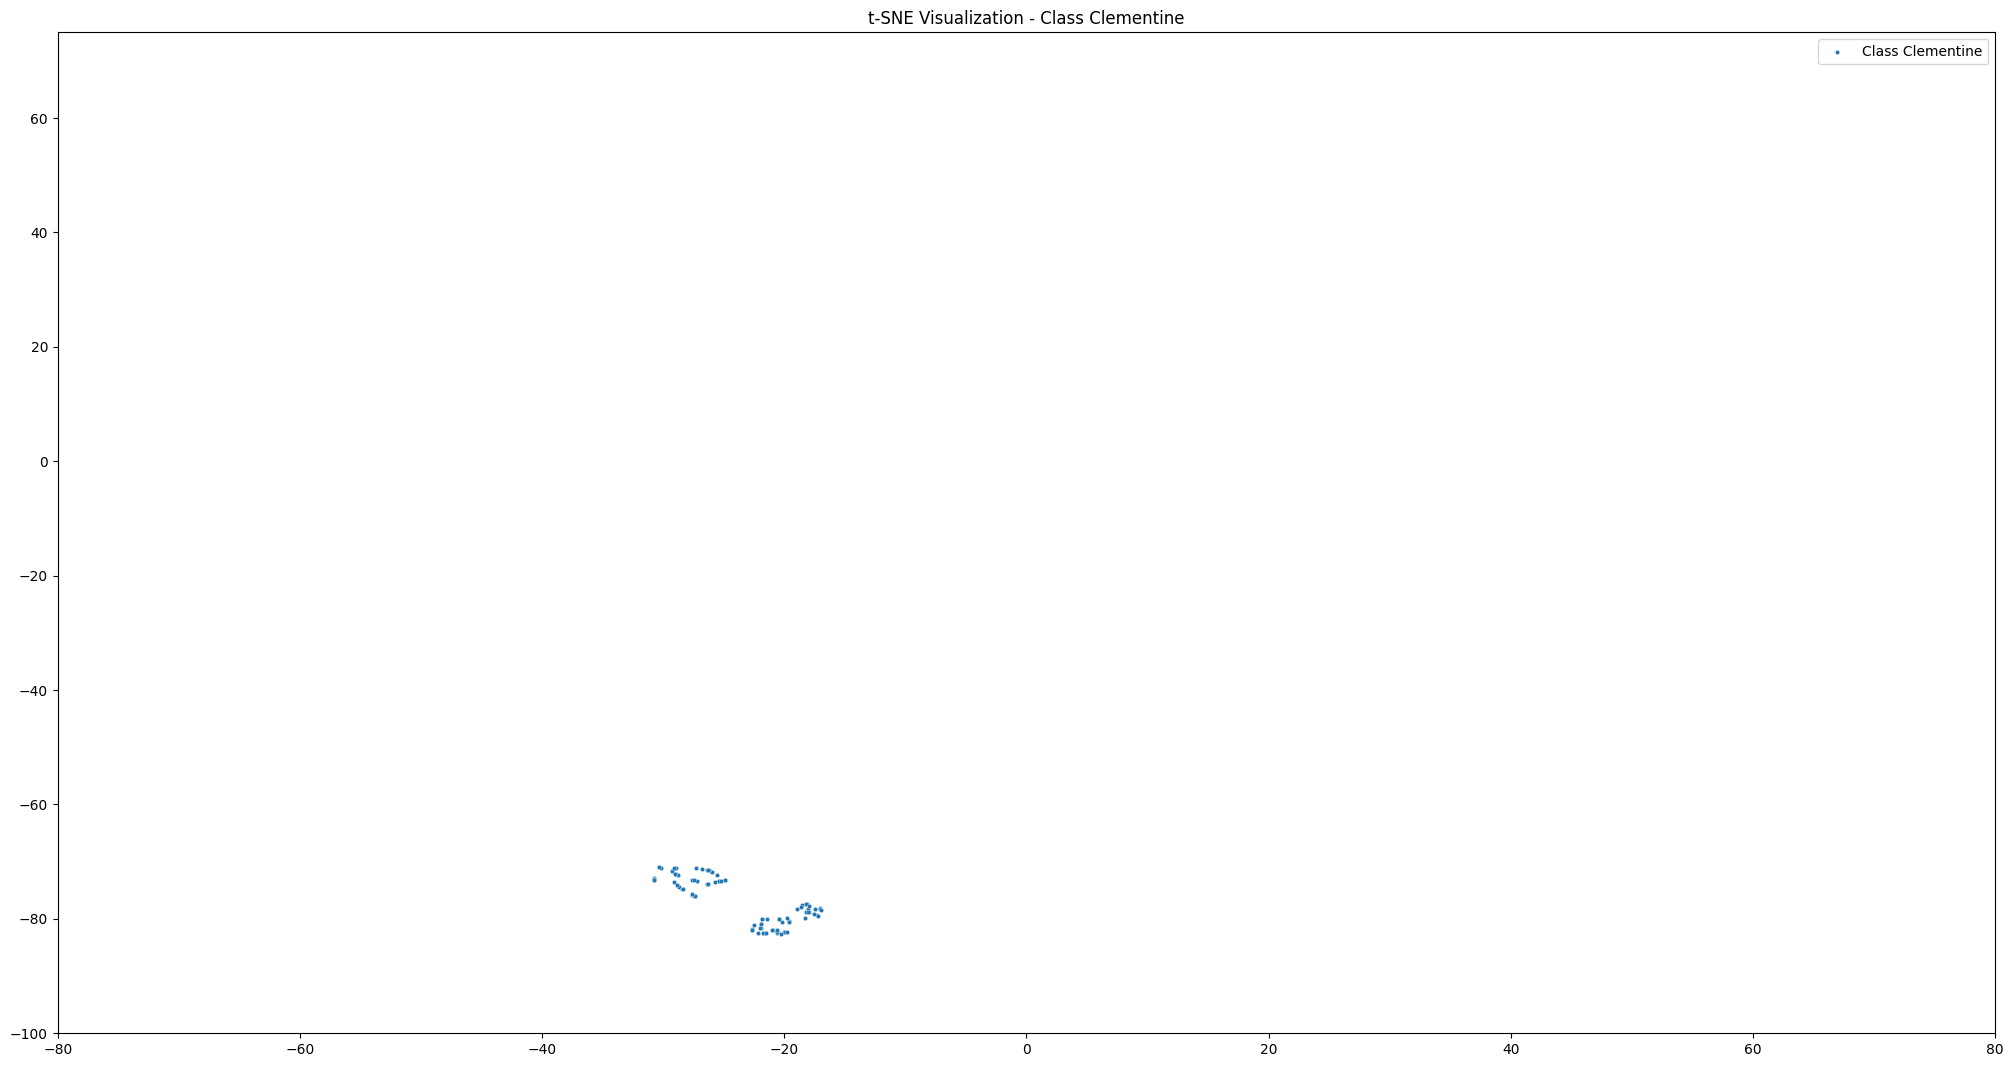

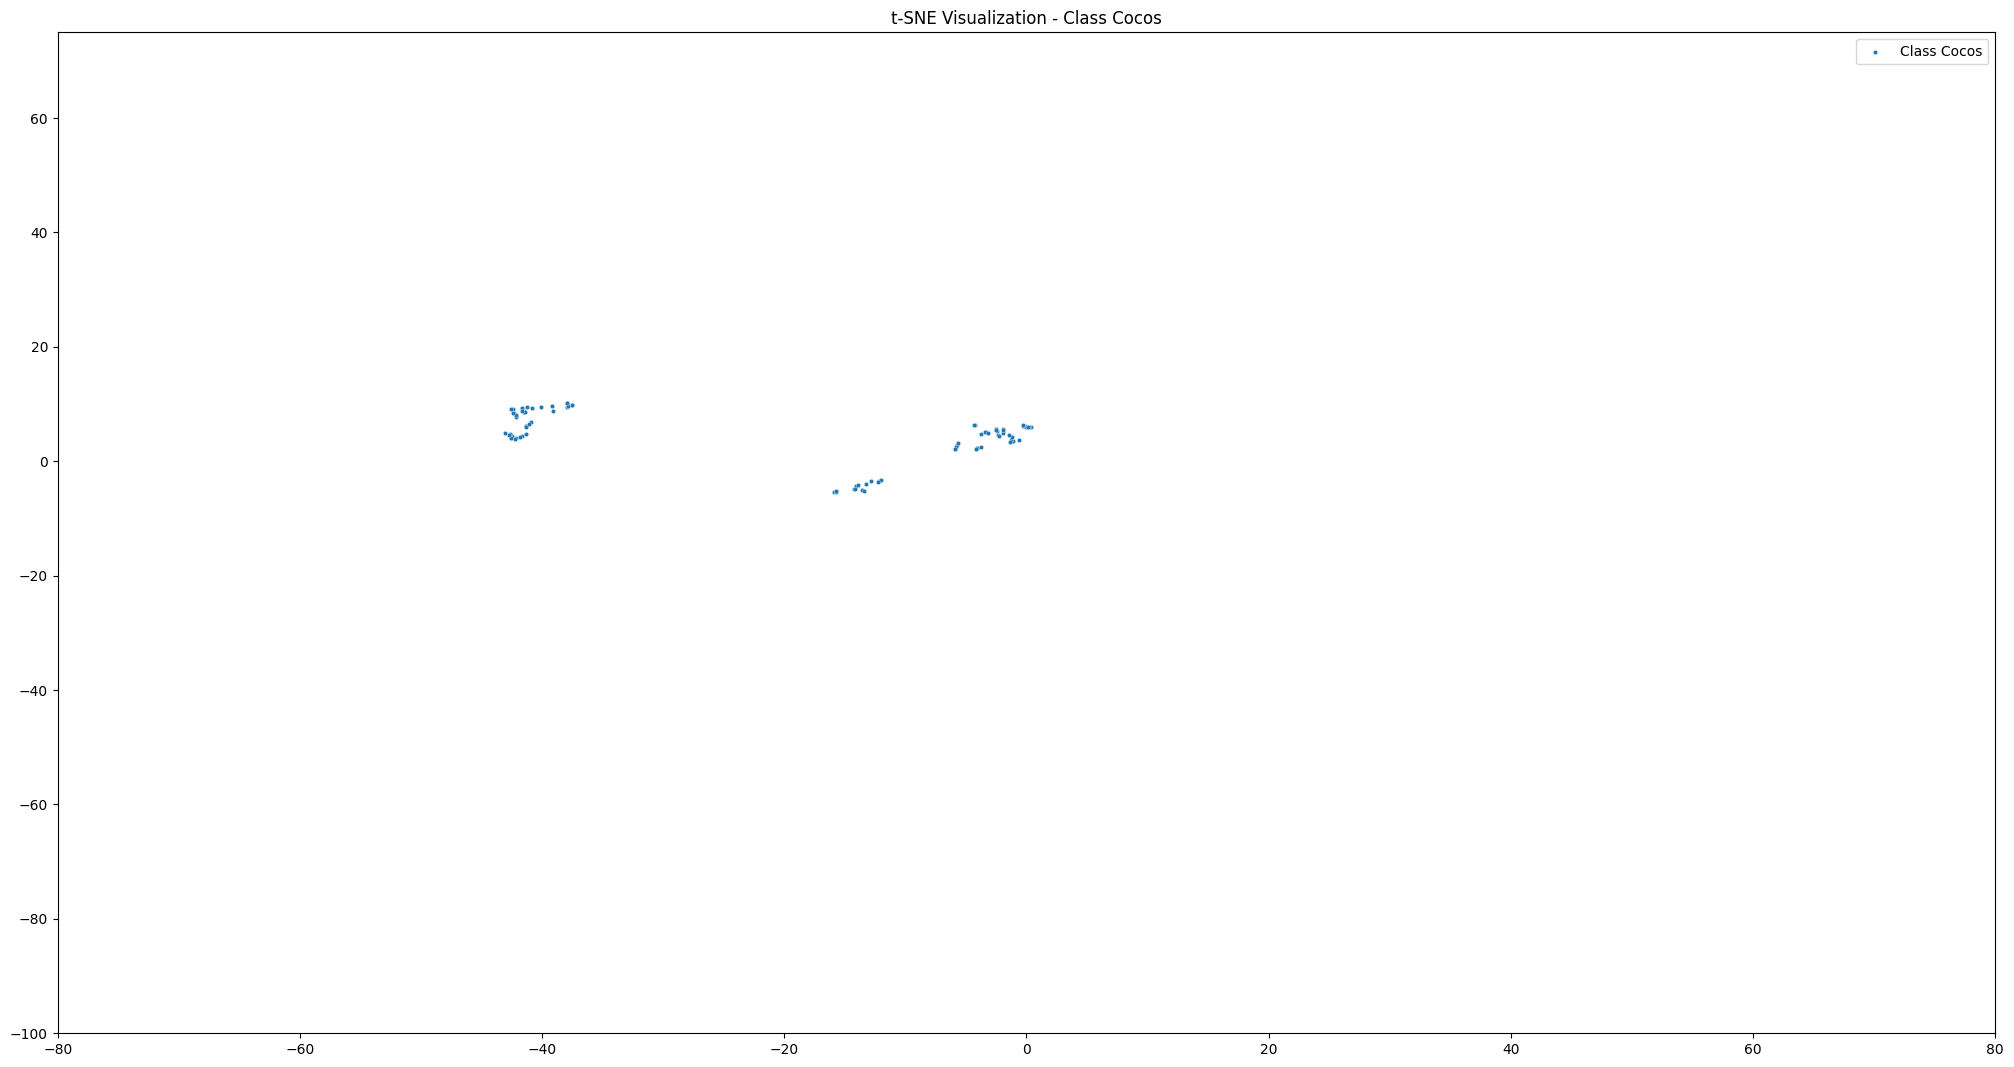

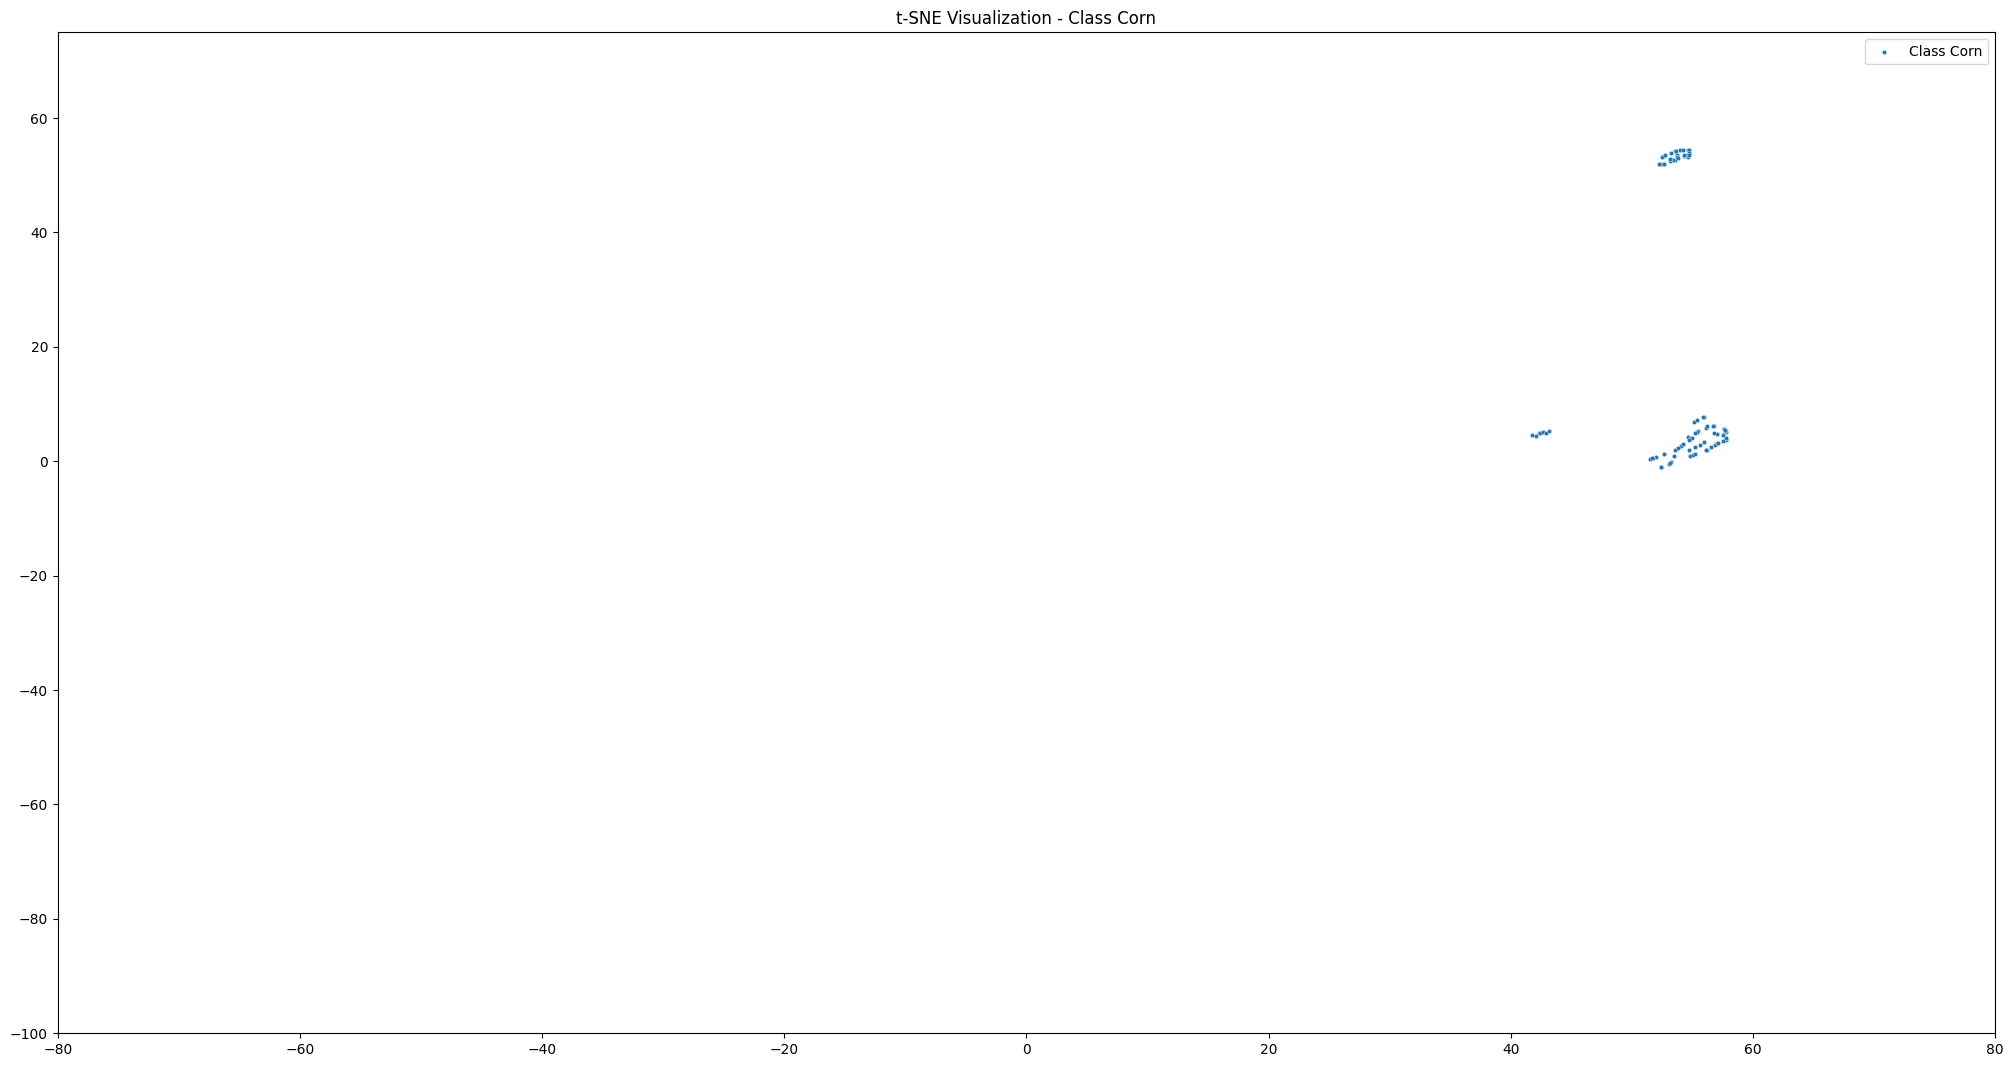

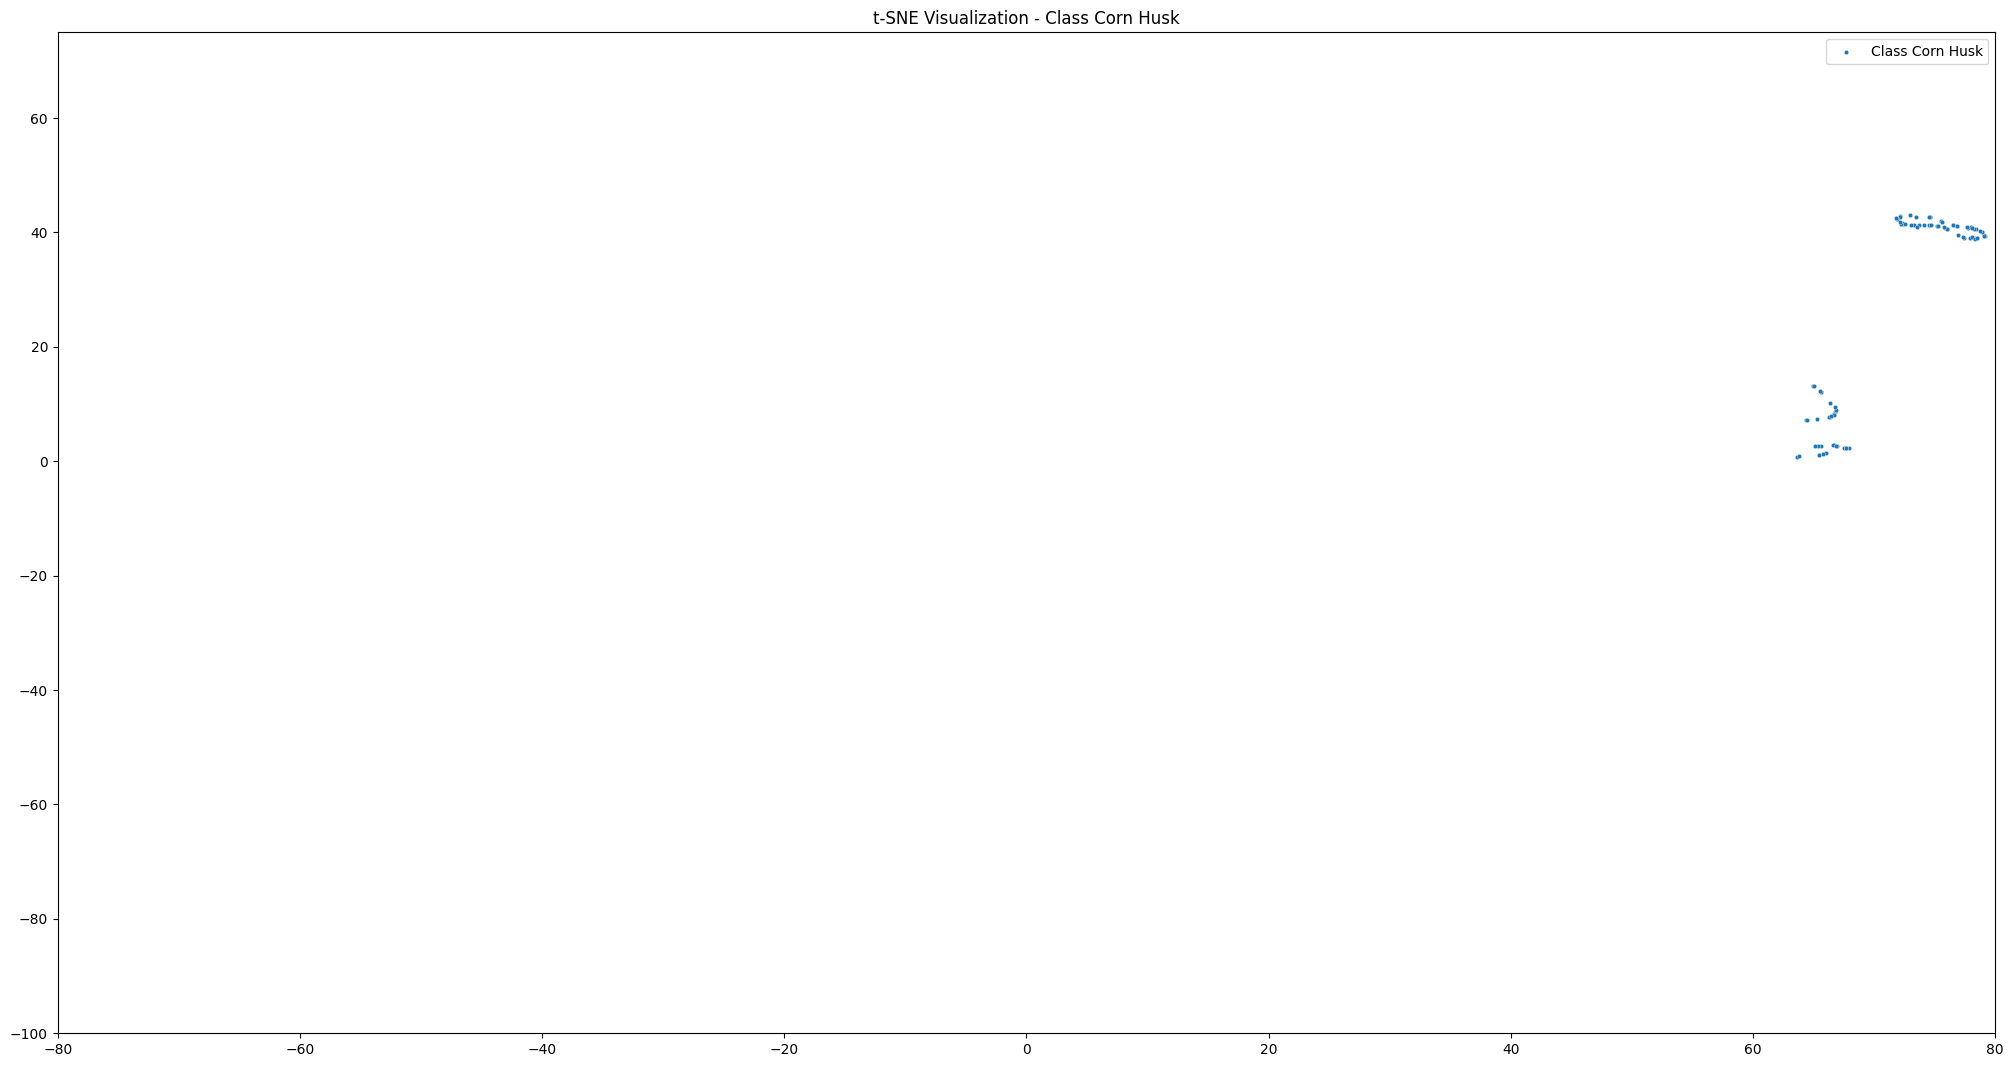

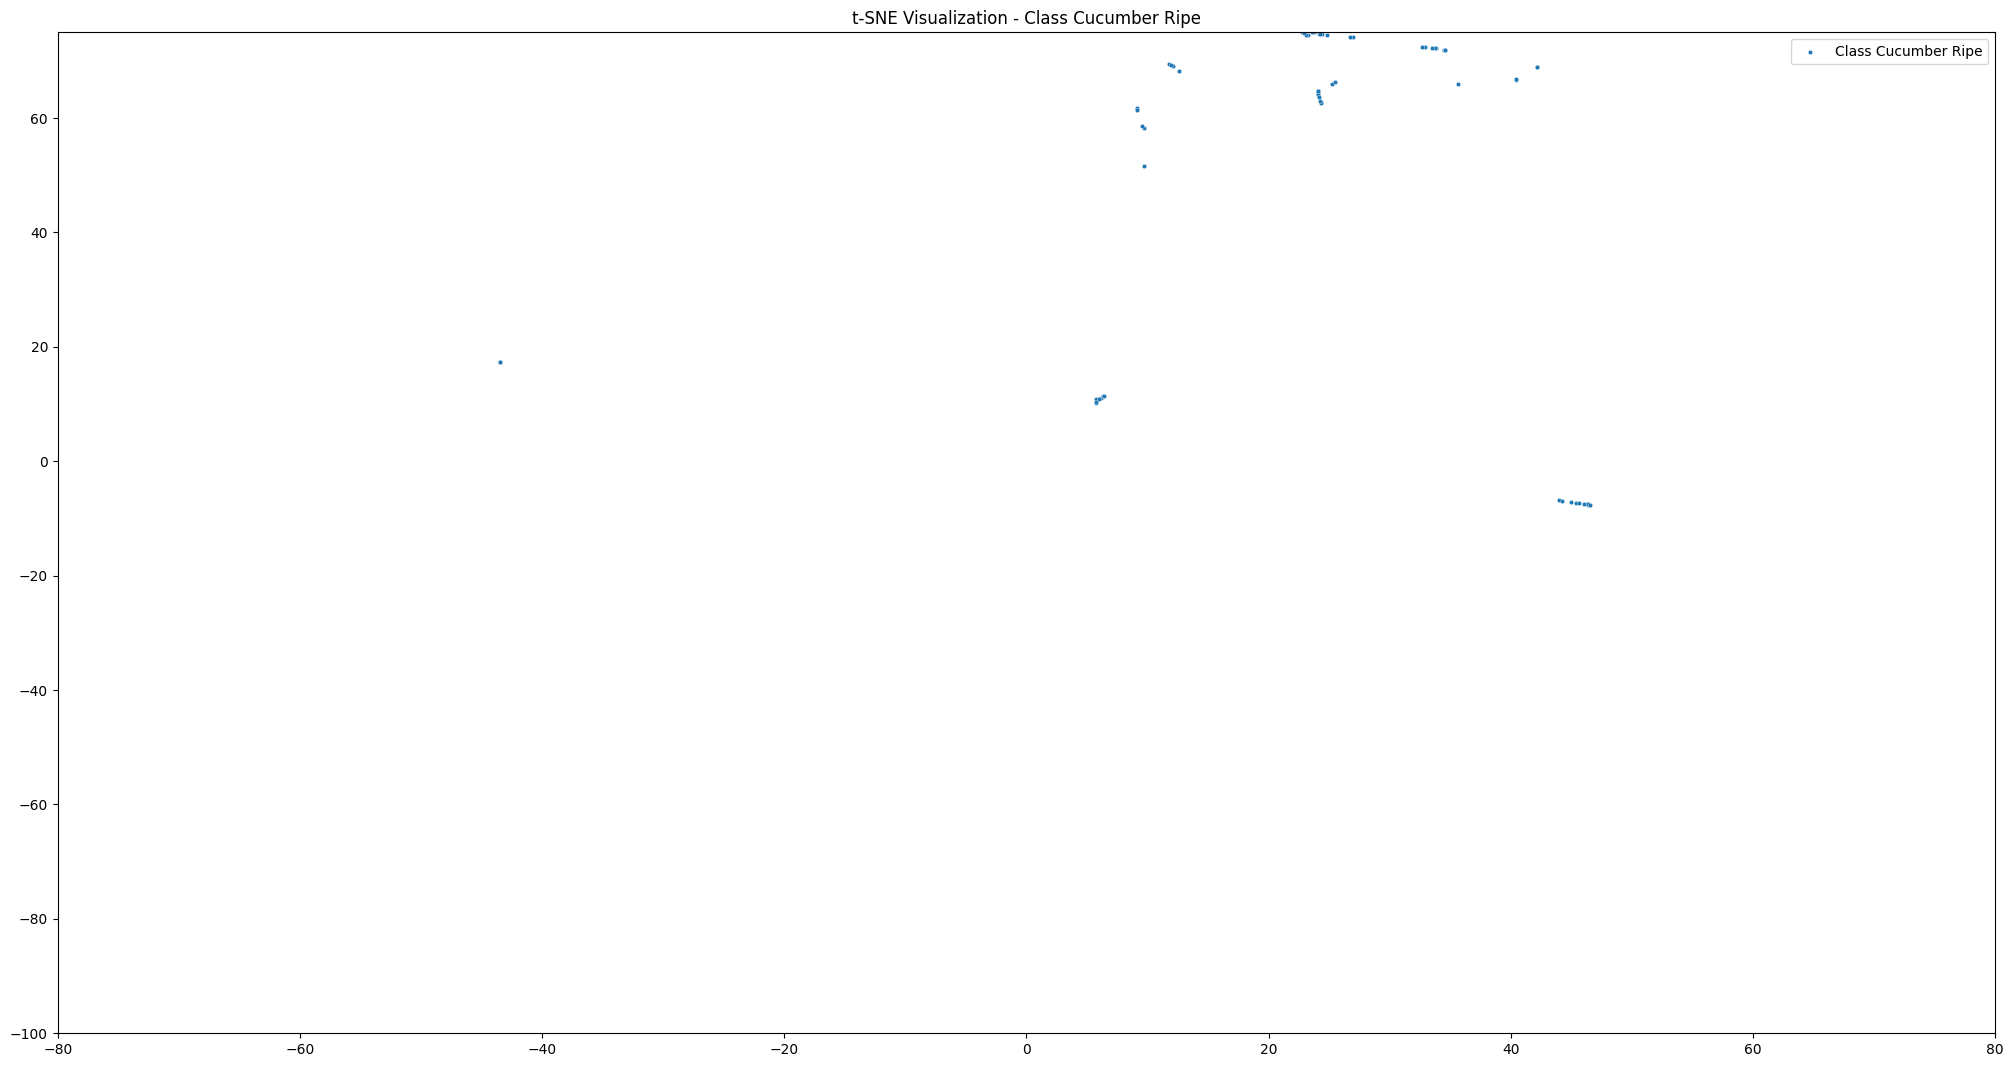

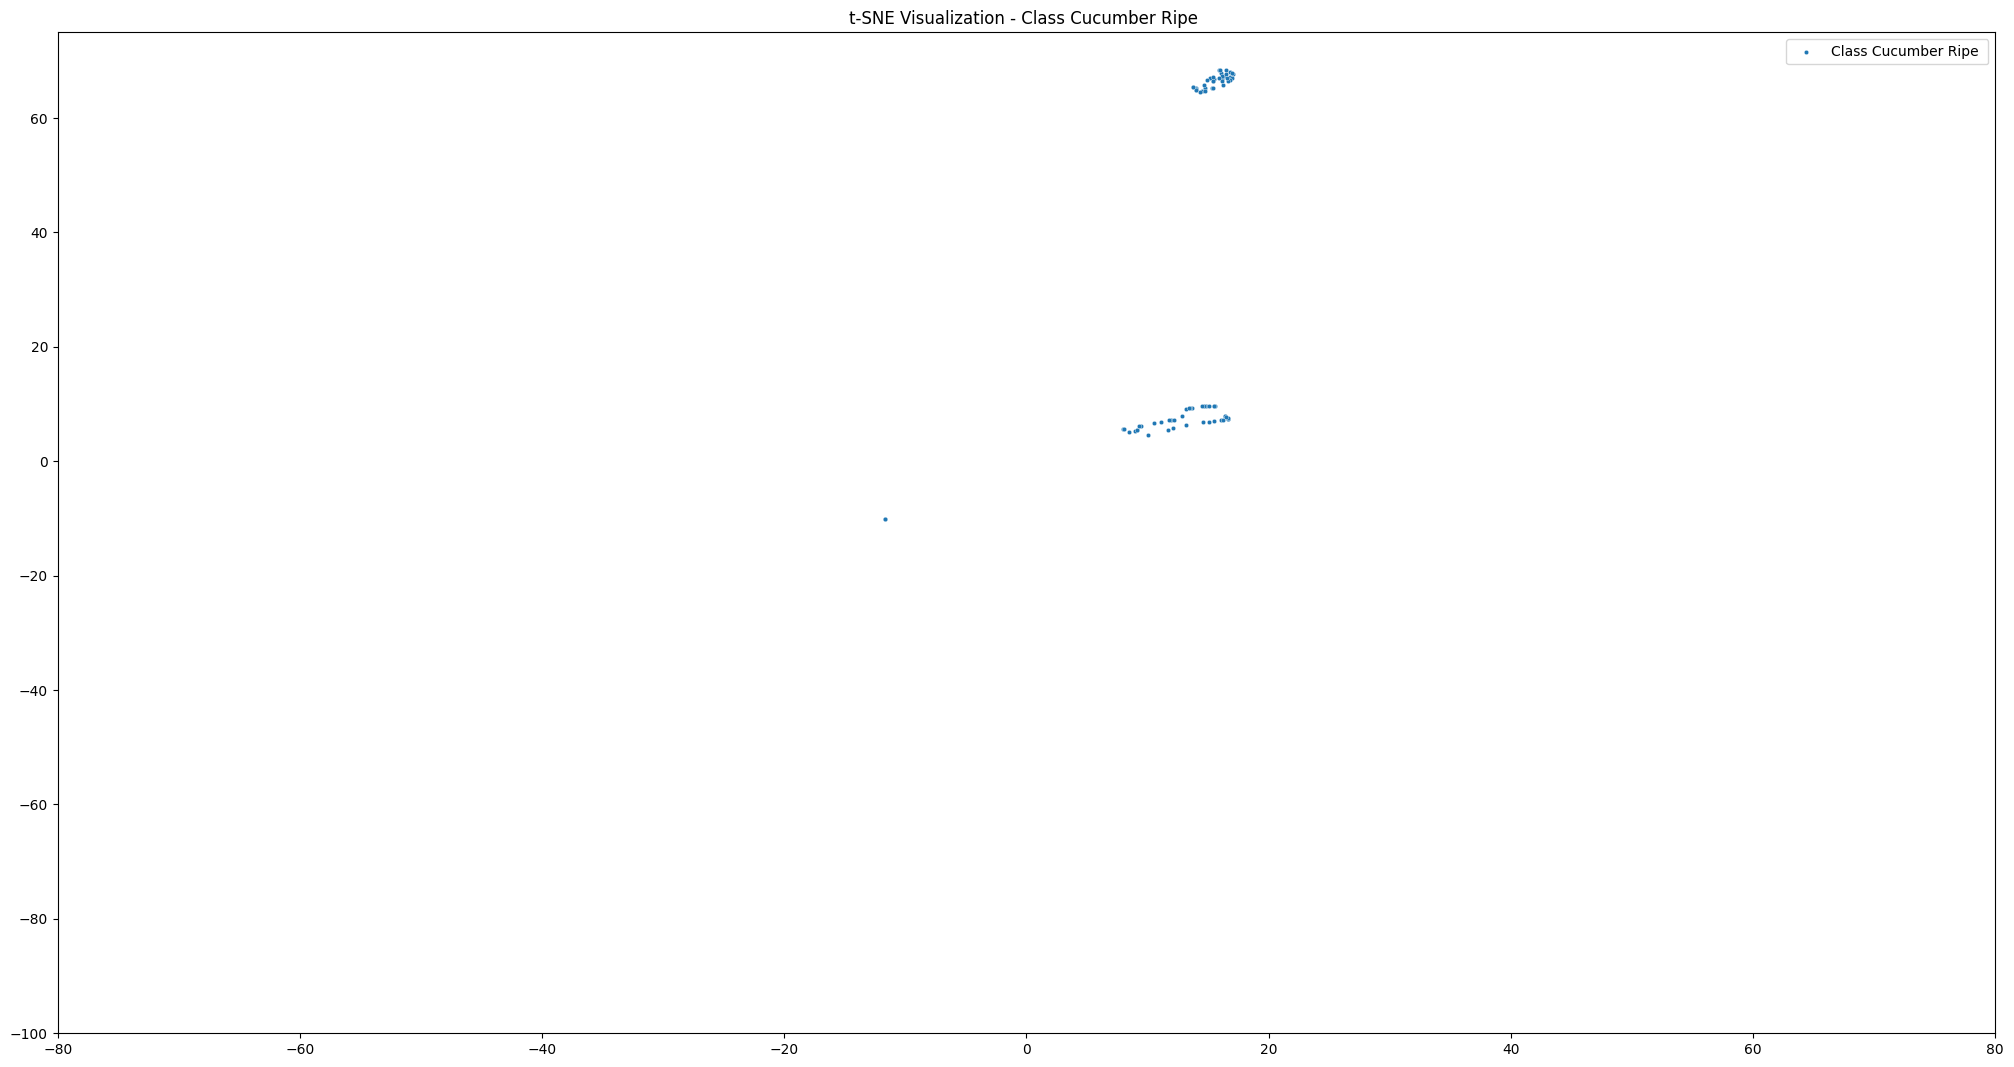

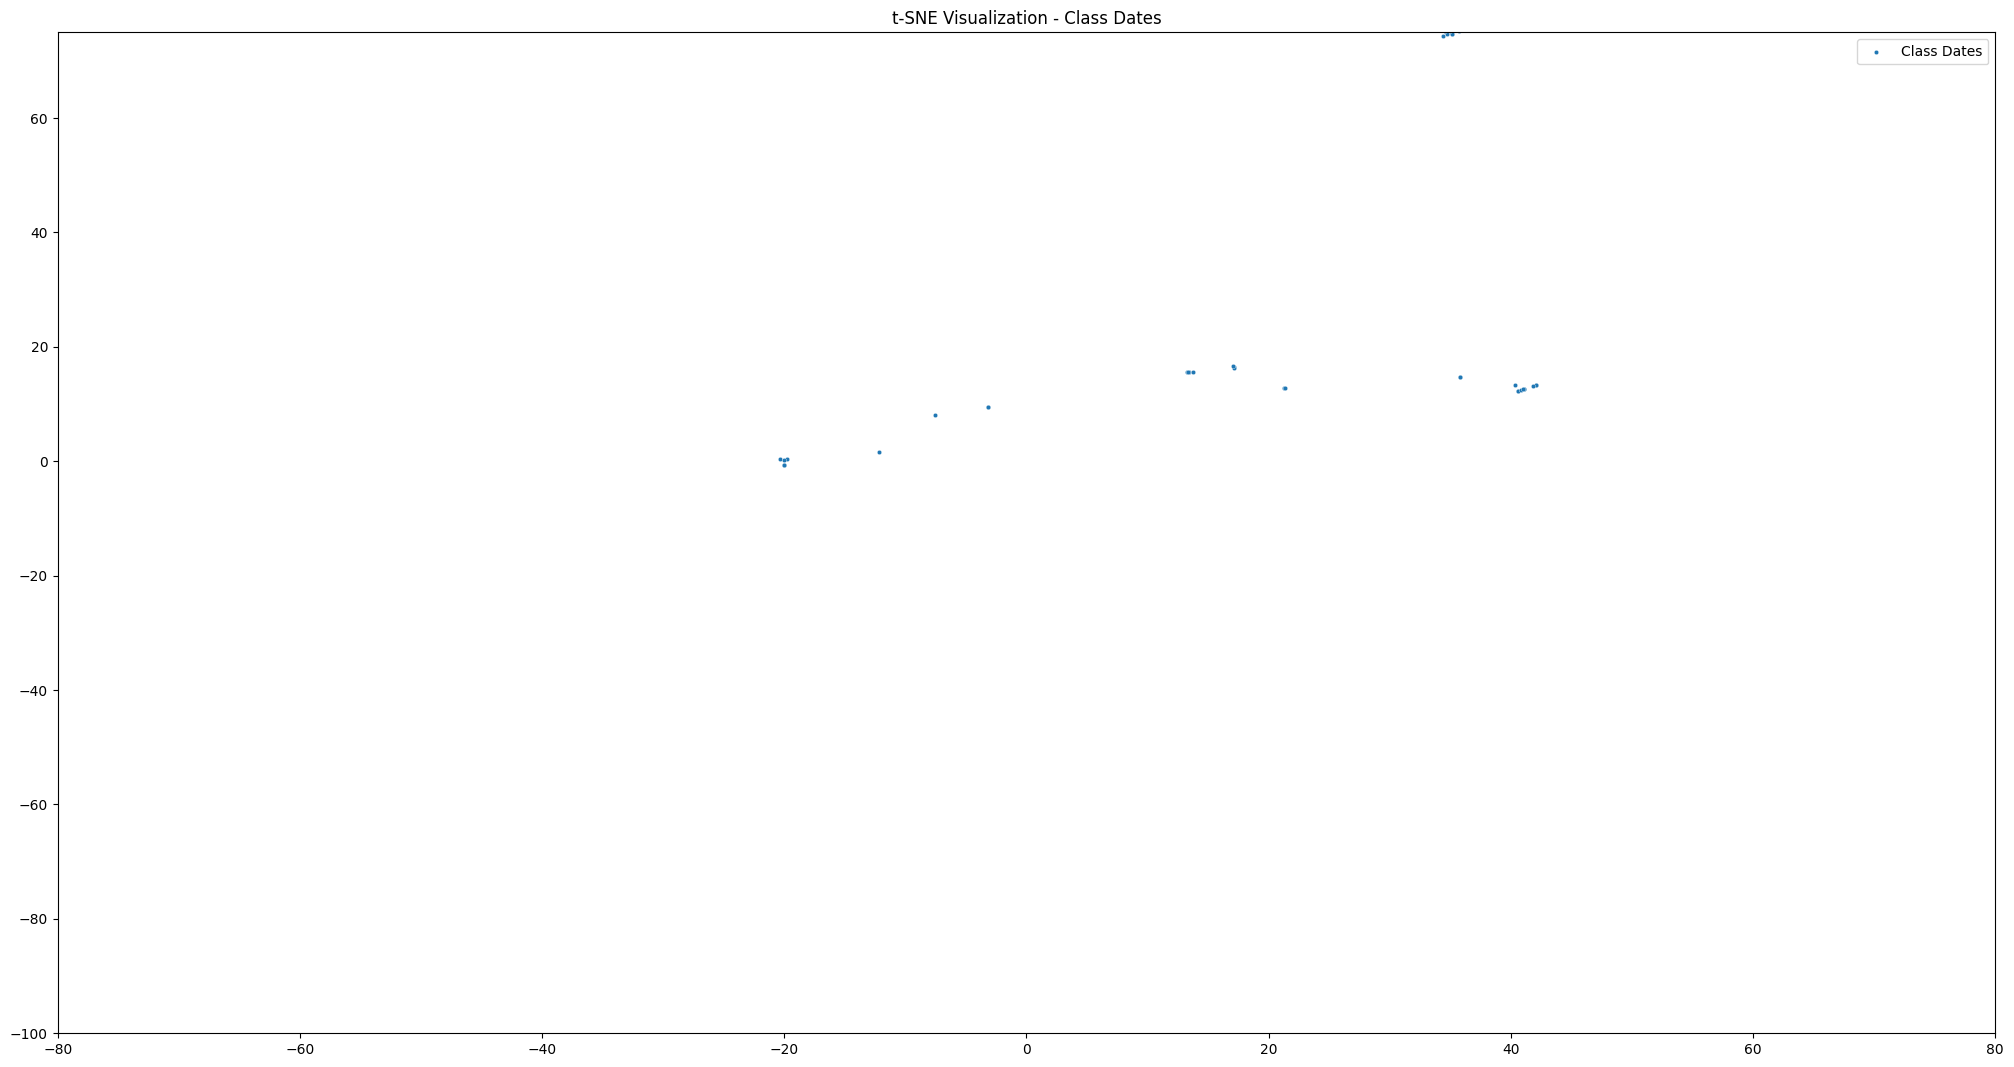

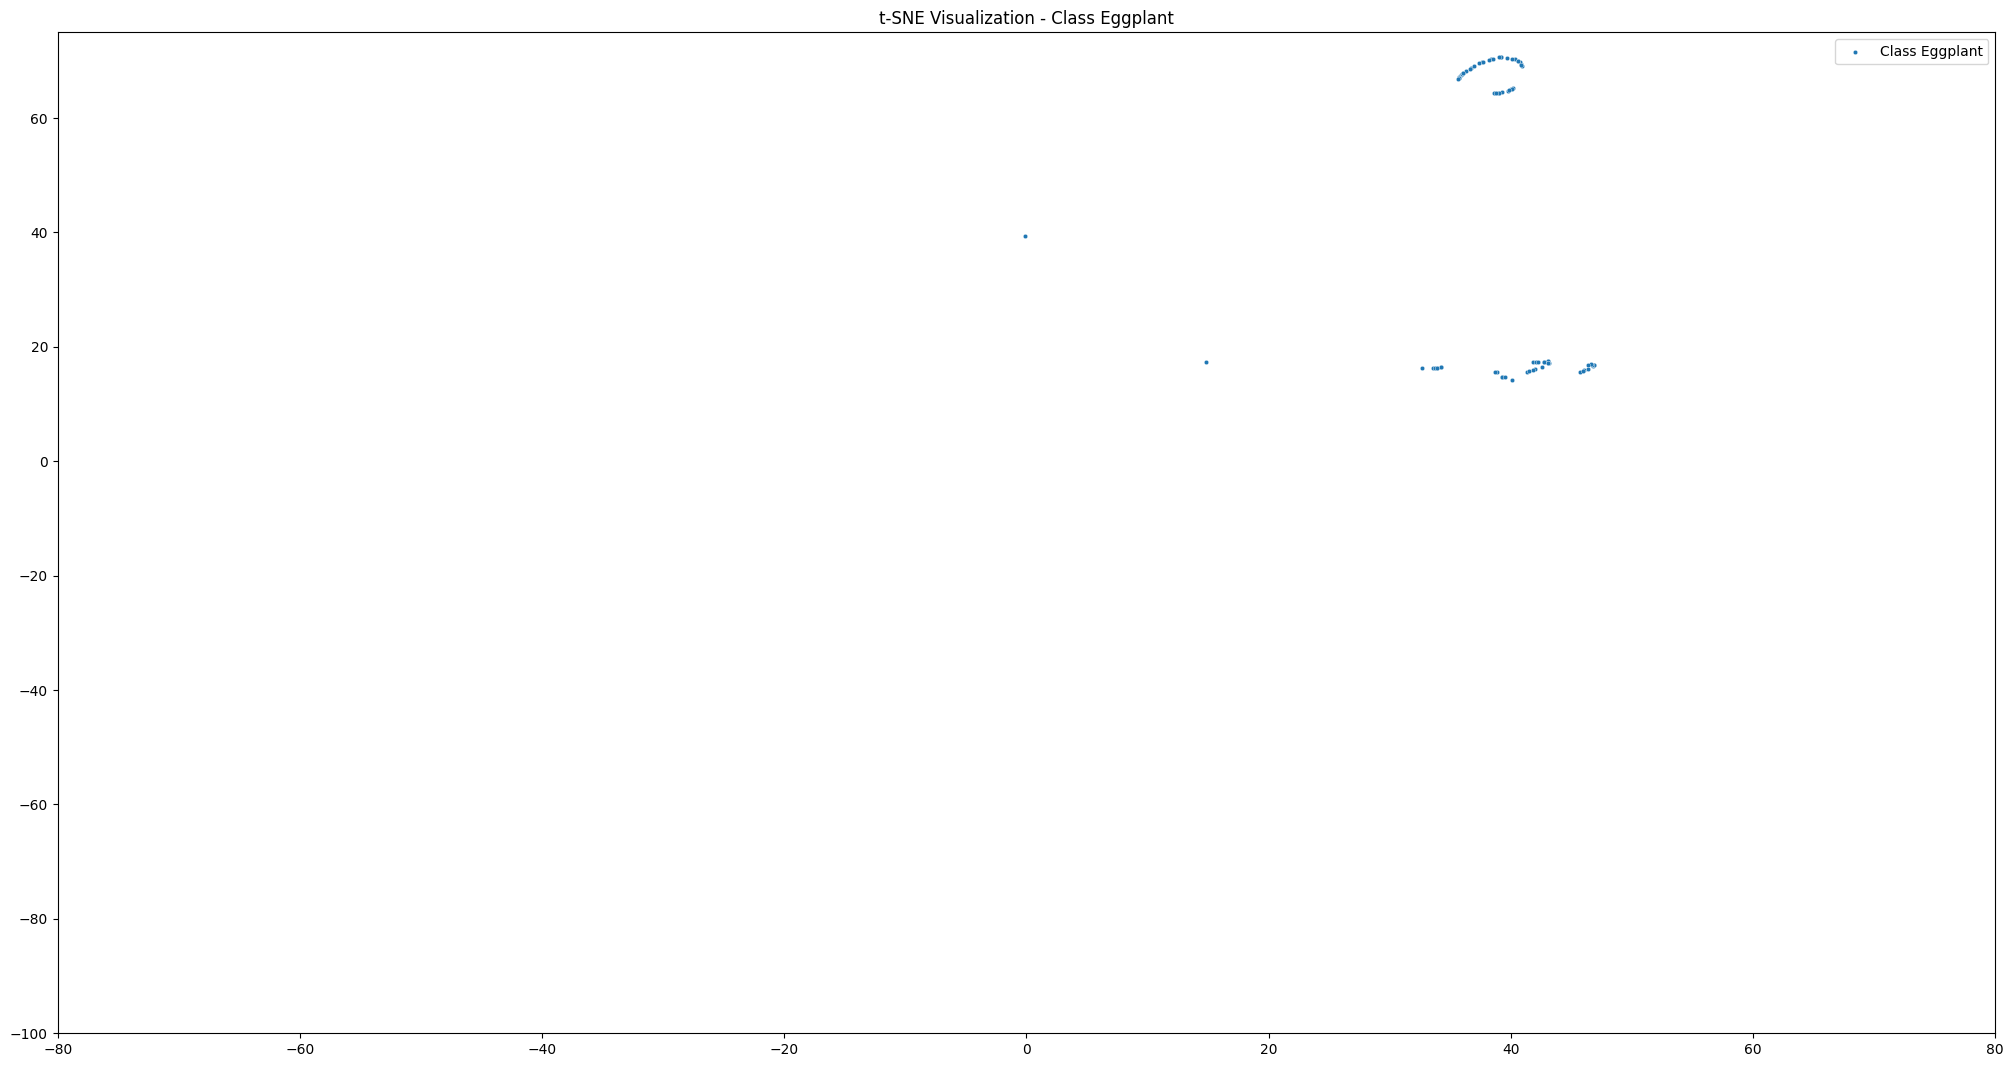

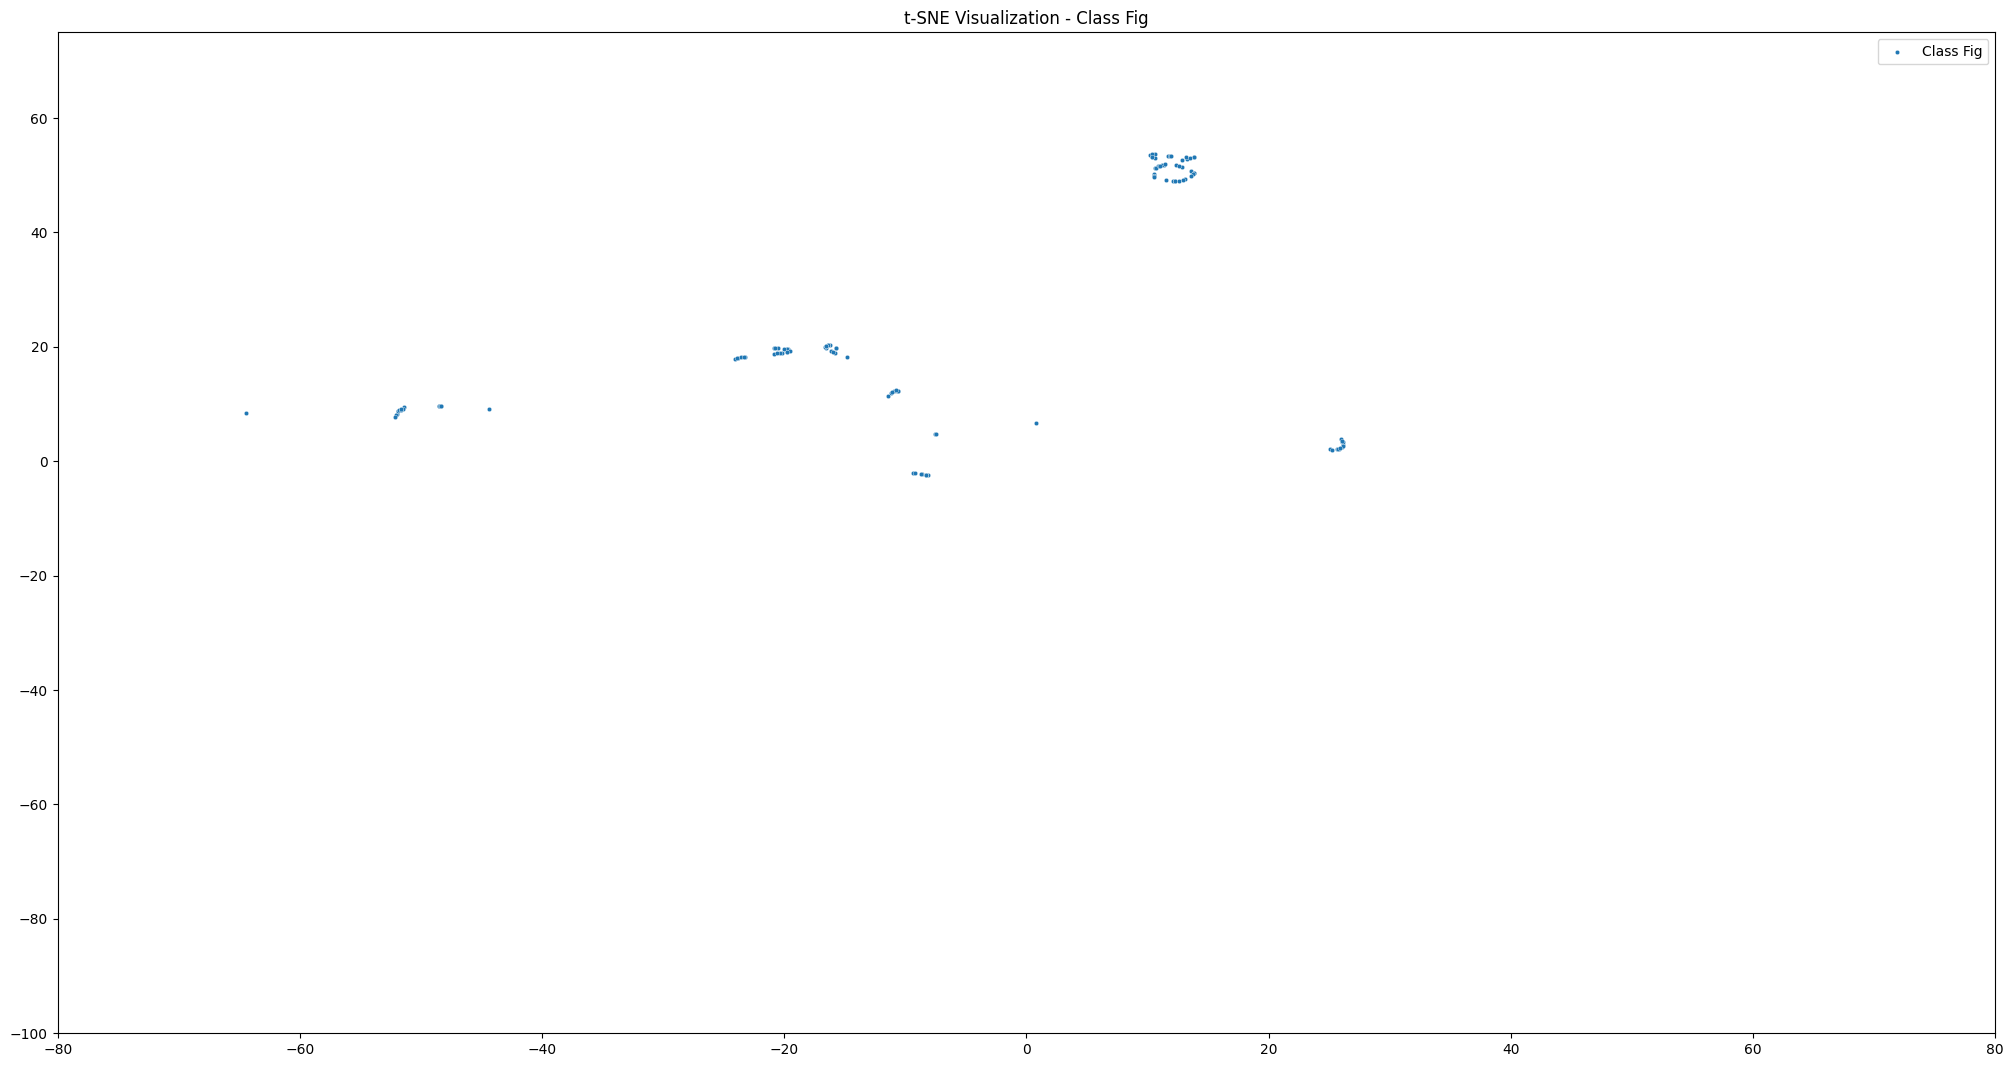

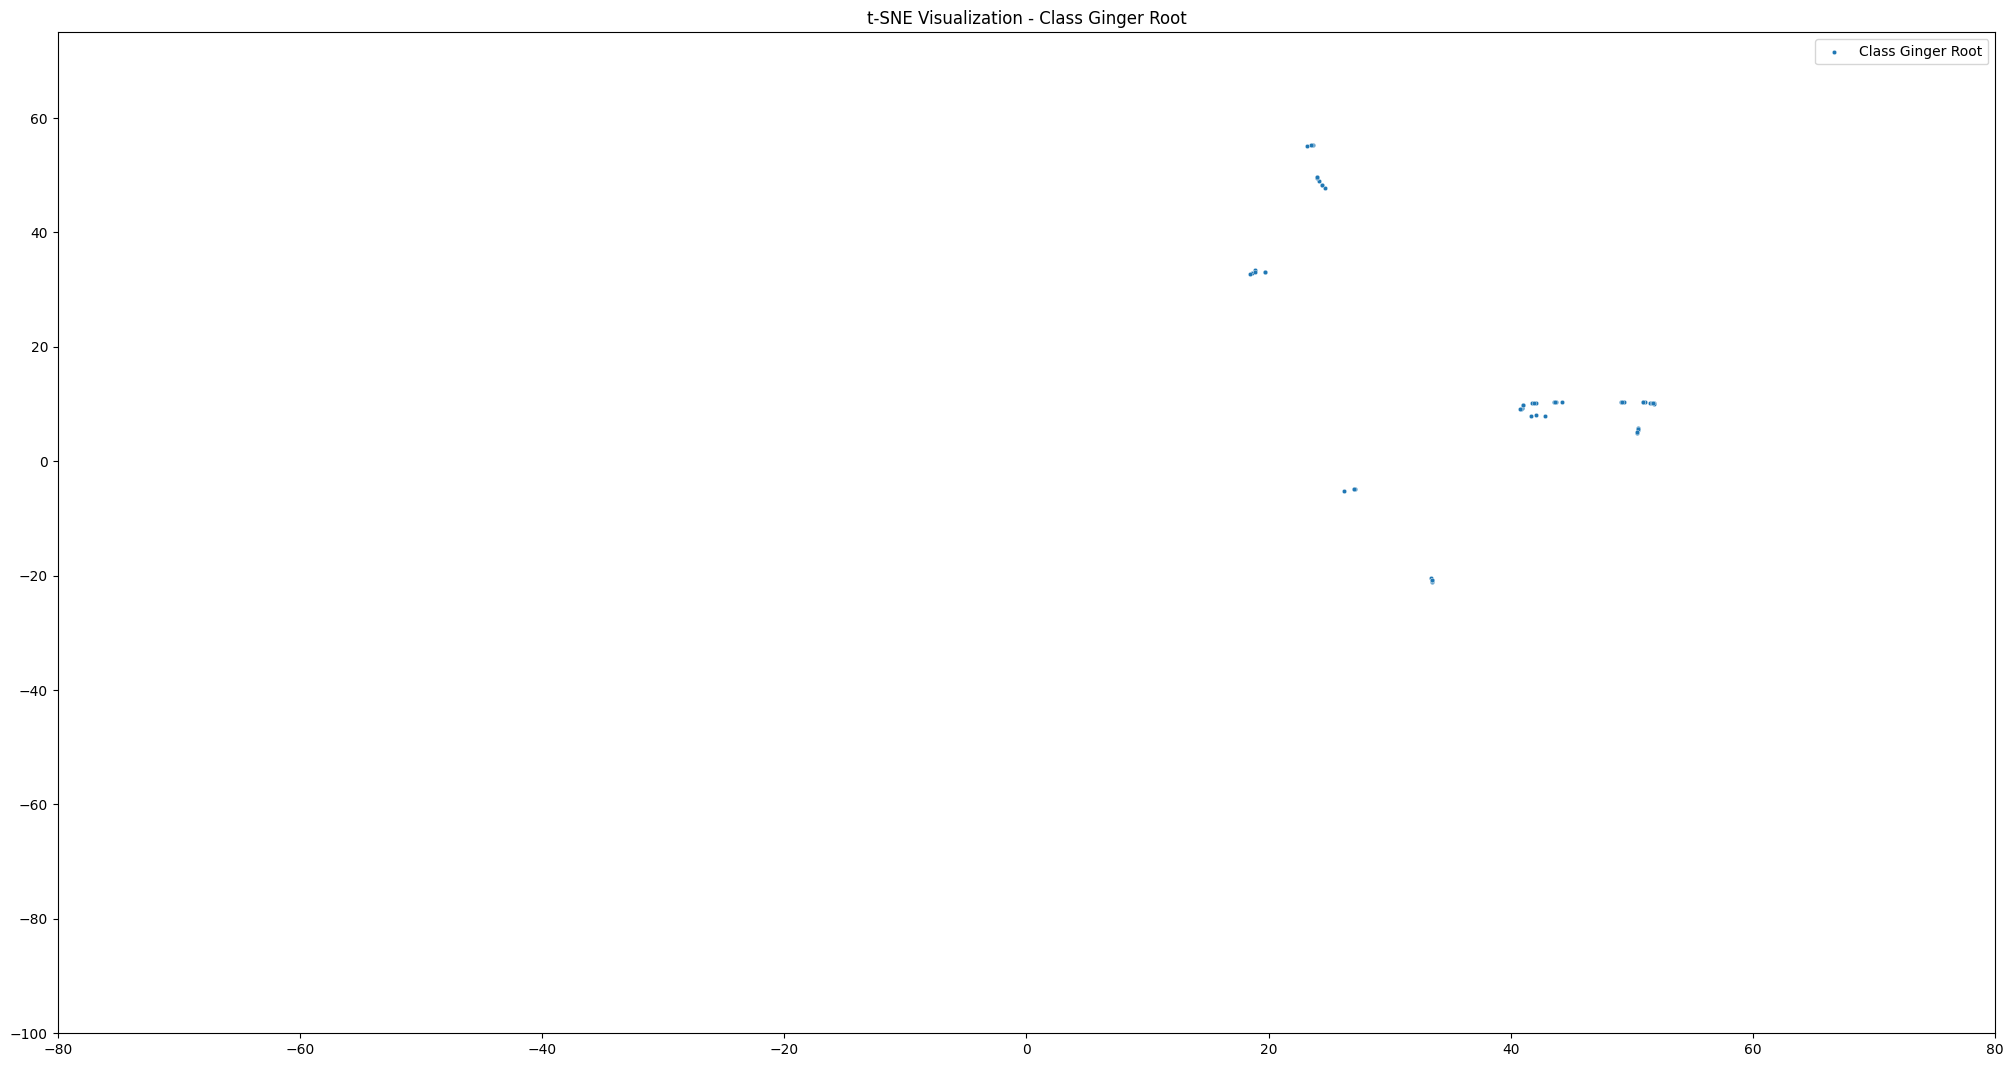

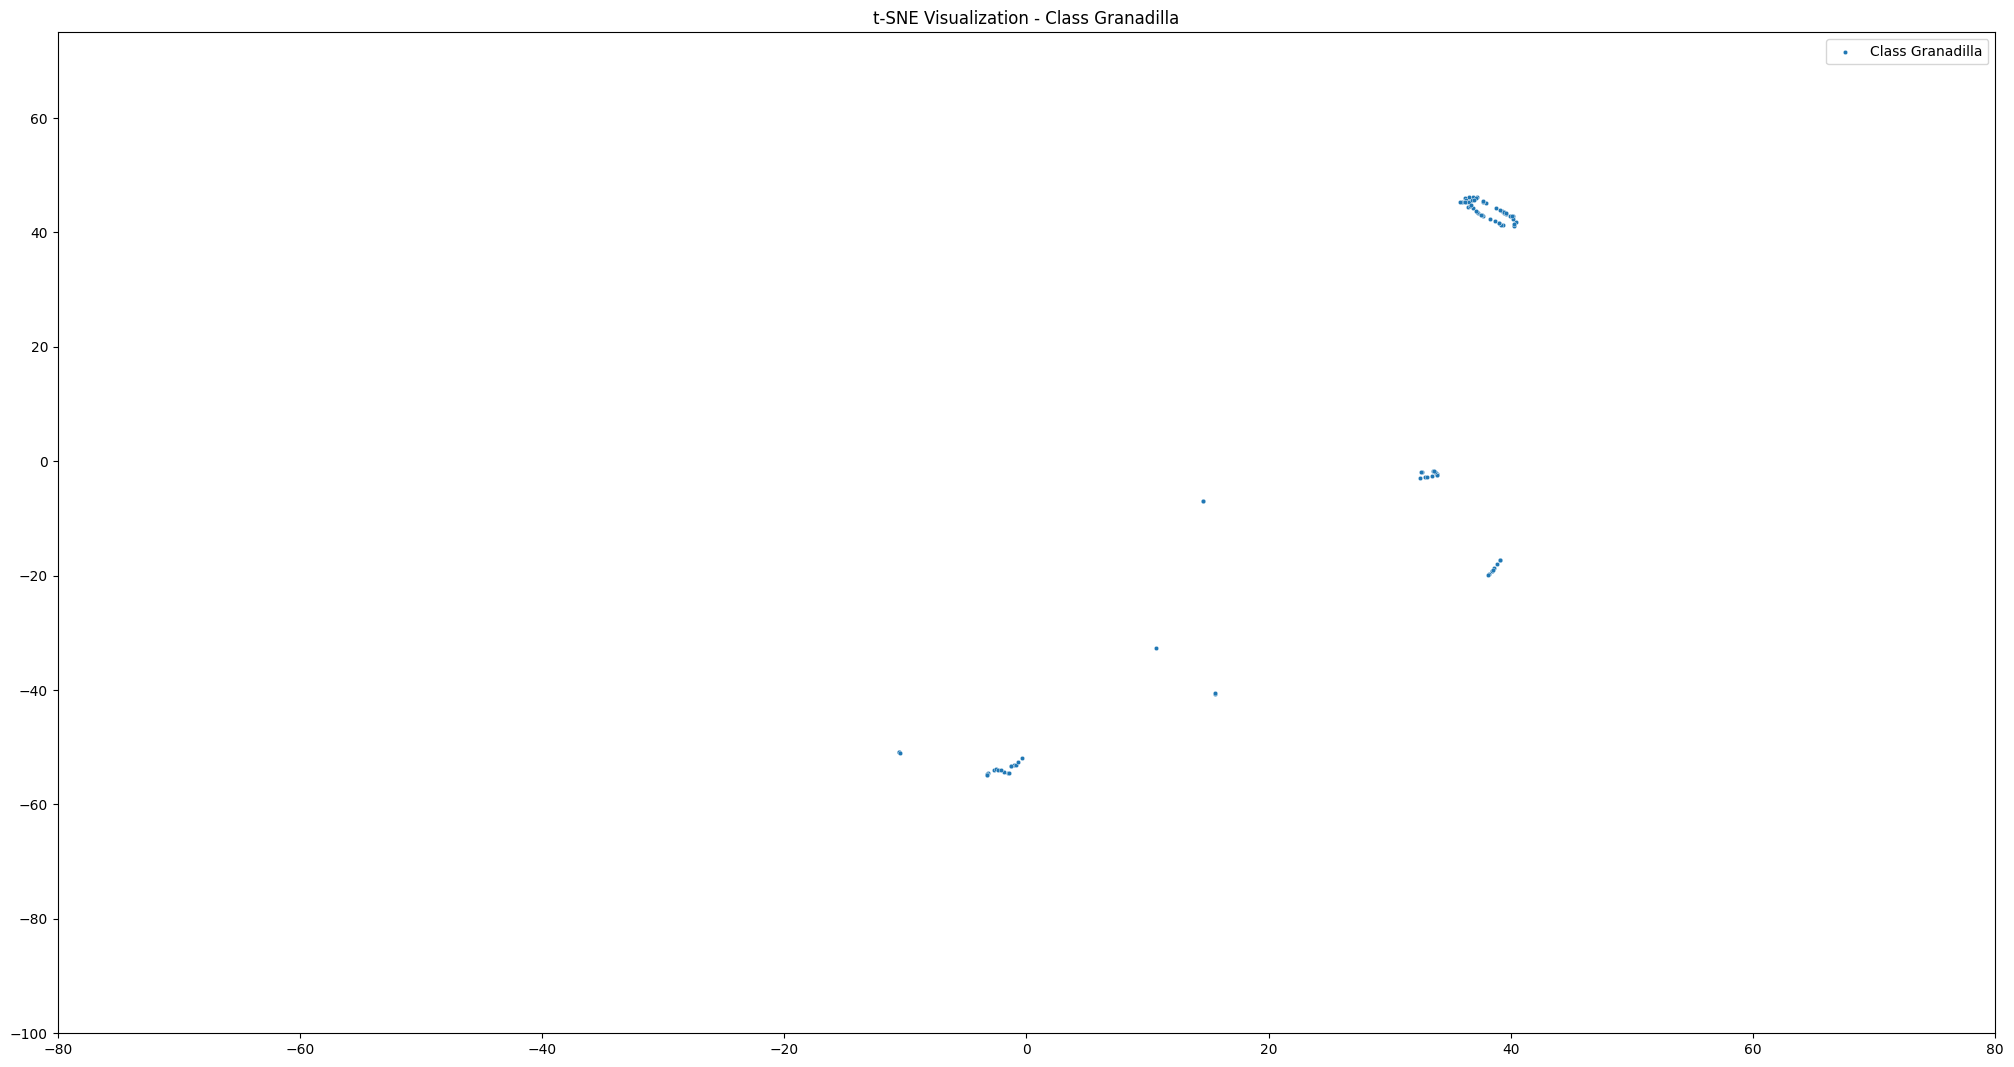

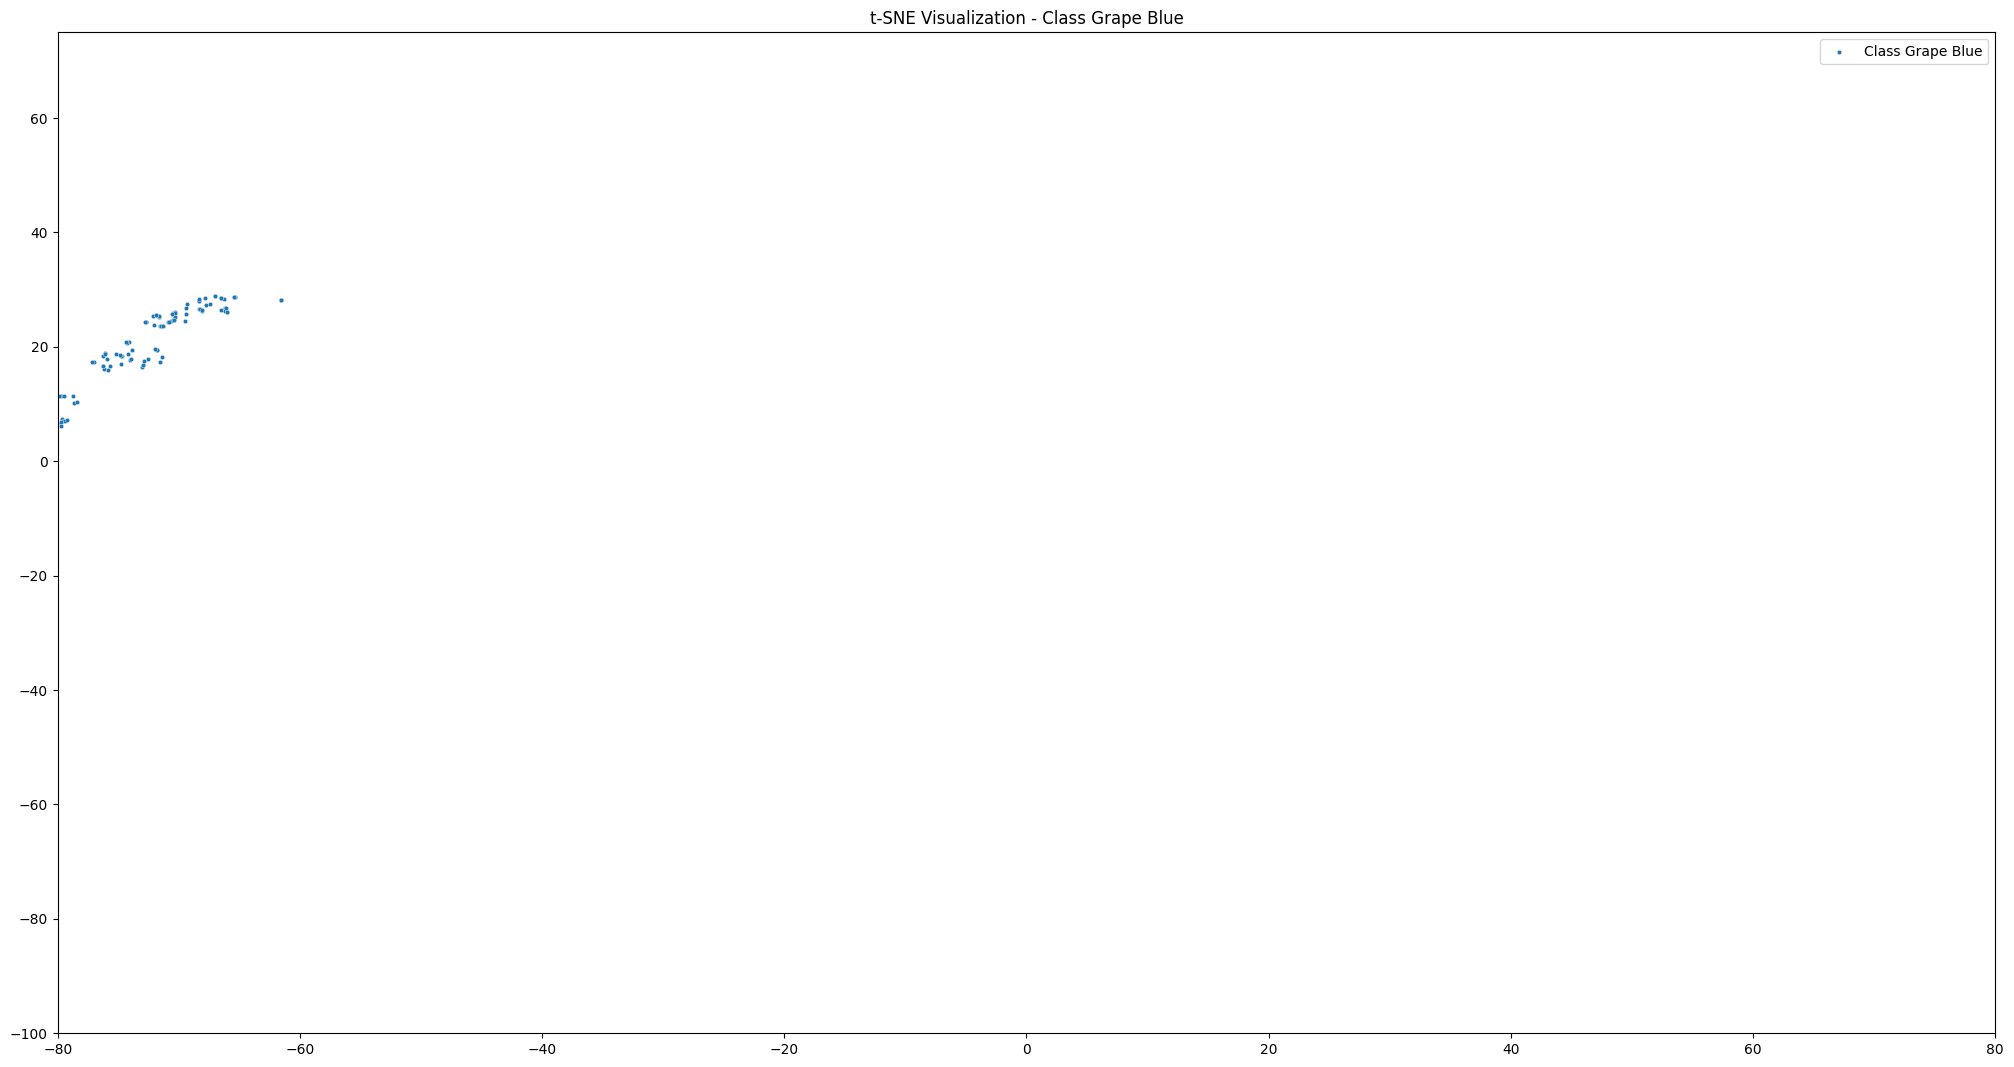

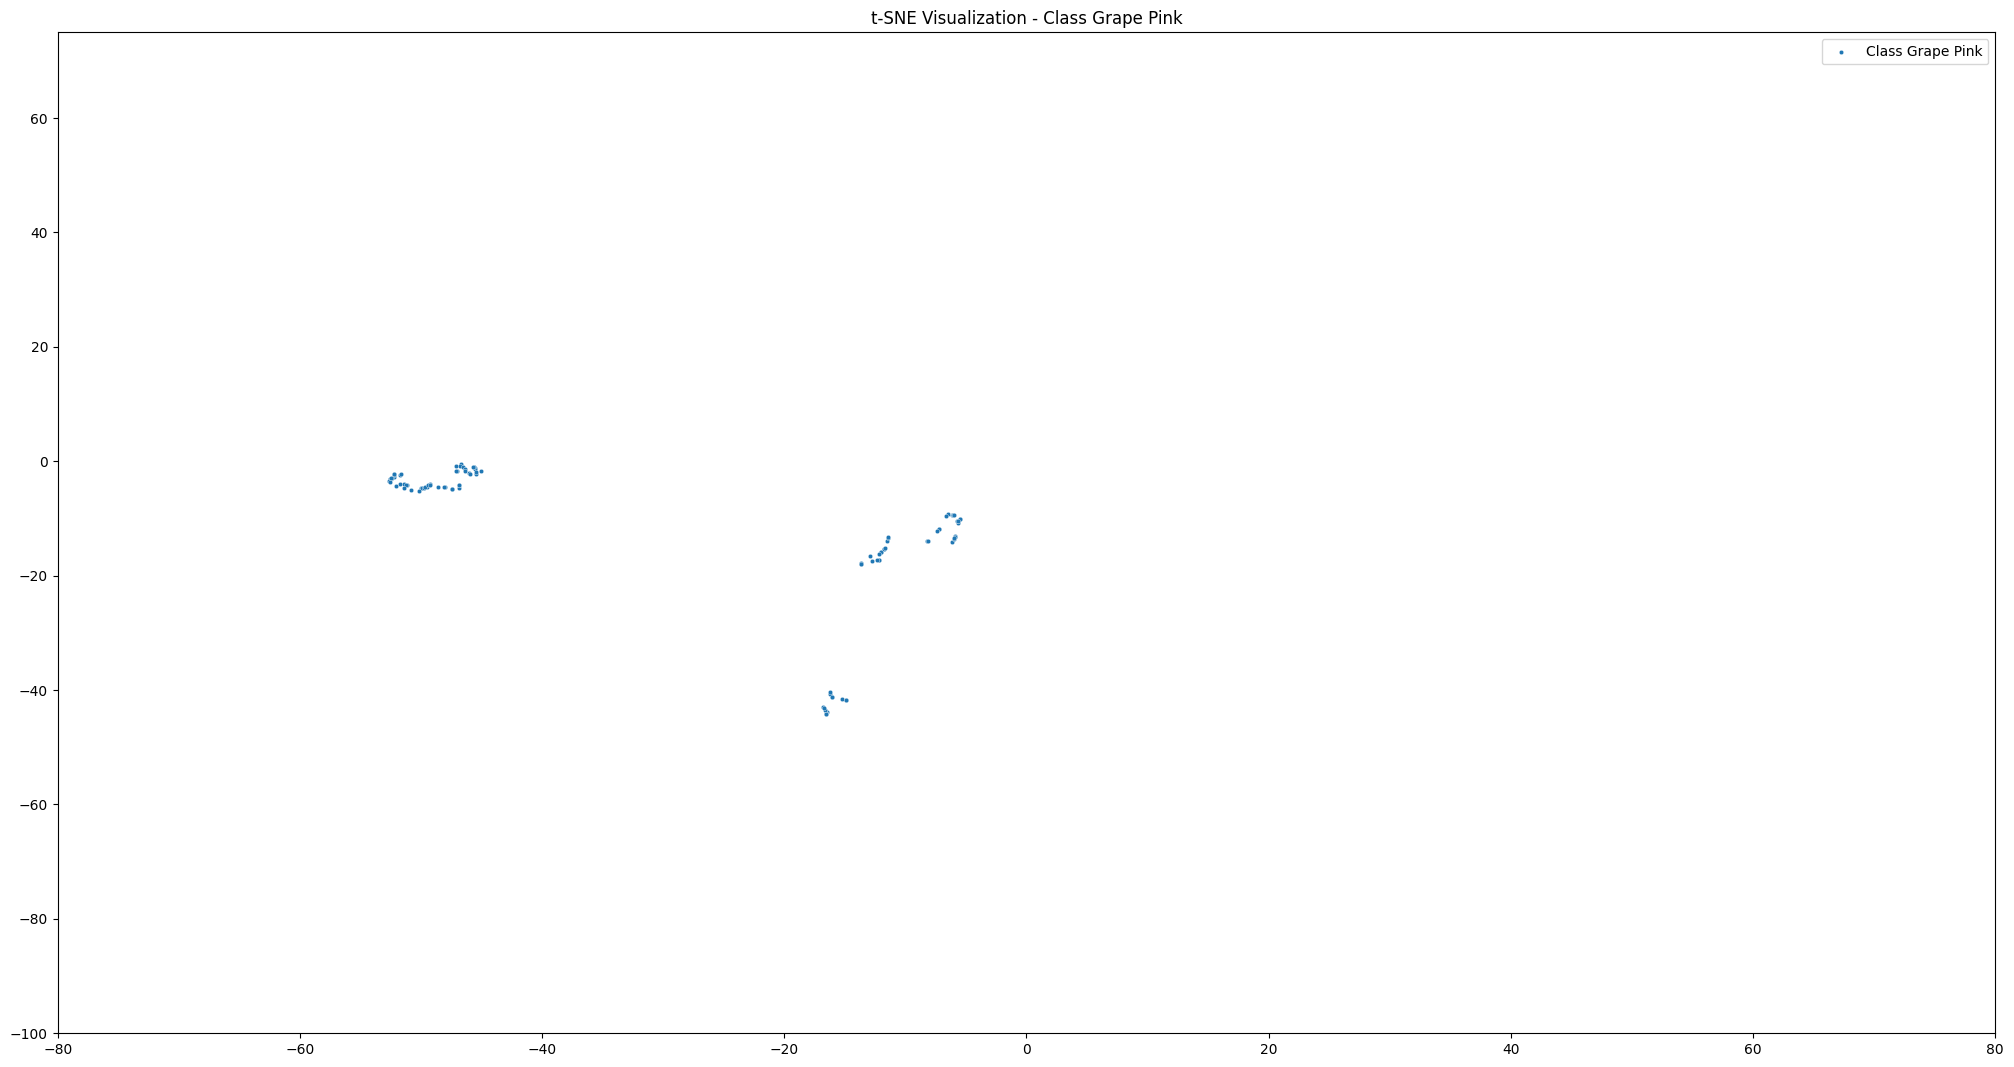

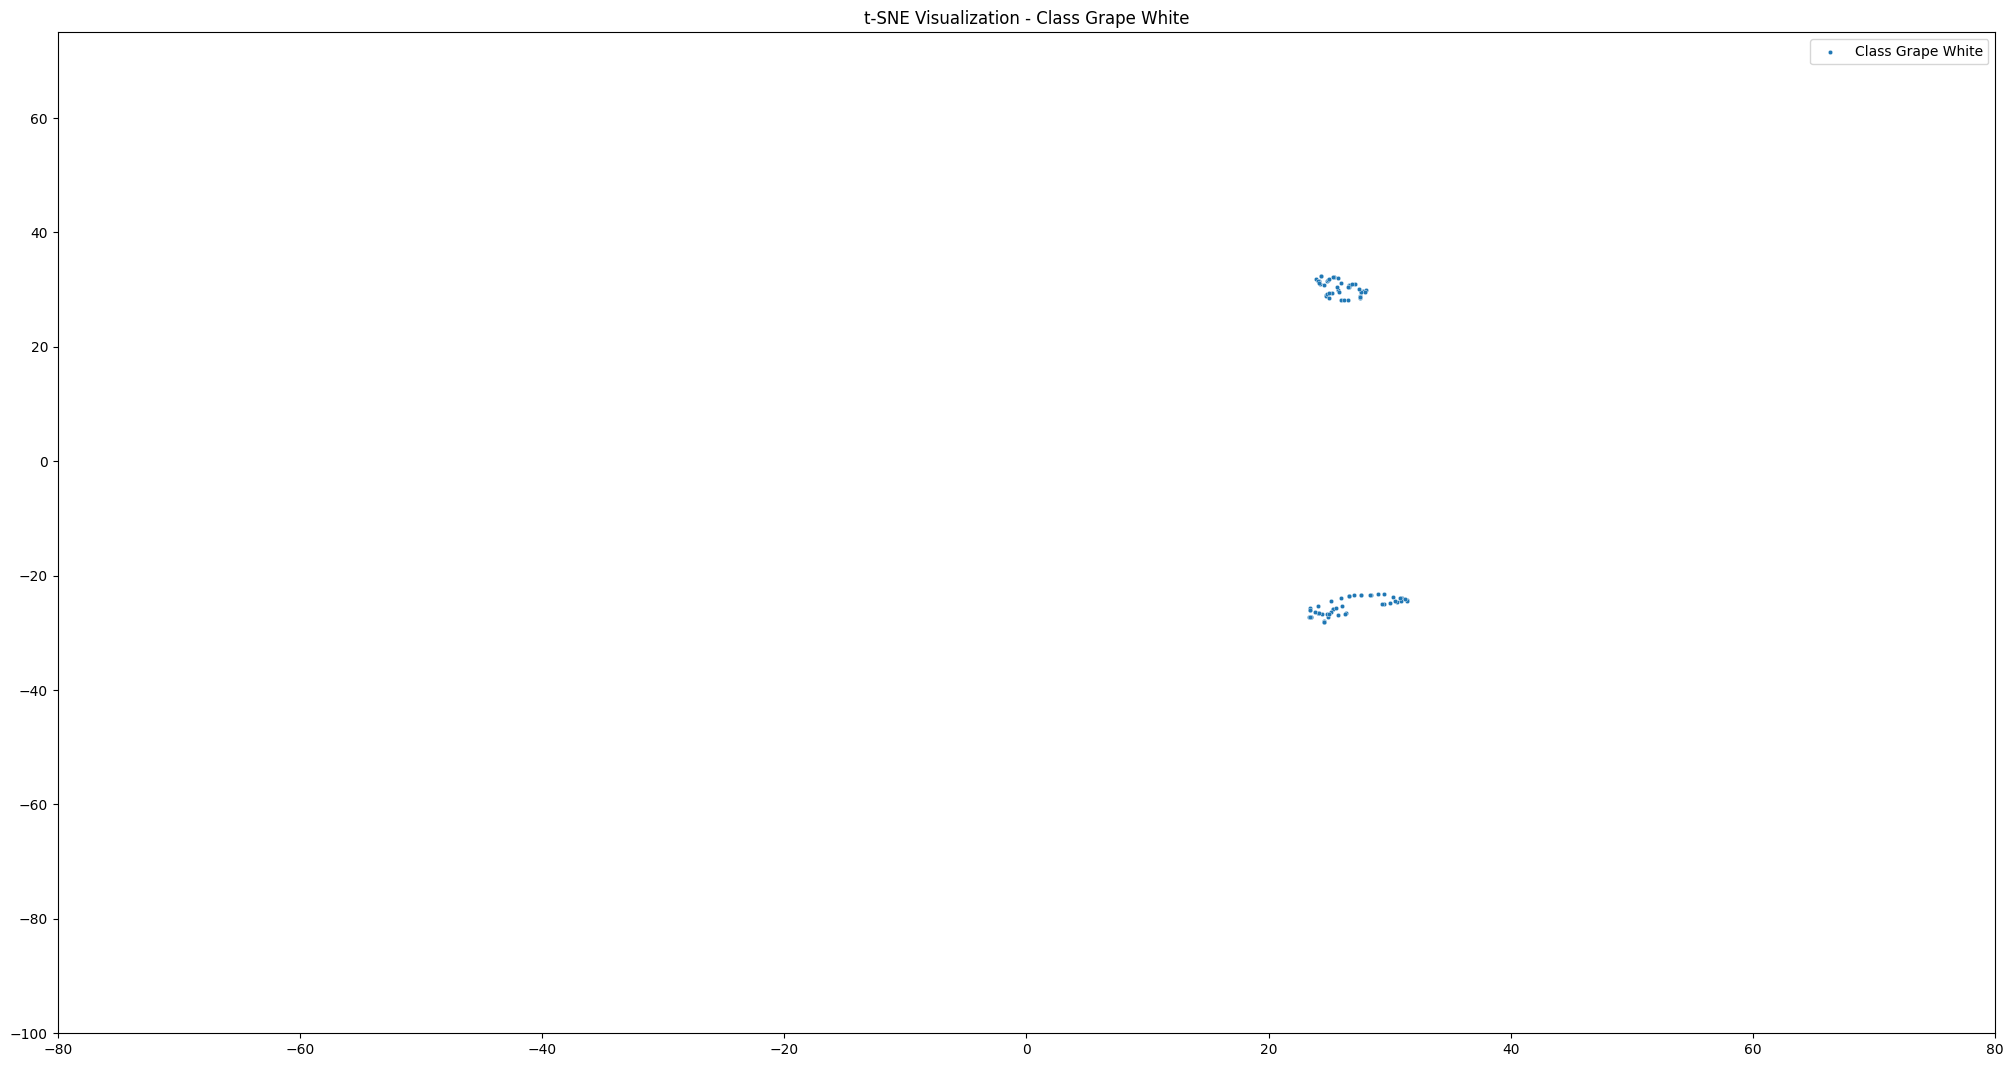

In [31]:
# Wizualizacja danych w przestrzeni 2D za pomocą t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_test_embedded = tsne.fit_transform(X_test)

# Wizualizacja punktów w przestrzeni 2D z mniejszymi kropkami
plt.figure(figsize=(25, 13))
scatterplot = sns.scatterplot(x=X_test_embedded[:, 0], y=X_test_embedded[:, 1], hue=y_test, palette='viridis', s=10)
plt.title("t-SNE Visualization of Test Data")
plt.legend(title="Class")

# Aktualne wymiary wykresu
current_fig_size = plt.gcf().get_size_inches()


output_folder = "./wykresy"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Unikalne klasy
unique_classes = np.unique(y_test)

# Tworzenie osobnych wykresów dla każdej klasy
for class_label in unique_classes:
    # Ustawianie wymiarów wykresu dla pojedynczej klasy takie same jak dla głównego wykresu
    plt.figure(figsize=current_fig_size)
    scatterplot = sns.scatterplot(
        x=X_test_embedded[y_test == class_label, 0],
        y=X_test_embedded[y_test == class_label, 1],
        s=10,
        label=f"Class {class_label}",
    )
    
    # Dostosuj zakresy osi X i Y
    plt.xlim(-80, 80)
    plt.ylim(-100, 75)
    
    plt.title(f"t-SNE Visualization - Class {class_label}")
    plt.legend()

    # Zapisz wykres do pliku w folderze ./wykresy
    output_filename = f"{output_folder}/class_{class_label}_visualization.png"
    plt.savefig(output_filename)

    # Pokaż wykres (opcjonalnie)
    plt.show()
